In [2]:
import sys
sys.path.append('..')

In [3]:
from siggi import siggi, filters, spectra, calcIG, plotting
from siggi import Sed
from siggi.lsst_utils import Bandpass, BandpassDict, PhotometricParameters
from siggi import _siggiBase
from CMNN_Photoz_Estimator.cmnn_photoz import return_photoz
from astropy.cosmology import WMAP9 as cosmo
from CMNN_Photoz_Estimator.cmnn_analysis import get_stats
from siggi.filters import filterFactory
import matplotlib.pyplot as plt
import numpy as np
import os
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from scipy.stats import chi2

In [5]:
#from photo_z_metrics.code.pointMetrics import pointMetrics
#pm = pointMetrics()
from photo_z_metrics.code.pointMetrics import pointMetrics

In [6]:
pm = pointMetrics(bin_with='z_est')

In [7]:
import pickle
import random
from scipy import interpolate

In [8]:
import sncosmo
import seaborn as sbs
sbs.set()
from copy import deepcopy

In [9]:
from itertools import chain

In [10]:
band = sncosmo.get_bandpass('lsstr')

In [11]:
#def model
times = np.arange(-15,16,5)
model_salt_list_train = []

for t in (times):
    model_salt2 = sncosmo.Model(source='salt2-extended')
    model_salt2.set(z=0, t0=t)
    model_salt2.set_source_peakmag(23.7, band, 'ab')
    model_salt2.bandmag('lsstu', 'ab', [10., 20.])
    #model_salt2 = model_salt2.flux.clip(min=0)
    #model_salt2.flux < 0 = 0
    model_salt_list_train.append(model_salt2)
    

In [12]:
print(times)

[-15 -10  -5   0   5  10  15]


source:
  class      : SALT2Source
  name       : 'salt2-extended'
  version    : 2.0
  phases     : [-20, .., 50] days
  wavelengths: [1700, .., 24990] Angstroms
parameters:
  z  = 0.0
  t0 = 0.0
  x0 = 6.133117237838639e-06
  x1 = 0.0
  c  = 0.0


Text(0.5, 1.0, 'Salt2-Extended Model')

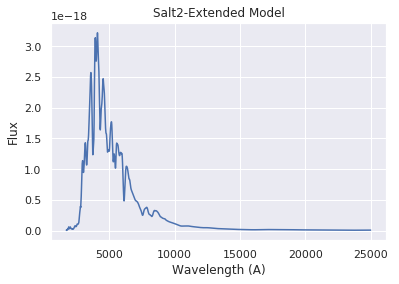

In [13]:
wavesalt2_train = np.arange(1700., 24990., 0.1)
print(model_salt_list_train[3])
plt.plot(wavesalt2_train,model_salt_list_train[3].flux(0., wavesalt2_train))
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux')
plt.title('Salt2-Extended Model')

In [14]:
x = np.arange(0,7,1)
salt2_spec_list_train = []

for y in x:
    salt2_spec = Sed()
    flux = model_salt_list_train[y].flux(0., wavesalt2_train)
    flux[flux<1e-20]=1e-20
    salt2_spec.setSED(wavelen=wavesalt2_train/10., flambda=flux)
    #salt2_spec.setSED(wavelen=wavesalt2_train/10., flambda=model_salt_list_train[y].flux(0., wavesalt2_train))
    salt2_spec_list_train.append(salt2_spec)

print(salt2_spec_list_train[6])

In [15]:
min(model_salt_list_train[0].flux(0., wavesalt2_train))
#len(model_salt_list_train[0].flux(0., wavesalt2_train))

-1.048552547213136e-19

In [16]:
#def model
times2 = np.array([-18,-16,-14,-12,-8,-6,-4,-2,2,4,6,8,12,14,16,18])
model_salt_list_test = []

for t in (times2):
    model_salt2 = sncosmo.Model(source='salt2-extended')
    model_salt2.set(z=0, t0=t)
    model_salt2.set_source_peakmag(23.7, band, 'ab')
    model_salt2.bandmag('lsstu', 'ab', [10., 20.])
    model_salt_list_test.append(model_salt2)

In [17]:
print(times2)

[-18 -16 -14 -12  -8  -6  -4  -2   2   4   6   8  12  14  16  18]


source:
  class      : SALT2Source
  name       : 'salt2-extended'
  version    : 2.0
  phases     : [-20, .., 50] days
  wavelengths: [1700, .., 24990] Angstroms
parameters:
  z  = 0.0
  t0 = 18.0
  x0 = 6.133117237838639e-06
  x1 = 0.0
  c  = 0.0


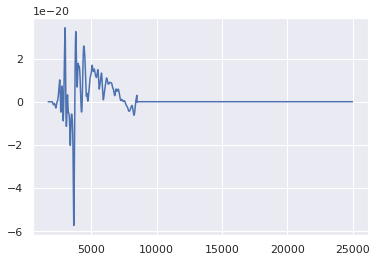

In [18]:
wavesalt2_test = np.arange(1700., 24990., 0.1)
print(model_salt_list_test[15])
plt.plot(wavesalt2_test,model_salt_list_test[15].flux(0., wavesalt2_test))

In [19]:
a = np.arange(0,16,1)
salt2_spec_list_test = []

for b in a:
    salt2_spec = Sed()
    flux = model_salt_list_test[y].flux(0., wavesalt2_train)
    flux[flux<1e-20]=1e-20
    salt2_spec.setSED(wavelen=wavesalt2_train/10., flambda=flux)
    salt2_spec_list_test.append(salt2_spec)

print(salt2_spec_list_test[15])

In [20]:
#def model
times = np.arange(-15,16,5)
model_s11_list_train = []

for t in (times):
    model_s11 = sncosmo.Model(source='s11-2006jl')
    model_s11.set(z=0, t0=t)
    model_s11.set_source_peakmag(23.7, band, 'ab')
    model_s11.bandmag('lsstu', 'ab', [10., 20.])
    model_s11_list_train.append(model_s11)

In [21]:
print(times)

[-15 -10  -5   0   5  10  15]


source:
  class      : TimeSeriesSource
  name       : 's11-2006jl'
  version    : 1.0
  phases     : [-18, .., 60] days
  wavelengths: [1000, .., 14900] Angstroms
parameters:
  z         = 0.0
  t0        = 0.0
  amplitude = 2.7487039795269823e-17


Text(0.5, 1.0, 'S11-2006jl Model')

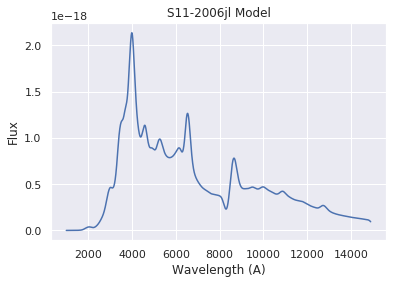

In [22]:
waves11_train = np.arange(1000., 14900., 0.1)
print(model_s11_list_train[3])
plt.plot(waves11_train,model_s11_list_train[3].flux(0., waves11_train))
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux')
plt.title('S11-2006jl Model')

In [23]:
x = np.arange(0,7,1)
s11_spec_list_train = []

for y in x:
    s11_spec = Sed()
    flux = model_s11_list_train[y].flux(0., waves11_train)
    flux[flux<1e-20]=1e-20
    s11_spec.setSED(wavelen=waves11_train/10., flambda=flux)
    s11_spec_list_train.append(s11_spec)

print(s11_spec_list_train[6])

In [24]:
#def model
times2 = np.array([-18,-16,-14,-12,-8,-6,-4,-2,2,4,6,8,12,14,16,18])
model_s11_list_test = []

for t in (times2):
    model_s11 = sncosmo.Model(source='s11-2006jl')
    model_s11.set(z=0, t0=t)
    model_s11.set_source_peakmag(23.7, band, 'ab')
    model_s11.bandmag('lsstu', 'ab', [10., 20.])
    model_s11_list_test.append(model_s11)

In [25]:
print(times2)

[-18 -16 -14 -12  -8  -6  -4  -2   2   4   6   8  12  14  16  18]


source:
  class      : TimeSeriesSource
  name       : 's11-2006jl'
  version    : 1.0
  phases     : [-18, .., 60] days
  wavelengths: [1000, .., 14900] Angstroms
parameters:
  z         = 0.0
  t0        = 18.0
  amplitude = 2.7487039795269823e-17


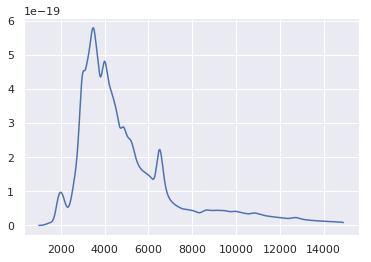

In [26]:
waves11_test = np.arange(1000., 14900., 0.1)
print(model_s11_list_test[15])
plt.plot(waves11_test,model_s11_list_test[15].flux(0., waves11_test))

In [27]:
a = np.arange(0,16,1)
s11_spec_list_test = []

for b in a:
    s11_spec = Sed()
    flux = model_s11_list_test[y].flux(0., waves11_test)
    flux[flux<1e-20]=1e-20
    s11_spec.setSED(wavelen=waves11_train/10., flambda=flux)
    s11_spec_list_test.append(s11_spec)

print(s11_spec_list_test[15])

In [28]:
bp_list = []
bp_dir = '../siggi/data/lsst_baseline_throughputs'
for filter_name in ['u', 'g', 'r', 'i', 'z', 'y']:
    current_bp = Bandpass()
    print(os.path.join(bp_dir, 'filter_%s.dat' % filter_name))
    current_bp.readThroughput(os.path.join(bp_dir, 'filter_%s.dat' % filter_name))
    bp_list.append(current_bp)

../siggi/data/lsst_baseline_throughputs/filter_u.dat
../siggi/data/lsst_baseline_throughputs/filter_g.dat
../siggi/data/lsst_baseline_throughputs/filter_r.dat
../siggi/data/lsst_baseline_throughputs/filter_i.dat
../siggi/data/lsst_baseline_throughputs/filter_z.dat
../siggi/data/lsst_baseline_throughputs/filter_y.dat


In [29]:
bp_dict = BandpassDict(bp_list, ['u', 'g', 'r', 'i', 'z', 'y'])
print(bp_dict['u'])

In [30]:
frozen_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='../siggi/data/lsst_baseline_throughputs/')
frozen_dict = BandpassDict(frozen_dict.values()[1:3], frozen_dict.keys()[1:3])
print(frozen_dict.keys())

['g', 'r']


In [31]:
#all frozen
frozen_dict_all = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='../siggi/data/lsst_baseline_throughputs/')
frozen_dict_all = BandpassDict(frozen_dict_all.values()[:6], frozen_dict_all.keys()[:6])
print(frozen_dict_all.keys())

['u', 'g', 'r', 'i', 'z', 'y']


In [32]:
f_norm = salt2_spec.calcFluxNorm(22., bp_dict['r'])
salt2_spec.multiplyFluxNorm(f_norm)
print(f_norm)

49.4203678354008


In [33]:
#copies
cpsalt2_spec_05 = deepcopy(salt2_spec)
cpsalt2_spec_05.redshiftSED(0.05)
cpsalt2_spec_10 = deepcopy(salt2_spec)
cpsalt2_spec_10.redshiftSED(0.10)
cpsalt2_spec_15 = deepcopy(salt2_spec)
cpsalt2_spec_15.redshiftSED(0.15)
cpsalt2_spec_20 = deepcopy(salt2_spec)
cpsalt2_spec_20.redshiftSED(0.20)
cpsalt2_spec_25 = deepcopy(salt2_spec)
cpsalt2_spec_25.redshiftSED(0.25)
cpsalt2_spec_30 = deepcopy(salt2_spec)
cpsalt2_spec_30.redshiftSED(0.30)
cpsalt2_spec_35 = deepcopy(salt2_spec)
cpsalt2_spec_35.redshiftSED(0.35)
cpsalt2_spec_40 = deepcopy(salt2_spec)
cpsalt2_spec_40.redshiftSED(0.40)
cpsalt2_spec_45 = deepcopy(salt2_spec)
cpsalt2_spec_45.redshiftSED(0.45)
cpsalt2_spec_50 = deepcopy(salt2_spec)
cpsalt2_spec_50.redshiftSED(0.50)
cpsalt2_spec_55 = deepcopy(salt2_spec)
cpsalt2_spec_55.redshiftSED(0.55)
cpsalt2_spec_60 = deepcopy(salt2_spec)
cpsalt2_spec_60.redshiftSED(0.60)
cpsalt2_spec_65 = deepcopy(salt2_spec)
cpsalt2_spec_65.redshiftSED(0.65)
cpsalt2_spec_70 = deepcopy(salt2_spec)
cpsalt2_spec_70.redshiftSED(0.70)
cpsalt2_spec_75 = deepcopy(salt2_spec)
cpsalt2_spec_75.redshiftSED(0.75)
cpsalt2_spec_76 = deepcopy(salt2_spec)
cpsalt2_spec_76.redshiftSED(0.76)
cpsalt2_spec_80 = deepcopy(salt2_spec)
cpsalt2_spec_80.redshiftSED(0.80)
cpsalt2_spec_85 = deepcopy(salt2_spec)
cpsalt2_spec_85.redshiftSED(0.85)
cpsalt2_spec_90 = deepcopy(salt2_spec)
cpsalt2_spec_90.redshiftSED(0.90)
cpsalt2_spec_95 = deepcopy(salt2_spec)
cpsalt2_spec_95.redshiftSED(0.95)
cpsalt2_spec_max = deepcopy(salt2_spec)
cpsalt2_spec_max.redshiftSED(1.0)

In [34]:
#list of SED and copies
SEDS = [salt2_spec, cpsalt2_spec_05, cpsalt2_spec_10, cpsalt2_spec_15, cpsalt2_spec_20, cpsalt2_spec_25, cpsalt2_spec_30, cpsalt2_spec_35, cpsalt2_spec_40, cpsalt2_spec_45, cpsalt2_spec_50, cpsalt2_spec_55, cpsalt2_spec_60, cpsalt2_spec_65, cpsalt2_spec_70, cpsalt2_spec_75, cpsalt2_spec_80, cpsalt2_spec_85, cpsalt2_spec_90, cpsalt2_spec_95, cpsalt2_spec_max]

In [35]:
d_lambda = 25.
x = np.arange(375., 1026., d_lambda)
point_list = []
for val_1 in x:
    for val_2 in x:
        point_list.append([val_1, val_2])
y = np.arange(387.5, 1026., d_lambda)
for val_1 in y:
    point_list.append([val_1, val_1])

In [36]:
ref_filter = bp_dict['r']

In [37]:
#f = filters()
#s = spectra()

In [38]:
new_phot_params = {}

new_phot_params['filter_0'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_1'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_2'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_3'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_4'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_5'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_6'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_7'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_8'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_9'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_10'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_11'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_12'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_13'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_14'] = PhotometricParameters(nexp=2, bandpass='any')


new_phot_params['u']  = PhotometricParameters(nexp=2, bandpass='u')
new_phot_params['g']  = PhotometricParameters(nexp=2, bandpass='g')
new_phot_params['r']  = PhotometricParameters(nexp=2, bandpass='r')
new_phot_params['i']  = PhotometricParameters(nexp=2, bandpass='i')
new_phot_params['z']  = PhotometricParameters(nexp=2, bandpass='z')
new_phot_params['y']  = PhotometricParameters(nexp=2, bandpass='y')

new_phot_params['mix1a'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1b'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1c'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1d'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1e'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1f'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1g'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1h'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1i'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1j'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1k'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1l'] = PhotometricParameters(nexp=2, bandpass='any')

new_phot_params['salt2a'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2b'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2c'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2d'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2e'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2f'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2g'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2h'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2i'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2j'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2k'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2l'] = PhotometricParameters(nexp=2, bandpass='any')

new_phot_params['salt3a'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt3b'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt3c'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt3d'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt3e'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt3f'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt3g'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt3h'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt3i'] = PhotometricParameters(nexp=2, bandpass='any')

new_phot_params['salt4a'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt4b'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt4c'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt4d'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt4e'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt4f'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt4g'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt4h'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt4i'] = PhotometricParameters(nexp=2, bandpass='any')

new_phot_params['salt5a'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt5b'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt5c'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt5d'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt5e'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt5f'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt5g'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt5h'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt5i'] = PhotometricParameters(nexp=2, bandpass='any')

new_phot_params['salt6a'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt6b'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt6c'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt6d'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt6e'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt6f'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt6g'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt6h'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt6i'] = PhotometricParameters(nexp=2, bandpass='any')

new_phot_params['salt7a'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt7b'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt7c'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt7d'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt7e'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt7f'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt7g'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt7h'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt7i'] = PhotometricParameters(nexp=2, bandpass='any')


new_phot_params['91t1a'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['91t1b'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['91t1c'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['91t1d'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['91t1e'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['91t1f'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['91t1g'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['91t11h'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['91t1i'] = PhotometricParameters(nexp=2, bandpass='any')

new_phot_params['comb_filt_mix1'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['comb_filt_mix2'] = PhotometricParameters(nexp=2, bandpass='any')

In [39]:
def prior_z(z, z0=0.552):
    return (z**2.)*np.exp(-(z/z0)**2)/(np.sum((np.arange(0, 2.51, .05)**2.)*np.exp(-(np.arange(0, 2.51, .05)/z0)**2.)))

In [40]:
def flat_prior_2(z):
    z_out = np.ones(len(z))
    z_out[0] = 0.
    return z_out

In [41]:
#step funct, more weight for z < .5
def step_z_high(z):
    z_out = np.piecewise(z, [z <= .5, z > .5, z==0], [.1, 1, 0])
    return z_out
print(step_z_high((np.arange(0,1,.2))))

[0.  0.1 0.1 1.  1. ]


In [42]:
#step funct, more weight for z < .5
def step_z_low(z):
    z_out = np.piecewise(z, [z <= .5, z > .5, z == 0], [1, .1, 0])
    return z_out
print(step_z_low((np.arange(0,1,.2))))

[0.  1.  1.  0.1 0.1]


In [43]:
def step_z_tenth_low(z):
    z_out = np.piecewise(z, [z <= .1, z > .1, z == 0], [1, .2, 0])
    return z_out
print(step_z_tenth_low((np.arange(0,1,.05))))

[0.  1.  1.  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2]


In [44]:
def step_z_ninetenth_high(z):
    z_out = np.piecewise(z, [z >= .9, z < .9, z == 0], [1, .2, 0])
    return z_out
print(step_z_ninetenth_high((np.arange(0,1,.05))))

[0.  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 1.  1. ]


In [45]:
#def real_prior_z(z):
 #   z_out = np.piecewise(z, [z >= 1, z < 1, z == 0], [9.5e-5*(1+z)**(-0.25), 1.8e-5*(1+z)**(2.15), 0])
  #  return z_out
#print(real_prior_z((np.arange(0,2,.2))))

In [46]:
cosmo.differential_comoving_volume(np.arange(0,2,.2))

<Quantity [0.00000000e+00, 2.68632739e+09, 8.73493315e+09, 1.57974981e+10,
           2.24958364e+10, 2.82086026e+10, 3.27698300e+10, 3.62391832e+10,
           3.87652010e+10, 4.05155633e+10] Mpc3 / sr>

In [47]:
def real_prior_low_z(z):
    z_out = 1.8e-5*(1+z)**(2.15)*cosmo.differential_comoving_volume(z)
    z_out[0] = 0.
    return z_out
print(real_prior_low_z((np.arange(0,2,.2))))

[      0.           71560.13060468  324121.14737349  781121.83789791
 1432882.3606055  2253557.10652458 3213330.95439066 4284548.61810911
 5443863.70910811 6672431.96458998] Mpc3 / sr


In [48]:
a = real_prior_low_z((np.arange(0,.76,.038)))
print(np.median(a))

259913.12418194374 Mpc3 / sr


Text(0.5, 1.0, 'Type Ia Supernovae Distribution')

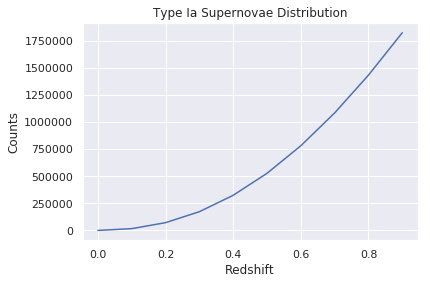

In [49]:
plt.plot(np.arange(0,1,.1),real_prior_low_z(np.arange(0,1,.1)))
plt.xlabel('Redshift')
plt.ylabel('Counts')
plt.title('Type Ia Supernovae Distribution')

In [50]:
p_cdf = 0
prior_cdf = []
for p_val in np.arange(0.0, 2.51, 0.001):
    p_cdf += prior_z(p_val)
    prior_cdf.append(p_cdf)

In [51]:
filt_edges = []
for point_loc in point_list:
    filt_edges.append([point_loc[0]-50., point_loc[0]+50., point_loc[1]-50., point_loc[1]+50.])

# Train Comb to Type Ia and II

In [51]:
#no frozen, 3 filters, real prior, 20nm
sig_example = siggi([salt2_spec_list_train[0],salt2_spec_list_train[1],salt2_spec_list_train[2],salt2_spec_list_train[3],
                     salt2_spec_list_train[4],salt2_spec_list_train[5],salt2_spec_list_train[6],s11_spec_list_train[0],
                     s11_spec_list_train[1],s11_spec_list_train[2],s11_spec_list_train[3],s11_spec_list_train[4],
                     s11_spec_list_train[5],s11_spec_list_train[6]], [1.0], real_prior_low_z, calib_filter=bp_dict['r'],
                    z_min=0.00, z_max=.76, z_steps=21, phot_params=new_phot_params, calib_mag=23.7)

In [52]:
test_rand_state = np.random.RandomState(2325)    
num_filters = 3
set_ratio = 1
res_mix1 = sig_example.optimize_filters(num_filters=num_filters,
                                     filt_min=300., filt_max=1100.,
                                     set_ratio=set_ratio,
                                     system_wavelen_max=1200.,
                                     n_opt_points=50,
                                     optimizer_verbosity=5,
                                     procs=1, acq_func_kwargs_dict={'kappa':1.8},
                                     #=frozen_dict_all, frozen_filt_eff_wavelen=[365., 477., 622., 765., 870., 1015],
                                     #starting_points = [[mid-50., mid+50., mid_2-50., mid_2+50.] for mid, mid_2 in point_list],
                                     starting_points = None,
                                     rand_state = test_rand_state,
                                     set_width = 20)


[[300.0, 690.0, 1080.0], [566.6666666666667, 823.3333333333334, 1080.0], [833.3333333333334, 956.6666666666667, 1080.0], [376.86514058556975, 501.91118594174134, 541.8013970009033], [418.40966345926034, 554.881055009717, 1018.3848730498541], [317.3853499502618, 472.1803977483952, 623.7248782788874], [476.5379008142483, 546.4069561954537, 664.12296761259], [534.2570740349437, 591.8741853766697, 749.6026837305512], [571.6284587949724, 988.0922628225737, 1047.035466964916], [333.71939669208973, 585.2142296109222, 811.267751567073]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   29.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   40.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.7min finished


-0.45363034092430476 10
[493.5999999998239, 309.9999999999909, 422.19999999988886] [[483.50815833561126, 483.50815833561126, 503.50815833561126, 503.50815833561126], [300.0, 300.0, 320.0, 320.0], [412.11881595225856, 412.11881595225856, 432.11881595225856, 432.11881595225856]]
1
[484.699999999832, 642.5999999996884, 694.5999999996411] [[474.60529428162215, 474.60529428162215, 494.60529428162215, 494.60529428162215], [632.5838293586378, 632.5838293586378, 652.5838293586378, 652.5838293586378], [684.5411343601637, 684.5411343601637, 704.5411343601637, 704.5411343601637]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s finished


-0.45363034092430476 11
[520.5999999997994, 921.5999999994347, 665.1999999996679] [[510.5113727865829, 510.5113727865829, 530.5113727865829, 530.5113727865829], [911.5052629382725, 911.5052629382725, 931.5052629382725, 931.5052629382725], [655.1428722084672, 655.1428722084672, 675.1428722084672, 675.1428722084672]]
1
[489.8999999998273, 449.9999999998636, 706.79999999963] [[479.8984699016807, 479.8984699016807, 499.8984699016807, 499.8984699016807], [439.9664556679613, 439.9664556679613, 459.9664556679613, 459.9664556679613], [696.7100613394084, 696.7100613394084, 716.7100613394084, 716.7100613394084]]
2
[573.9999999997508, 576.3999999997486, 673.3999999996604] [[563.9694106865453, 563.9694106865453, 583.9694106865453, 583.9694106865453], [566.3938343896479, 566.3938343896479, 586.3938343896479, 586.3938343896479], [663.3375267600998, 663.3375267600998, 683.3375267600998, 683.3375267600998]]
3
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s finished


-0.45363034092430476 12
[327.19999999997526, 628.8999999997009, 643.2999999996878] [[317.1148472579223, 317.1148472579223, 337.1148472579223, 337.1148472579223], [618.8044091400545, 618.8044091400545, 638.8044091400545, 638.8044091400545], [633.2053220147503, 633.2053220147503, 653.2053220147503, 653.2053220147503]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s finished


-0.45363034092430476 13
[487.5999999998294, 575.3999999997495, 643.6999999996874] [[477.57689092486, 477.57689092486, 497.57689092486, 497.57689092486], [565.3518613108126, 565.3518613108126, 585.3518613108126, 585.3518613108126], [633.6331291316424, 633.6331291316424, 653.6331291316424, 653.6331291316424]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s finished


-0.45363034092430476 14
[497.4999999998204, 628.799999999701, 309.9999999999909] [[487.43896465722594, 487.43896465722594, 507.43896465722594, 507.43896465722594], [618.7699016350368, 618.7699016350368, 638.7699016350368, 638.7699016350368], [300.0, 300.0, 320.0, 320.0]]
1
[489.39999999982774, 568.9999999997553, 683.1999999996515] [[479.3911667517334, 479.3911667517334, 499.3911667517334, 499.3911667517334], [558.9610807753311, 558.9610807753311, 578.9610807753311, 578.9610807753311], [673.1547138519477, 673.1547138519477, 693.1547138519477, 693.1547138519477]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s finished


-0.45363034092430476 15
[495.3999999998223, 621.5999999997075, 700.9999999996353] [[485.34980025764185, 485.34980025764185, 505.34980025764185, 505.34980025764185], [611.5843366574308, 611.5843366574308, 631.5843366574308, 631.5843366574308], [690.9069372325612, 690.9069372325612, 710.9069372325612, 710.9069372325612]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s finished


-0.45363034092430476 16
[497.19999999982065, 555.9999999997672, 710.6999999996265] [[487.1455910076679, 487.1455910076679, 507.1455910076679, 507.1455910076679], [545.9122010311056, 545.9122010311056, 565.9122010311056, 565.9122010311056], [700.6388253904638, 700.6388253904638, 720.6388253904638, 720.6388253904638]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s finished


-0.45363034092430476 17
[487.8999999998291, 659.499999999673, 692.7999999996428] [[477.85609450724905, 477.85609450724905, 497.85609450724905, 497.85609450724905], [649.4564242567724, 649.4564242567724, 669.4564242567724, 669.4564242567724], [682.7753556562856, 682.7753556562856, 702.7753556562856, 702.7753556562856]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s finished


-0.45363034092430476 18
[473.5999999998421, 564.5999999997593, 679.7999999996546] [[463.5721075339345, 463.5721075339345, 483.5721075339345, 483.5721075339345], [554.5350248728982, 554.5350248728982, 574.5350248728982, 574.5350248728982], [669.7026067642018, 669.7026067642018, 689.7026067642018, 689.7026067642018]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s finished


-0.45363034092430476 19
[445.29999999986785, 650.699999999681, 730.2999999996086] [[435.26418110952636, 435.26418110952636, 455.26418110952636, 455.26418110952636], [640.654203973103, 640.654203973103, 660.654203973103, 660.654203973103], [720.2518758548772, 720.2518758548772, 740.2518758548772, 740.2518758548772]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s finished


-0.45363034092430476 20
[499.9999999998181, 561.5999999997621, 678.4999999996558] [[489.93196016734714, 489.93196016734714, 509.93196016734714, 509.93196016734714], [551.5044508787988, 551.5044508787988, 571.5044508787988, 571.5044508787988], [668.4662083150018, 668.4662083150018, 688.4662083150018, 688.4662083150018]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s finished


-0.45363034092430476 21
[524.5999999997957, 642.3999999996886, 665.3999999996677] [[514.5052550606952, 514.5052550606952, 534.5052550606952, 534.5052550606952], [632.3796007844533, 632.3796007844533, 652.3796007844533, 652.3796007844533], [655.3089197059835, 655.3089197059835, 675.3089197059835, 675.3089197059835]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s finished


-0.45363034092430476 22
[515.7999999998037, 644.099999999687, 681.1999999996533] [[505.754547796416, 505.754547796416, 525.754547796416, 525.754547796416], [634.0112467747314, 634.0112467747314, 654.0112467747314, 654.0112467747314], [671.1032340105533, 671.1032340105533, 691.1032340105533, 691.1032340105533]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s finished


-0.5113840265869953 23
[573.9999999997508, 646.299999999685, 687.3999999996477] [[563.9311255514376, 563.9311255514376, 583.9311255514376, 583.9311255514376], [636.2478526400013, 636.2478526400013, 656.2478526400013, 656.2478526400013], [677.3029364781432, 677.3029364781432, 697.3029364781432, 697.3029364781432]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s finished


-0.5113840265869953 24
[736.8999999996026, 671.7999999996618, 762.0999999995797] [[726.8034262420297, 726.8034262420297, 746.8034262420297, 746.8034262420297], [661.7089579715625, 661.7089579715625, 681.7089579715625, 681.7089579715625], [752.0177753172495, 752.0177753172495, 772.0177753172495, 772.0177753172495]]
1
[353.79999999995107, 642.7999999996882, 676.8999999996572] [[343.70612218150563, 343.70612218150563, 363.70612218150563, 363.70612218150563], [632.7420803038056, 632.7420803038056, 652.7420803038056, 652.7420803038056], [666.8270295925512, 666.8270295925512, 686.8270295925512, 686.8270295925512]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s finished


-0.5113840265869953 25
[527.1999999997934, 637.0999999996934, 680.2999999996541] [[517.1853425121496, 517.1853425121496, 537.1853425121496, 537.1853425121496], [627.0519581161291, 627.0519581161291, 647.0519581161291, 647.0519581161291], [670.2849553344622, 670.2849553344622, 690.2849553344622, 690.2849553344622]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s finished


-0.5113840265869953 26
[719.3999999996186, 693.599999999642, 628.0999999997016] [[709.3380315013039, 709.3380315013039, 729.3380315013039, 729.3380315013039], [683.5794165520259, 683.5794165520259, 703.5794165520259, 703.5794165520259], [618.0056462432667, 618.0056462432667, 638.0056462432667, 638.0056462432667]]
1
[936.8999999994207, 1109.9999999992633, 309.9999999999909] [[926.8985035738627, 926.8985035738627, 946.8985035738627, 946.8985035738627], [1100.0, 1100.0, 1120.0, 1120.0], [300.0, 300.0, 320.0, 320.0]]
2
3
[1109.9999999992633, 1109.9999999992633, 802.8999999995426] [[1100.0, 1100.0, 1120.0, 1120.0], [1100.0, 1100.0, 1120.0, 1120.0], [792.8518974549334, 792.8518974549334, 812.8518974549334, 812.8518974549334]]
4
[1109.9999999992633, 848.599999999501, 309.9999999999909] [[1100.0, 1100.0, 1120.0, 1120.0], [838.5600852293127, 838.5600852293127, 858.5600852293127, 858.5600852293127], [300.0, 300.0, 320.0, 320.0]]
5
[540.1999999997815, 531.999999999789, 642.4999999996885] [[530.17

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s finished


-0.5337665566097023 27
[533.9999999997872, 648.9999999996826, 690.4999999996448] [[523.9102873150298, 523.9102873150298, 543.9102873150298, 543.9102873150298], [638.9164728428343, 638.9164728428343, 658.9164728428343, 658.9164728428343], [680.4373218066492, 680.4373218066492, 700.4373218066492, 700.4373218066492]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s finished


-0.5391075751478911 28
1
[309.9999999999909, 701.8999999996345, 716.5999999996211] [[300.0, 300.0, 320.0, 320.0], [691.8387227756534, 691.8387227756534, 711.8387227756534, 711.8387227756534], [706.5874245910264, 706.5874245910264, 726.5874245910264, 726.5874245910264]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s finished


-0.5391075751478911 29
[535.5999999997857, 644.099999999687, 699.7999999996364] [[525.5897844674583, 525.5897844674583, 545.5897844674583, 545.5897844674583], [634.0320032879198, 634.0320032879198, 654.0320032879198, 654.0320032879198], [689.7923639535372, 689.7923639535372, 709.7923639535372, 709.7923639535372]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.7s finished


-0.5391075751478911 30
[537.6999999997838, 649.9999999996817, 737.7999999996018] [[527.6874160766071, 527.6874160766071, 547.6874160766071, 547.6874160766071], [639.9639077510519, 639.9639077510519, 659.9639077510519, 659.9639077510519], [727.772437912558, 727.772437912558, 747.772437912558, 747.772437912558]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s finished


-0.5391075751478911 31
[540.799999999781, 654.7999999996773, 687.3999999996477] [[530.7981788386544, 530.7981788386544, 550.7981788386544, 550.7981788386544], [644.7647655734077, 644.7647655734077, 664.7647655734077, 664.7647655734077], [677.3307612051274, 677.3307612051274, 697.3307612051274, 697.3307612051274]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s finished


-0.5391075751478911 32
[1109.9999999992633, 451.89999999986185, 309.9999999999909] [[1100.0, 1100.0, 1120.0, 1120.0], [441.85735960002825, 441.85735960002825, 461.85735960002825, 461.85735960002825], [300.0, 300.0, 320.0, 320.0]]
1
2
[1109.9999999992633, 309.9999999999909, 675.999999999658] [[1100.0, 1100.0, 1120.0, 1120.0], [300.0, 300.0, 320.0, 320.0], [665.9900428643778, 665.9900428643778, 685.9900428643778, 685.9900428643778]]
3
[309.9999999999909, 992.4999999993702, 309.9999999999909] [[300.0, 300.0, 320.0, 320.0], [982.4257549966534, 982.4257549966534, 1002.4257549966534, 1002.4257549966534], [300.0, 300.0, 320.0, 320.0]]
4
[351.29999999995334, 540.6999999997811, 676.6999999996574] [[341.2511866173214, 341.2511866173214, 361.2511866173214, 361.2511866173214], [530.6606951151159, 530.6606951151159, 550.6606951151159, 550.6606951151159], [666.6575139167778, 666.6575139167778, 686.6575139167778, 686.6575139167778]]
5
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s finished


-0.5391075751478911 33
[309.9999999999909, 528.2999999997924, 733.4999999996057] [[300.0, 300.0, 320.0, 320.0], [518.2654361600556, 518.2654361600556, 538.2654361600556, 538.2654361600556], [723.4446325556607, 723.4446325556607, 743.4446325556607, 743.4446325556607]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s finished


-0.5391075751478911 34
[309.9999999999909, 1109.9999999992633, 764.1999999995778] [[300.0, 300.0, 320.0, 320.0], [1100.0, 1100.0, 1120.0, 1120.0], [754.1874630629618, 754.1874630629618, 774.1874630629618, 774.1874630629618]]
1
[309.9999999999909, 546.0999999997762, 624.6999999997047] [[300.0, 300.0, 320.0, 320.0], [536.0501355069854, 536.0501355069854, 556.0501355069854, 556.0501355069854], [614.6595363875958, 614.6595363875958, 634.6595363875958, 634.6595363875958]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s finished


-0.5391075751478911 35
[309.9999999999909, 474.3999999998414, 425.39999999988595] [[300.0, 300.0, 320.0, 320.0], [464.36568090173307, 464.36568090173307, 484.36568090173307, 484.36568090173307], [415.3959935237403, 415.3959935237403, 435.3959935237403, 435.3959935237403]]
1
2
[1109.9999999992633, 852.7999999994972, 825.0999999995224] [[1100.0, 1100.0, 1120.0, 1120.0], [842.7704594053752, 842.7704594053752, 862.7704594053752, 862.7704594053752], [815.0119515840415, 815.0119515840415, 835.0119515840415, 835.0119515840415]]
3
[309.9999999999909, 805.9999999995398, 309.9999999999909] [[300.0, 300.0, 320.0, 320.0], [795.9444305222254, 795.9444305222254, 815.9444305222254, 815.9444305222254], [300.0, 300.0, 320.0, 320.0]]
4
[543.3999999997786, 683.3999999996513, 690.3999999996449] [[533.3705453696368, 533.3705453696368, 553.3705453696368, 553.3705453696368], [673.3822020039745, 673.3822020039745, 693.3822020039745, 693.3822020039745], [680.3062975627844, 680.3062975627844, 700.3062975627844,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s finished


-0.5391075751478911 36
[528.8999999997918, 653.4999999996785, 601.0999999997262] [[518.8517085314934, 518.8517085314934, 538.8517085314934, 538.8517085314934], [643.4994076741892, 643.4994076741892, 663.4994076741892, 663.4994076741892], [591.0129934851942, 591.0129934851942, 611.0129934851942, 611.0129934851942]]
1
[544.1999999997779, 716.1999999996215, 724.4999999996139] [[534.14209857614, 534.14209857614, 554.14209857614, 554.14209857614], [706.128414831472, 706.128414831472, 726.128414831472, 726.128414831472], [714.484526457513, 714.484526457513, 734.484526457513, 734.484526457513]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s finished


-0.5391075751478911 37
[420.4999999998904, 538.9999999997826, 687.3999999996477] [[410.4440115402622, 410.4440115402622, 430.4440115402622, 430.4440115402622], [528.9884489067741, 528.9884489067741, 548.9884489067741, 548.9884489067741], [677.3173636428157, 677.3173636428157, 697.3173636428157, 697.3173636428157]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s finished


-0.5391075751478911 38
[1109.9999999992633, 651.79999999968, 309.9999999999909] [[1100.0, 1100.0, 1120.0, 1120.0], [641.7627286161592, 641.7627286161592, 661.7627286161592, 661.7627286161592], [300.0, 300.0, 320.0, 320.0]]
1
[544.6999999997774, 621.1999999997079, 690.3999999996449] [[534.6216283175825, 534.6216283175825, 554.6216283175825, 554.6216283175825], [611.1736576314574, 611.1736576314574, 631.1736576314574, 631.1736576314574], [680.3342419539963, 680.3342419539963, 700.3342419539963, 700.3342419539963]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s finished


-0.5391075751478911 39
[1109.9999999992633, 983.3999999993785, 550.1999999997724] [[1100.0, 1100.0, 1120.0, 1120.0], [973.3791262100489, 973.3791262100489, 993.3791262100489, 993.3791262100489], [540.1867735888175, 540.1867735888175, 560.1867735888175, 560.1867735888175]]
1
[466.5999999998485, 605.8999999997218, 674.4999999996594] [[456.56481024586054, 456.56481024586054, 476.56481024586054, 476.56481024586054], [595.8803679797909, 595.8803679797909, 615.8803679797909, 615.8803679797909], [664.4095510825068, 664.4095510825068, 684.4095510825068, 684.4095510825068]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s finished


-0.5391075751478911 40
[309.9999999999909, 309.9999999999909, 927.2999999994295] [[300.0, 300.0, 320.0, 320.0], [300.0, 300.0, 320.0, 320.0], [917.282482430653, 917.282482430653, 937.282482430653, 937.282482430653]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s finished


-0.5391075751478911 41
[1109.9999999992633, 309.9999999999909, 901.2999999994531] [[1100.0, 1100.0, 1120.0, 1120.0], [300.0, 300.0, 320.0, 320.0], [891.2546894827616, 891.2546894827616, 911.2546894827616, 911.2546894827616]]
1
[309.9999999999909, 1109.9999999992633, 498.8999999998191] [[300.0, 300.0, 320.0, 320.0], [1100.0, 1100.0, 1120.0, 1120.0], [488.85990145670553, 488.85990145670553, 508.85990145670553, 508.85990145670553]]
2
[500.49999999981765, 617.699999999711, 677.5999999996566] [[490.4132184581186, 490.4132184581186, 510.4132184581186, 510.4132184581186], [607.6593909283863, 607.6593909283863, 627.6593909283863, 627.6593909283863], [667.5730513157121, 667.5730513157121, 687.5730513157121, 687.5730513157121]]
3
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s finished


-0.5391075751478911 42
[309.9999999999909, 1109.9999999992633, 956.6999999994027] [[300.0, 300.0, 320.0, 320.0], [1100.0, 1100.0, 1120.0, 1120.0], [946.6161658348211, 946.6161658348211, 966.6161658348211, 966.6161658348211]]
1
[1109.9999999992633, 309.9999999999909, 481.0999999998353] [[1100.0, 1100.0, 1120.0, 1120.0], [300.0, 300.0, 320.0, 320.0], [471.0802249702191, 471.0802249702191, 491.0802249702191, 491.0802249702191]]
2
[579.5999999997457, 684.8999999996499, 952.2999999994067] [[569.5976703880058, 569.5976703880058, 589.5976703880058, 589.5976703880058], [674.8683824868905, 674.8683824868905, 694.8683824868905, 694.8683824868905], [942.2606577894289, 942.2606577894289, 962.2606577894289, 962.2606577894289]]
3
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s finished


-0.5391075751478911 43
[359.8999999999455, 709.3999999996277, 945.6999999994127] [[349.86259945605013, 349.86259945605013, 369.86259945605013, 369.86259945605013], [699.3905393611735, 699.3905393611735, 719.3905393611735, 719.3905393611735], [935.6963750022862, 935.6963750022862, 955.6963750022862, 955.6963750022862]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s finished


-0.5391075751478911 44
[726.599999999612, 591.9999999997344, 963.9999999993961] [[716.5516678099941, 716.5516678099941, 736.5516678099941, 736.5516678099941], [581.9029430962993, 581.9029430962993, 601.9029430962993, 601.9029430962993], [953.9693482660606, 953.9693482660606, 973.9693482660606, 973.9693482660606]]
1
[501.0999999998171, 625.9999999997035, 814.7999999995318] [[491.06048145596367, 491.06048145596367, 511.06048145596367, 511.06048145596367], [615.9853257372073, 615.9853257372073, 635.9853257372073, 635.9853257372073], [804.7609935041002, 804.7609935041002, 824.7609935041002, 824.7609935041002]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s finished


-0.5391075751478911 45
[495.7999999998219, 623.3999999997059, 749.0999999995915] [[485.7601708770792, 485.7601708770792, 505.7601708770792, 505.7601708770792], [613.3937228602607, 613.3937228602607, 633.3937228602607, 633.3937228602607], [739.0015989176943, 739.0015989176943, 759.0015989176943, 759.0015989176943]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s finished


-0.5391075751478911 46
[611.3999999997168, 817.6999999995292, 917.5999999994383] [[601.3486146272527, 601.3486146272527, 621.3486146272527, 621.3486146272527], [807.67349038289, 807.67349038289, 827.67349038289, 827.67349038289], [907.5447875022894, 907.5447875022894, 927.5447875022894, 927.5447875022894]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s finished


-0.5391075751478911 47
[496.4999999998213, 624.399999999705, 741.6999999995983] [[486.4462575168915, 486.4462575168915, 506.4462575168915, 506.4462575168915], [614.3473383858034, 614.3473383858034, 634.3473383858034, 634.3473383858034], [731.6222624779843, 731.6222624779843, 751.6222624779843, 751.6222624779843]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s finished


-0.5391075751478911 48
[628.699999999701, 1109.9999999992633, 309.9999999999909] [[618.664114802767, 618.664114802767, 638.664114802767, 638.664114802767], [1100.0, 1100.0, 1120.0, 1120.0], [300.0, 300.0, 320.0, 320.0]]
1
[507.19999999981155, 619.3999999997095, 678.4999999996558] [[497.1511998626286, 497.1511998626286, 517.1511998626286, 517.1511998626286], [609.3199959069806, 609.3199959069806, 629.3199959069806, 629.3199959069806], [668.4044901720032, 668.4044901720032, 688.4044901720032, 688.4044901720032]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s finished


-0.5391075751478911 49
[504.499999999814, 618.2999999997105, 678.199999999656] [[494.4033181747603, 494.4033181747603, 514.4033181747602, 514.4033181747602], [608.2309940758189, 608.2309940758189, 628.2309940758189, 628.2309940758189], [668.1533841587789, 668.1533841587789, 688.1533841587789, 688.1533841587789]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s finished


-0.5391075751478911 50


In [53]:
min_idxmix1 = np.argmin(res_mix1.yi[:-3])
best_ptmix1 = res_mix1.Xi[min_idxmix1]
print(best_ptmix1, res_mix1.yi[min_idxmix1])

[523.9102873150298, 638.9164728428343, 680.4373218066492] -0.5391075751478911


In [54]:
sig_plotmix1 = plotting([cpsalt2_spec_50], best_ptmix1, 'trap',
                    #=frozen_dict_all, frozen_filt_eff_wavelen=[365., 477., 622., 765., 870., 1015], 
                    #set_ratio=0.5
                    set_ratio = 1, sed_mags=23.7, set_width = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

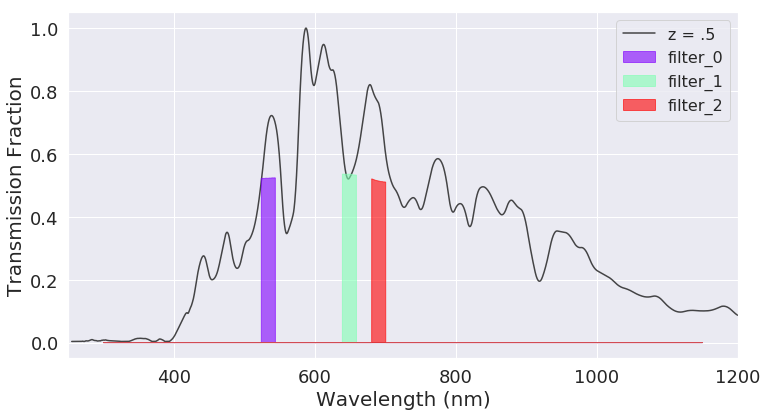

In [55]:
fig = plt.figure(figsize=(12, 14))
fig.add_subplot(2,1,1)
sig_plotmix1.plot_filters(fig=fig)
ax = plt.gca()
ax.lines[0].set_alpha(0.8)
plt.xlabel('Wavelength (nm)', size=20)
plt.ylabel('Transmission Fraction', size=20)
plt.legend((['z = .5'] + sig_plotmix1.filter_dict.keys()), 
           loc=0, fontsize=16)
plt.xticks(size=18)
plt.yticks(size=18)
#plt.savefig('Example_2.pdf')



In [56]:
#exp time = 15, 20nm, real prior
sig_plotmix1.filter_dict.keys()

['filter_0', 'filter_1', 'filter_2']

In [57]:
f0 = sig_plotmix1.filter_dict['filter_0']
f0.writeThroughput('Filter_Saves/total_mix1a.dat')

In [58]:
f1 = sig_plotmix1.filter_dict['filter_1']
f1.writeThroughput('Filter_Saves/total_mix1b.dat')

In [59]:
f2 = sig_plotmix1.filter_dict['filter_2']
f2.writeThroughput('Filter_Saves/total_mix1c.dat')

In [60]:
saved_frozen_dict1 = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['mix1a','mix1b','mix1c'], bandpassRoot = 'total_')

In [61]:
saved_frozen_dict1.keys()

['mix1a', 'mix1b', 'mix1c']

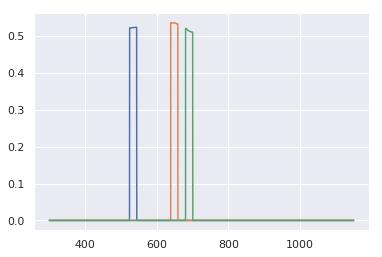

In [62]:
plt.plot(saved_frozen_dict1['mix1a'].wavelen,saved_frozen_dict1['mix1a'].sb)
plt.plot(saved_frozen_dict1['mix1b'].wavelen,saved_frozen_dict1['mix1b'].sb)
plt.plot(saved_frozen_dict1['mix1c'].wavelen,saved_frozen_dict1['mix1c'].sb)

In [63]:
#no frozen, 3 filters, real prior, 20nm
sig_example = siggi([salt2_spec_list_train[0],salt2_spec_list_train[1],salt2_spec_list_train[2],salt2_spec_list_train[3],
                     salt2_spec_list_train[4],salt2_spec_list_train[5],salt2_spec_list_train[6],s11_spec_list_train[0],
                     s11_spec_list_train[1],s11_spec_list_train[2],s11_spec_list_train[3],s11_spec_list_train[4],
                     s11_spec_list_train[5],s11_spec_list_train[6]], [1.0], real_prior_low_z, calib_filter=bp_dict['r'],
                    z_min=0.00, z_max=.76, z_steps=21, phot_params=new_phot_params, calib_mag=23.7)

In [64]:
test_rand_state = np.random.RandomState(2325)    
num_filters = 3
set_ratio = 1
res_mix1b = sig_example.optimize_filters(num_filters=num_filters,
                                     filt_min=300., filt_max=1100.,
                                     set_ratio=set_ratio,
                                     system_wavelen_max=1200.,
                                     n_opt_points=50,
                                     optimizer_verbosity=5,
                                     procs=1, acq_func_kwargs_dict={'kappa':1.8},
                                     frozen_filt_dict=saved_frozen_dict1, 
                                     frozen_filt_eff_wavelen=[best_ptmix1[0]+10,best_ptmix1[1]+10,best_ptmix1[2]+10],
                                     #starting_points = [[mid-50., mid+50., mid_2-50., mid_2+50.] for mid, mid_2 in point_list],
                                     starting_points = None,
                                     rand_state = test_rand_state,
                                     set_width = 20)


[[300.0, 690.0, 1080.0], [566.6666666666667, 823.3333333333334, 1080.0], [833.3333333333334, 956.6666666666667, 1080.0], [376.86514058556975, 501.91118594174134, 541.8013970009033], [418.40966345926034, 554.881055009717, 1018.3848730498541], [317.3853499502618, 472.1803977483952, 623.7248782788874], [476.5379008142483, 546.4069561954537, 664.12296761259], [534.2570740349437, 591.8741853766697, 749.6026837305512], [571.6284587949724, 988.0922628225737, 1047.035466964916], [333.71939669208973, 585.2142296109222, 811.267751567073]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.6min finished


-0.6064684465429395 10
1
[1109.9999999992633, 613.0999999997152, 309.9999999999909] [[1100.0, 1100.0, 1120.0, 1120.0], [603.0291406324015, 603.0291406324015, 623.0291406324015, 623.0291406324015], [300.0, 300.0, 320.0, 320.0]]
2
[529.8999999997909, 648.2999999996832, 309.9999999999909] [[519.8449045792479, 519.8449045792479, 539.8449045792479, 539.8449045792479], [638.2651539406429, 638.2651539406429, 658.2651539406429, 658.2651539406429], [300.0, 300.0, 320.0, 320.0]]
3
[1091.7999999992799, 757.4999999995839, 957.499999999402] [[1081.7950645468964, 1081.7950645468964, 1101.7950645468964, 1101.7950645468964], [747.4783868908853, 747.4783868908853, 767.4783868908853, 767.4783868908853], [947.4906215031228, 947.4906215031228, 967.4906215031228, 967.4906215031228]]
4
[405.9999999999036, 678.9999999996553, 642.1999999996888] [[395.90694423558125, 395.90694423558125, 415.90694423558125, 415.90694423558125], [668.9383427885812, 668.9383427885812, 688.9383427885812, 688.9383427885812], [632.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.2s finished


-0.6064684465429395 11
[545.5999999997766, 355.79999999994925, 452.6999999998611] [[535.5003930039303, 535.5003930039303, 555.5003930039303, 555.5003930039303], [345.7784602724941, 345.7784602724941, 365.7784602724941, 365.7784602724941], [442.6751601337385, 442.6751601337385, 462.6751601337385, 462.6751601337385]]
1
[1028.1999999993377, 634.8999999996954, 761.0999999995806] [[1018.1813370940083, 1018.1813370940083, 1038.1813370940083, 1038.1813370940083], [624.8199573489045, 624.8199573489045, 644.8199573489045, 644.8199573489045], [751.0419054303236, 751.0419054303236, 771.0419054303236, 771.0419054303236]]
2
[309.9999999999909, 767.5999999995747, 931.099999999426] [[300.0, 300.0, 320.0, 320.0], [757.5113091728895, 757.5113091728895, 777.5113091728895, 777.5113091728895], [921.0648686509132, 921.0648686509132, 941.0648686509132, 941.0648686509132]]
3
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.0s finished


-0.6064684465429395 12
1
[309.9999999999909, 945.399999999413, 758.8999999995826] [[300.0, 300.0, 320.0, 320.0], [935.3602276856034, 935.3602276856034, 955.3602276856034, 955.3602276856034], [748.8140576519487, 748.8140576519487, 768.8140576519487, 768.8140576519487]]
2
[522.9999999997972, 592.6999999997338, 759.3999999995822] [[512.9805982429397, 512.9805982429397, 532.9805982429397, 532.9805982429397], [582.639389302878, 582.639389302878, 602.639389302878, 602.639389302878], [749.3153181996321, 749.3153181996321, 769.3153181996321, 769.3153181996321]]
3
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.7s finished


-0.6064684465429395 13
[406.79999999990287, 556.3999999997668, 857.0999999994933] [[396.73222467403855, 396.73222467403855, 416.73222467403855, 416.73222467403855], [546.3591117625468, 546.3591117625468, 566.3591117625468, 566.3591117625468], [847.072989949923, 847.072989949923, 867.072989949923, 867.072989949923]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.4s finished


-0.6064684465429395 14
[309.9999999999909, 513.4999999998058, 1071.5999999992982] [[300.0, 300.0, 320.0, 320.0], [503.4336147607619, 503.4336147607619, 523.4336147607619, 523.4336147607619], [1061.5297415004088, 1061.5297415004088, 1081.5297415004088, 1081.5297415004088]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.3s finished


-0.6064684465429395 15
[458.8999999998555, 572.5999999997521, 785.8999999995581] [[448.8767109901822, 448.8767109901822, 468.8767109901822, 468.8767109901822], [562.5992574605643, 562.5992574605643, 582.5992574605643, 582.5992574605643], [775.8037452054996, 775.8037452054996, 795.8037452054996, 795.8037452054996]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.0s finished


-0.6064684465429395 16
1
[564.4999999997594, 592.5999999997339, 759.8999999995817] [[554.4194962684022, 554.4194962684022, 574.4194962684022, 574.4194962684022], [582.5674977200166, 582.5674977200166, 602.5674977200166, 602.5674977200166], [749.8736689192363, 749.8736689192363, 769.8736689192363, 769.8736689192363]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.7s finished


-0.6064684465429395 17
[309.9999999999909, 736.6999999996028, 933.4999999994238] [[300.0, 300.0, 320.0, 320.0], [726.6845349371683, 726.6845349371683, 746.6845349371683, 746.6845349371683], [923.4462531800226, 923.4462531800226, 943.4462531800226, 943.4462531800226]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.9s finished


-0.6064684465429395 18
[394.49999999991405, 610.6999999997174, 850.1999999994996] [[384.47843653110476, 384.47843653110476, 404.47843653110476, 404.47843653110476], [600.6320517758777, 600.6320517758777, 620.6320517758777, 620.6320517758777], [840.1070247764986, 840.1070247764986, 860.1070247764986, 860.1070247764986]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.4s finished


-0.6064684465429395 19
[605.4999999997221, 678.5999999996557, 851.7999999994981] [[595.4685738019537, 595.4685738019537, 615.4685738019537, 615.4685738019537], [668.5284646915668, 668.5284646915668, 688.5284646915668, 688.5284646915668], [841.7084455887294, 841.7084455887294, 861.7084455887294, 861.7084455887294]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.1s finished


-0.6064684465429395 20
[463.99999999985084, 667.6999999996656, 852.2999999994977] [[453.9657690806409, 453.9657690806409, 473.9657690806409, 473.9657690806409], [657.6885553788943, 657.6885553788943, 677.6885553788943, 677.6885553788943], [842.2515643218762, 842.2515643218762, 862.2515643218762, 862.2515643218762]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.3s finished


-0.6064684465429395 21
[416.0999999998944, 313.4999999999877, 837.8999999995108] [[406.0244829806321, 406.0244829806321, 426.0244829806321, 426.0244829806321], [303.4421278356156, 303.4421278356156, 323.4421278356156, 323.4421278356156], [827.816639822228, 827.816639822228, 847.816639822228, 847.816639822228]]
1
[328.599999999974, 613.4999999997149, 851.899999999498] [[318.5774542192218, 318.5774542192218, 338.5774542192218, 338.5774542192218], [603.4981242529459, 603.4981242529459, 623.4981242529459, 623.4981242529459], [841.8616868898018, 841.8616868898018, 861.8616868898018, 861.8616868898018]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.6s finished


-0.6064684465429395 22
[587.2999999997387, 757.2999999995841, 959.3999999994003] [[577.2400746949902, 577.2400746949902, 597.2400746949902, 597.2400746949902], [747.2758692865407, 747.2758692865407, 767.2758692865407, 767.2758692865407], [949.3216589269665, 949.3216589269665, 969.3216589269665, 969.3216589269665]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.2s finished


-0.6064684465429395 23
1
[673.9999999996598, 511.39999999980773, 862.0999999994888] [[663.9794065284019, 663.9794065284019, 683.9794065284019, 683.9794065284019], [501.3367316569937, 501.3367316569937, 521.3367316569937, 521.3367316569937], [852.0995612824738, 852.0995612824738, 872.0995612824738, 872.0995612824738]]
2
[585.9999999997399, 426.69999999988477, 849.2999999995004] [[575.9295725731427, 575.9295725731427, 595.9295725731427, 595.9295725731427], [416.68381352660344, 416.68381352660344, 436.68381352660344, 436.68381352660344], [839.2173606451514, 839.2173606451514, 859.2173606451514, 859.2173606451514]]
3
[552.0999999997707, 623.4999999997058, 764.5999999995774] [[542.0600221895867, 542.0600221895867, 562.0600221895867, 562.0600221895867], [613.4111941646464, 613.4111941646464, 633.4111941646464, 633.4111941646464], [754.5704297147295, 754.5704297147295, 774.5704297147295, 774.5704297147295]]
4
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.3s finished


-0.6064684465429395 24
[410.09999999989986, 601.6999999997256, 911.0999999994442] [[400.04040832361096, 400.04040832361096, 420.04040832361096, 420.04040832361096], [591.6556990193027, 591.6556990193027, 611.6556990193027, 611.6556990193027], [901.0880473688388, 901.0880473688388, 921.0880473688388, 921.0880473688388]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.3s finished


-0.6064684465429395 25
[560.9999999997626, 695.1999999996406, 872.9999999994789] [[550.9094499795413, 550.9094499795413, 570.9094499795413, 570.9094499795413], [685.1838335095106, 685.1838335095106, 705.1838335095106, 705.1838335095106], [862.9604184581672, 862.9604184581672, 882.9604184581672, 882.9604184581672]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.1s finished


-0.6064684465429395 26
[445.19999999986794, 608.8999999997191, 894.4999999994593] [[435.1483862937605, 435.1483862937605, 455.1483862937605, 455.1483862937605], [598.8440962032462, 598.8440962032462, 618.8440962032462, 618.8440962032462], [884.4866953199859, 884.4866953199859, 904.4866953199859, 904.4866953199859]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.9s finished


-0.6099318507672713 27
1
[457.7999999998565, 615.1999999997133, 901.6999999994528] [[447.7129853349826, 447.7129853349826, 467.7129853349826, 467.7129853349826], [605.1280871008773, 605.1280871008773, 625.1280871008773, 625.1280871008773], [891.6670166984616, 891.6670166984616, 911.6670166984616, 911.6670166984616]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.7s finished


-0.6099318507672713 28
[421.09999999988986, 507.6999999998111, 641.899999999689] [[411.0138274388662, 411.0138274388662, 431.0138274388662, 431.0138274388662], [497.69639705101736, 497.69639705101736, 517.6963970510174, 517.6963970510174], [631.8049429956608, 631.8049429956608, 651.8049429956608, 651.8049429956608]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.3s finished


-0.6099318507672713 29
[616.3999999997122, 676.5999999996575, 755.5999999995856] [[606.3975750773714, 606.3975750773714, 626.3975750773714, 626.3975750773714], [666.5349595325645, 666.5349595325645, 686.5349595325645, 686.5349595325645], [745.5544336969826, 745.5544336969826, 765.5544336969826, 765.5544336969826]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.6s finished


-0.6099318507672713 30
[377.79999999992924, 598.4999999997285, 930.2999999994267] [[367.75001278918893, 367.75001278918893, 387.75001278918893, 387.75001278918893], [588.4220721882082, 588.4220721882082, 608.4220721882082, 608.4220721882082], [920.2762113573517, 920.2762113573517, 940.2762113573517, 940.2762113573517]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.4s finished


-0.6099318507672713 31
[431.6999999998802, 603.9999999997235, 873.999999999478] [[421.6233091124806, 421.6233091124806, 441.6233091124806, 441.6233091124806], [593.9921799699209, 593.9921799699209, 613.9921799699209, 613.9921799699209], [863.962630816872, 863.962630816872, 883.962630816872, 883.962630816872]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.0s finished


-0.6099318507672713 32
[435.0999999998771, 623.9999999997053, 901.8999999994526] [[425.08747238024336, 425.08747238024336, 445.08747238024336, 445.08747238024336], [613.9409004649149, 613.9409004649149, 633.9409004649149, 633.9409004649149], [891.8627904302011, 891.8627904302011, 911.8627904302011, 911.8627904302011]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.7s finished


-0.6099318507672713 33
[369.299999999937, 466.39999999984866, 428.9999999998827] [[359.2298233543783, 359.2298233543783, 379.2298233543783, 379.2298233543783], [456.37668520445607, 456.37668520445607, 476.37668520445607, 476.37668520445607], [418.90047712774697, 418.90047712774697, 438.90047712774697, 438.90047712774697]]
1
[384.69999999992297, 529.9999999997908, 607.7999999997201] [[374.64679127151237, 374.64679127151237, 394.64679127151237, 394.64679127151237], [519.9663177944, 519.9663177944, 539.9663177944, 539.9663177944], [597.7882731552229, 597.7882731552229, 617.7882731552229, 617.7882731552229]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.2s finished


-0.6099318507672713 34
[448.69999999986476, 587.4999999997385, 874.6999999994773] [[438.68616961856475, 438.68616961856475, 458.68616961856475, 458.68616961856475], [577.4280967376349, 577.4280967376349, 597.4280967376349, 597.4280967376349], [864.6121984237608, 864.6121984237608, 884.6121984237608, 884.6121984237608]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.7s finished


-0.6099318507672713 35
[565.0999999997589, 605.5999999997221, 775.7999999995673] [[555.0541837989119, 555.0541837989119, 575.0541837989119, 575.0541837989119], [595.5993194667415, 595.5993194667415, 615.5993194667415, 615.5993194667415], [765.7953532665337, 765.7953532665337, 785.7953532665337, 785.7953532665337]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.8s finished


-0.6099318507672713 36
[544.4999999997776, 1109.9999999992633, 1010.5999999993537] [[534.410114680366, 534.410114680366, 554.410114680366, 554.410114680366], [1100.0, 1100.0, 1120.0, 1120.0], [1000.5123379232746, 1000.5123379232746, 1020.5123379232746, 1020.5123379232746]]
1
[309.9999999999909, 511.2999999998078, 641.4999999996894] [[300.0, 300.0, 320.0, 320.0], [501.2860196276731, 501.2860196276731, 521.2860196276731, 521.2860196276731], [631.4719328568957, 631.4719328568957, 651.4719328568957, 651.4719328568957]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.3s finished


-0.6099318507672713 37
[437.39999999987504, 530.0999999997907, 543.6999999997784] [[427.3059808404131, 427.3059808404131, 447.3059808404131, 447.3059808404131], [520.0512018243844, 520.0512018243844, 540.0512018243844, 540.0512018243844], [533.6684997514951, 533.6684997514951, 553.6684997514951, 553.6684997514951]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.6s finished


-0.6099318507672713 38
[608.8999999997191, 737.7999999996018, 918.3999999994376] [[598.8819050517238, 598.8819050517238, 618.8819050517238, 618.8819050517238], [727.7829193826085, 727.7829193826085, 747.7829193826085, 747.7829193826085], [908.3306503132416, 908.3306503132416, 928.3306503132416, 928.3306503132416]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.0s finished


-0.6099318507672713 39
[458.39999999985594, 610.2999999997178, 855.3999999994949] [[448.31507015304453, 448.31507015304453, 468.31507015304453, 468.31507015304453], [600.2070983455696, 600.2070983455696, 620.2070983455696, 620.2070983455696], [845.3927169090737, 845.3927169090737, 865.3927169090737, 865.3927169090737]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.9s finished


-0.6171818503687678 40
[593.2999999997332, 841.7999999995072, 1070.0999999992996] [[583.2622915189334, 583.2622915189334, 603.2622915189334, 603.2622915189334], [831.7103380248806, 831.7103380248806, 851.7103380248806, 851.7103380248806], [1060.0266744371697, 1060.0266744371697, 1080.0266744371697, 1080.0266744371697]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.4s finished


-0.6171818503687678 41
[583.699999999742, 602.399999999725, 690.5999999996448] [[573.6335222452302, 573.6335222452302, 593.6335222452302, 593.6335222452302], [592.3261489995908, 592.3261489995908, 612.3261489995908, 612.3261489995908], [680.5176042503559, 680.5176042503559, 700.5176042503559, 700.5176042503559]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.3s finished


-0.6171818503687678 42
[557.5999999997657, 808.5999999995374, 693.3999999996422] [[547.5939825412975, 547.5939825412975, 567.5939825412975, 567.5939825412975], [798.5423351769716, 798.5423351769716, 818.5423351769716, 818.5423351769716], [683.3047400067942, 683.3047400067942, 703.3047400067942, 703.3047400067942]]
1
[309.9999999999909, 555.1999999997679, 1014.3999999993503] [[300.0, 300.0, 320.0, 320.0], [545.1011636110491, 545.1011636110491, 565.1011636110491, 565.1011636110491], [1004.3010119228459, 1004.3010119228459, 1024.3010119228459, 1024.3010119228459]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.7s finished


-0.6171818503687678 43
1
[537.2999999997842, 665.6999999996674, 880.3999999994721] [[527.2338501484787, 527.2338501484787, 547.2338501484787, 547.2338501484787], [655.6330955207876, 655.6330955207876, 675.6330955207876, 675.6330955207876], [870.3402222819877, 870.3402222819877, 890.3402222819877, 890.3402222819877]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.2s finished


-0.6171818503687678 44
[687.1999999996478, 686.999999999648, 804.8999999995408] [[677.1334356074715, 677.1334356074715, 697.1334356074715, 697.1334356074715], [676.9045152053116, 676.9045152053116, 696.9045152053116, 696.9045152053116], [794.8423958208616, 794.8423958208616, 814.8423958208616, 814.8423958208616]]
1
[872.5999999994792, 921.0999999994351, 1068.6999999993009] [[862.5181455819688, 862.5181455819688, 882.5181455819688, 882.5181455819688], [911.0417400182876, 911.0417400182876, 931.0417400182876, 931.0417400182876], [1058.6905217271158, 1058.6905217271158, 1078.6905217271158, 1078.6905217271158]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.3s finished


-0.6171818503687678 45
[591.7999999997346, 735.399999999604, 1064.9999999993042] [[581.7571619901735, 581.7571619901735, 601.7571619901735, 601.7571619901735], [725.3550903405765, 725.3550903405765, 745.3550903405765, 745.3550903405765], [1054.9605135473535, 1054.9605135473535, 1074.9605135473535, 1074.9605135473535]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.2s finished


-0.6171818503687678 46
[440.79999999987194, 542.2999999997796, 679.4999999996548] [[430.7888678802889, 430.7888678802889, 450.7888678802889, 450.7888678802889], [532.2519396190346, 532.2519396190346, 552.2519396190346, 552.2519396190346], [669.4353152476679, 669.4353152476679, 689.4353152476679, 689.4353152476679]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.4s finished


-0.6171818503687678 47
[428.9999999998827, 546.3999999997759, 613.399999999715] [[418.94669941205007, 418.94669941205007, 438.94669941205007, 438.94669941205007], [536.3873194327297, 536.3873194327297, 556.3873194327297, 556.3873194327297], [603.3632647310751, 603.3632647310751, 623.3632647310751, 623.3632647310751]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.5s finished


-0.6743334134209018 48
[426.49999999988495, 560.6999999997629, 610.9999999997171] [[416.44402652406677, 416.44402652406677, 436.44402652406677, 436.44402652406677], [550.6721659271045, 550.6721659271045, 570.6721659271045, 570.6721659271045], [600.9287942147614, 600.9287942147614, 620.9287942147614, 620.9287942147614]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.1s finished


-0.6800531432904591 49
1
[1109.9999999992633, 1109.9999999992633, 309.9999999999909] [[1100.0, 1100.0, 1120.0, 1120.0], [1100.0, 1100.0, 1120.0, 1120.0], [300.0, 300.0, 320.0, 320.0]]
2
[500.7999999998174, 557.1999999997661, 611.3999999997168] [[490.7379211095332, 490.7379211095332, 510.7379211095332, 510.7379211095332], [547.1467678358727, 547.1467678358727, 567.1467678358727, 567.1467678358727], [601.343033843285, 601.343033843285, 621.343033843285, 621.343033843285]]
3
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.6s finished


-0.6800531432904591 50


In [65]:
min_idxmix1b = np.argmin(res_mix1b.yi[:-3])
best_ptmix1b = res_mix1b.Xi[min_idxmix1b]
print(best_ptmix1b, res_mix1b.yi[min_idxmix1b])

[416.44402652406677, 550.6721659271045, 600.9287942147614] -0.6800531432904591


In [66]:
sig_plotmix1b = plotting([cpsalt2_spec_50], best_ptmix1b, 'trap',
                    frozen_filt_dict=saved_frozen_dict1, 
                    frozen_filt_eff_wavelen=[best_ptmix1[0]+10,best_ptmix1[1]+10,best_ptmix1[2]+10],
                    set_ratio = 1, sed_mags=23.7, set_width = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

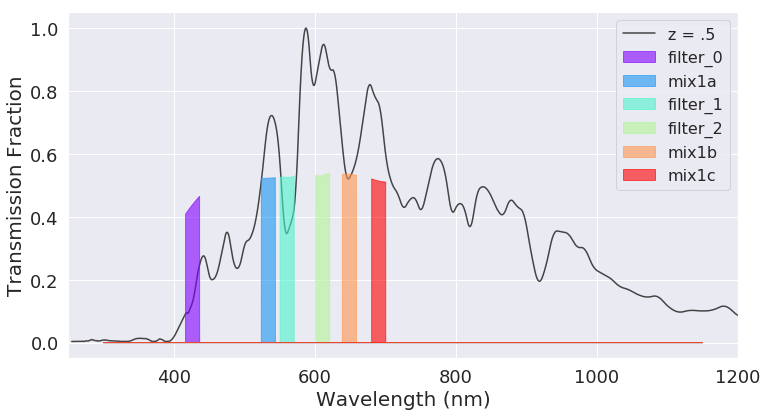

In [67]:
fig = plt.figure(figsize=(12, 14))
fig.add_subplot(2,1,1)
sig_plotmix1b.plot_filters(fig=fig)
ax = plt.gca()
ax.lines[0].set_alpha(0.8)
plt.xlabel('Wavelength (nm)', size=20)
plt.ylabel('Transmission Fraction', size=20)
plt.legend((['z = .5'] + sig_plotmix1b.filter_dict.keys()), 
           loc=0, fontsize=16)
plt.xticks(size=18)
plt.yticks(size=18)
#plt.savefig('Example_2.pdf')



In [68]:
#exp time = 15, 20nm, real prior
sig_plotmix1b.filter_dict.keys()

['filter_0', 'mix1a', 'filter_1', 'filter_2', 'mix1b', 'mix1c']

In [69]:
f0 = sig_plotmix1b.filter_dict['filter_0']
f0.writeThroughput('Filter_Saves/total_mix1d.dat')

In [70]:
f1 = sig_plotmix1b.filter_dict['filter_1']
f1.writeThroughput('Filter_Saves/total_mix1e.dat')

In [71]:
f2 = sig_plotmix1b.filter_dict['filter_2']
f2.writeThroughput('Filter_Saves/total_mix1f.dat')

In [72]:
saved_frozen_dict1b = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['mix1a','mix1b','mix1c','mix1d','mix1e','mix1f'], bandpassRoot = 'total_')

In [73]:
saved_frozen_dict1b.keys()

['mix1a', 'mix1b', 'mix1c', 'mix1d', 'mix1e', 'mix1f']

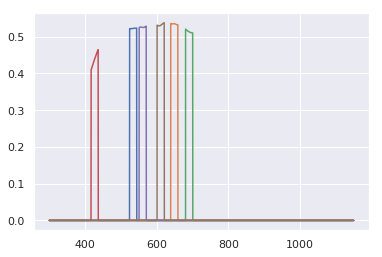

In [74]:
plt.plot(saved_frozen_dict1b['mix1a'].wavelen,saved_frozen_dict1b['mix1a'].sb)
plt.plot(saved_frozen_dict1b['mix1b'].wavelen,saved_frozen_dict1b['mix1b'].sb)
plt.plot(saved_frozen_dict1b['mix1c'].wavelen,saved_frozen_dict1b['mix1c'].sb)
plt.plot(saved_frozen_dict1b['mix1d'].wavelen,saved_frozen_dict1b['mix1d'].sb)
plt.plot(saved_frozen_dict1b['mix1e'].wavelen,saved_frozen_dict1b['mix1e'].sb)
plt.plot(saved_frozen_dict1b['mix1f'].wavelen,saved_frozen_dict1b['mix1f'].sb)

In [75]:
#no frozen, 3 filters, real prior, 20nm
sig_example = siggi([salt2_spec_list_train[0],salt2_spec_list_train[1],salt2_spec_list_train[2],salt2_spec_list_train[3],
                     salt2_spec_list_train[4],salt2_spec_list_train[5],salt2_spec_list_train[6],s11_spec_list_train[0],
                     s11_spec_list_train[1],s11_spec_list_train[2],s11_spec_list_train[3],s11_spec_list_train[4],
                     s11_spec_list_train[5],s11_spec_list_train[6]], [1.0], real_prior_low_z, calib_filter=bp_dict['r'],
                    z_min=0.00, z_max=.76, z_steps=21, phot_params=new_phot_params, calib_mag=23.7)

In [76]:
test_rand_state = np.random.RandomState(2325)    
num_filters = 3
set_ratio = 1
res_mix1c = sig_example.optimize_filters(num_filters=num_filters,
                                     filt_min=300., filt_max=1100.,
                                     set_ratio=set_ratio,
                                     system_wavelen_max=1200.,
                                     n_opt_points=50,
                                     optimizer_verbosity=5,
                                     procs=1, acq_func_kwargs_dict={'kappa':1.8},
                                     frozen_filt_dict=saved_frozen_dict1b, 
                                     frozen_filt_eff_wavelen=[best_ptmix1[0]+10,best_ptmix1[1]+10,best_ptmix1[2]+10,
                                     best_ptmix1b[0]+10,best_ptmix1b[1]+10,best_ptmix1b[2]+10],
                                     #starting_points = [[mid-50., mid+50., mid_2-50., mid_2+50.] for mid, mid_2 in point_list],
                                     starting_points = None,
                                     rand_state = test_rand_state,
                                     set_width = 20)


[[300.0, 690.0, 1080.0], [566.6666666666667, 823.3333333333334, 1080.0], [833.3333333333334, 956.6666666666667, 1080.0], [376.86514058556975, 501.91118594174134, 541.8013970009033], [418.40966345926034, 554.881055009717, 1018.3848730498541], [317.3853499502618, 472.1803977483952, 623.7248782788874], [476.5379008142483, 546.4069561954537, 664.12296761259], [534.2570740349437, 591.8741853766697, 749.6026837305512], [571.6284587949724, 988.0922628225737, 1047.035466964916], [333.71939669208973, 585.2142296109222, 811.267751567073]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  9.8min finished


-0.736992755375538 10
[1109.9999999992633, 338.3999999999651, 309.9999999999909] [[1100.0, 1100.0, 1120.0, 1120.0], [328.3493630735297, 328.3493630735297, 348.3493630735297, 348.3493630735297], [300.0, 300.0, 320.0, 320.0]]
1
[407.9999999999018, 309.9999999999909, 309.9999999999909] [[397.9829480316953, 397.9829480316953, 417.9829480316953, 417.9829480316953], [300.0, 300.0, 320.0, 320.0], [300.0, 300.0, 320.0, 320.0]]
2
[309.9999999999909, 1109.9999999992633, 493.2999999998242] [[300.0, 300.0, 320.0, 320.0], [1100.0, 1100.0, 1120.0, 1120.0], [483.20014181741965, 483.20014181741965, 503.20014181741965, 503.20014181741965]]
3
4
[1109.9999999992633, 1109.9999999992633, 309.9999999999909] [[1100.0, 1100.0, 1120.0, 1120.0], [1100.0, 1100.0, 1120.0, 1120.0], [300.0, 300.0, 320.0, 320.0]]
5
[644.4999999996867, 939.0999999994187, 1015.4999999993493] [[634.4050062141716, 634.4050062141716, 654.4050062141716, 654.4050062141716], [929.0327299154245, 929.0327299154245, 949.0327299154245, 949.0327

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.5s finished


-0.736992755375538 11
[392.9999999999154, 534.0999999997871, 309.9999999999909] [[382.91461749790994, 382.91461749790994, 402.91461749790994, 402.91461749790994], [524.054140083204, 524.054140083204, 544.054140083204, 544.054140083204], [300.0, 300.0, 320.0, 320.0]]
1
[1109.9999999992633, 1072.7999999992971, 1081.3999999992893] [[1100.0, 1100.0, 1120.0, 1120.0], [1062.722627589848, 1062.722627589848, 1082.722627589848, 1082.722627589848], [1071.3188004350511, 1071.3188004350511, 1091.3188004350511, 1091.3188004350511]]
2
[394.29999999991423, 444.39999999986867, 568.7999999997555] [[384.2312741352854, 384.2312741352854, 404.2312741352854, 404.2312741352854], [434.32862483876573, 434.32862483876573, 454.32862483876573, 454.32862483876573], [558.7937778701626, 558.7937778701626, 578.7937778701626, 578.7937778701626]]
3
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.1s finished


-0.7859075341879098 12
[399.99999999990905, 387.3999999999205, 585.7999999997401] [[389.98501147557005, 389.98501147557005, 409.98501147557005, 409.98501147557005], [377.34516454236285, 377.34516454236285, 397.34516454236285, 397.34516454236285], [575.7679237382544, 575.7679237382544, 595.7679237382544, 595.7679237382544]]
1
[401.29999999990787, 527.3999999997932, 561.7999999997619] [[391.26281724046106, 391.26281724046106, 411.26281724046106, 411.26281724046106], [517.3081211905387, 517.3081211905387, 537.3081211905387, 537.3081211905387], [551.7443707555507, 551.7443707555507, 571.7443707555507, 571.7443707555507]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.6s finished


-0.7859075341879098 13
[548.3999999997741, 330.29999999997244, 567.199999999757] [[538.3601643828727, 538.3601643828727, 558.3601643828727, 558.3601643828727], [320.27542623298064, 320.27542623298064, 340.27542623298064, 340.27542623298064], [557.1449296645999, 557.1449296645999, 577.1449296645999, 577.1449296645999]]
1
[384.9999999999227, 526.9999999997935, 567.4999999997567] [[374.91799769051505, 374.91799769051505, 394.91799769051505, 394.91799769051505], [516.9736963995351, 516.9736963995351, 536.9736963995351, 536.9736963995351], [557.4025601595056, 557.4025601595056, 577.4025601595056, 577.4025601595056]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.0s finished


-0.7859075341879098 14
1
[402.7999999999065, 406.8999999999028, 569.0999999997553] [[392.79337515928427, 392.79337515928427, 412.79337515928427, 412.79337515928427], [396.84607138091457, 396.84607138091457, 416.84607138091457, 416.84607138091457], [559.0170603075036, 559.0170603075036, 579.0170603075036, 579.0170603075036]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.7s finished


-0.7859075341879098 15
[367.89999999993825, 433.7999999998783, 571.6999999997529] [[357.8481625985489, 357.8481625985489, 377.8481625985489, 377.8481625985489], [423.75612931567514, 423.75612931567514, 443.75612931567514, 443.75612931567514], [561.6934515375874, 561.6934515375874, 581.6934515375874, 581.6934515375874]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.9s finished


-0.7859075341879098 16
[386.1999999999216, 478.59999999983756, 569.7999999997546] [[376.1772902713765, 376.1772902713765, 396.1772902713765, 396.1772902713765], [468.5950490039008, 468.5950490039008, 488.5950490039008, 488.5950490039008], [559.7080061945226, 559.7080061945226, 579.7080061945226, 579.7080061945226]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished


-0.7859075341879098 17
[534.0999999997871, 777.3999999995658, 1035.3999999993312] [[524.0554432588922, 524.0554432588922, 544.0554432588922, 544.0554432588922], [767.3409959599459, 767.3409959599459, 787.3409959599459, 787.3409959599459], [1025.3017204209075, 1025.3017204209075, 1045.3017204209075, 1045.3017204209075]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.3s finished


-0.7859075341879098 18
[695.2999999996405, 1015.1999999993495, 1082.9999999992879] [[685.2670754112628, 685.2670754112628, 705.2670754112628, 705.2670754112628], [1005.1448355247692, 1005.1448355247692, 1025.1448355247692, 1025.1448355247692], [1072.959593964439, 1072.959593964439, 1092.959593964439, 1092.959593964439]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished


-0.7859075341879098 19
[354.49999999995043, 521.1999999997988, 572.699999999752] [[344.40538304535266, 344.40538304535266, 364.40538304535266, 364.40538304535266], [511.1163249988481, 511.1163249988481, 531.1163249988481, 531.1163249988481], [562.6919607909663, 562.6919607909663, 582.6919607909663, 582.6919607909663]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished


-0.7859075341879098 20
[491.3999999998259, 717.5999999996202, 1023.9999999993415] [[481.3803852905843, 481.3803852905843, 501.3803852905843, 501.3803852905843], [707.5911642131872, 707.5911642131872, 727.5911642131872, 727.5911642131872], [1013.9561651185667, 1013.9561651185667, 1033.9561651185668, 1033.9561651185668]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.8s finished


-0.7859075341879098 21
[447.9999999998654, 716.3999999996213, 1074.099999999296] [[437.9057956496582, 437.9057956496582, 457.9057956496582, 457.9057956496582], [706.3159309636605, 706.3159309636605, 726.3159309636605, 726.3159309636605], [1064.087157214422, 1064.087157214422, 1084.087157214422, 1084.087157214422]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.0s finished


-0.7859075341879098 22
[503.89999999981455, 842.9999999995061, 1081.5999999992891] [[493.8174811522247, 493.8174811522247, 513.8174811522247, 513.8174811522247], [832.9529006132653, 832.9529006132653, 852.9529006132653, 852.9529006132653], [1071.583012986601, 1071.583012986601, 1091.583012986601, 1091.583012986601]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished


-0.7859075341879098 23
[452.89999999986094, 556.8999999997664, 665.7999999996673] [[442.8245391546271, 442.8245391546271, 462.8245391546271, 462.8245391546271], [546.8497220265439, 546.8497220265439, 566.8497220265439, 566.8497220265439], [655.7507951836187, 655.7507951836187, 675.7507951836187, 675.7507951836187]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.7s finished


-0.7859075341879098 24
[378.99999999992815, 881.8999999994708, 1052.6999999993154] [[368.9967690185609, 368.9967690185609, 388.9967690185609, 388.9967690185609], [871.8053266230712, 871.8053266230712, 891.8053266230712, 891.8053266230712], [1042.6948979863557, 1042.6948979863557, 1062.6948979863557, 1062.6948979863557]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.2s finished


-0.7859075341879098 25
[633.4999999996967, 596.4999999997303, 658.0999999996743] [[623.4809548510297, 623.4809548510297, 643.4809548510297, 643.4809548510297], [586.4307666081886, 586.4307666081886, 606.4307666081886, 606.4307666081886], [648.086703304899, 648.086703304899, 668.086703304899, 668.086703304899]]
1
[366.4999999999395, 613.4999999997149, 673.5999999996602] [[356.4047874266422, 356.4047874266422, 376.4047874266422, 376.4047874266422], [603.4136065090697, 603.4136065090697, 623.4136065090697, 623.4136065090697], [663.534638273248, 663.534638273248, 683.534638273248, 683.534638273248]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.6s finished


-0.7859075341879098 26
[431.2999999998806, 489.8999999998273, 670.8999999996627] [[421.2023458328129, 421.2023458328129, 441.2023458328129, 441.2023458328129], [479.8950031162588, 479.8950031162588, 499.8950031162588, 499.8950031162588], [660.804619067351, 660.804619067351, 680.804619067351, 680.804619067351]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.1s finished


-0.7859075341879098 27
[394.59999999991396, 1032.7999999993335, 665.099999999668] [[384.59693893103565, 384.59693893103565, 404.59693893103565, 404.59693893103565], [1022.7020152170569, 1022.7020152170569, 1042.702015217057, 1042.702015217057], [655.0061874555904, 655.0061874555904, 675.0061874555904, 675.0061874555904]]
1
[443.8999999998691, 310.8999999999901, 671.4999999996621] [[433.82032464920087, 433.82032464920087, 453.82032464920087, 453.82032464920087], [300.80665260295405, 300.80665260295405, 320.80665260295405, 320.80665260295405], [661.406913725604, 661.406913725604, 681.406913725604, 681.406913725604]]
2
[394.7999999999138, 537.6999999997838, 694.3999999996413] [[384.79413620900823, 384.79413620900823, 404.79413620900823, 404.79413620900823], [527.6756446887755, 527.6756446887755, 547.6756446887755, 547.6756446887755], [684.3874299774269, 684.3874299774269, 704.3874299774269, 704.3874299774269]]
3
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished


-0.7859075341879098 28
[454.999999999859, 600.5999999997266, 851.7999999994981] [[444.9140139092168, 444.9140139092168, 464.9140139092168, 464.9140139092168], [590.5795552586867, 590.5795552586867, 610.5795552586867, 610.5795552586867], [841.7876837263964, 841.7876837263964, 861.7876837263964, 861.7876837263964]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished


-0.7859075341879098 29
[390.19999999991796, 539.7999999997819, 690.3999999996449] [[380.11994592925646, 380.11994592925646, 400.11994592925646, 400.11994592925646], [529.7790062130201, 529.7790062130201, 549.7790062130201, 549.7790062130201], [680.3275792331121, 680.3275792331121, 700.3275792331121, 700.3275792331121]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished


-0.7859075341879098 30
1
[598.5999999997284, 608.999999999719, 779.1999999995642] [[588.598749291898, 588.598749291898, 608.598749291898, 608.598749291898], [598.9813504681583, 598.9813504681583, 618.9813504681583, 618.9813504681583], [769.1544701121907, 769.1544701121907, 789.1544701121907, 789.1544701121907]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.4s finished


-0.7859075341879098 31
[403.19999999990614, 413.4999999998968, 564.7999999997592] [[393.1258811374772, 393.1258811374772, 413.1258811374772, 413.1258811374772], [403.4334949314274, 403.4334949314274, 423.4334949314274, 423.4334949314274], [554.7514466472429, 554.7514466472429, 574.7514466472429, 574.7514466472429]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished


-0.7859075341879098 32
[366.2999999999397, 548.5999999997739, 667.9999999996653] [[356.20257263140127, 356.20257263140127, 376.20257263140127, 376.20257263140127], [538.5091015088702, 538.5091015088702, 558.5091015088702, 558.5091015088702], [657.9922784539508, 657.9922784539508, 677.9922784539508, 677.9922784539508]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished


-0.7859075341879098 33
[474.09999999984166, 601.9999999997253, 802.8999999995426] [[464.0046409888088, 464.0046409888088, 484.0046409888088, 484.0046409888088], [591.9324016691193, 591.9324016691193, 611.9324016691193, 611.9324016691193], [792.8873227171181, 792.8873227171181, 812.8873227171181, 812.8873227171181]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.0s finished


-0.7859075341879098 34
[492.0999999998253, 494.1999999998234, 666.099999999667] [[482.063945907351, 482.063945907351, 502.063945907351, 502.063945907351], [484.17808601206, 484.17808601206, 504.17808601206, 504.17808601206], [656.0106968573264, 656.0106968573264, 676.0106968573264, 676.0106968573264]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.9s finished


-0.7859075341879098 35
[377.2999999999297, 476.4999999998395, 522.6999999997975] [[367.21105978198744, 367.21105978198744, 387.21105978198744, 387.21105978198744], [466.4686150736418, 466.4686150736418, 486.4686150736418, 486.4686150736418], [512.6253240079019, 512.6253240079019, 532.6253240079019, 532.6253240079019]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.2s finished


-0.7859075341879098 36
[1091.3999999992802, 581.2999999997442, 974.5999999993865] [[1081.317628645727, 1081.317628645727, 1101.317628645727, 1101.317628645727], [571.2762389412592, 571.2762389412592, 591.2762389412592, 591.2762389412592], [964.5755951381371, 964.5755951381371, 984.5755951381371, 984.5755951381371]]
1
[489.1999999998279, 453.6999999998602, 553.4999999997694] [[479.192405258478, 479.192405258478, 499.192405258478, 499.192405258478], [443.6009292008356, 443.6009292008356, 463.6009292008356, 463.6009292008356], [543.4591160084218, 543.4591160084218, 563.4591160084218, 563.4591160084218]]
2
[429.69999999988204, 953.7999999994054, 670.6999999996629] [[419.62860207231296, 419.62860207231296, 439.62860207231296, 439.62860207231296], [943.7997361036655, 943.7997361036655, 963.7997361036655, 963.7997361036655], [660.6434184059272, 660.6434184059272, 680.6434184059272, 680.6434184059272]]
3
[376.4999999999304, 436.6999999998757, 568.0999999997562] [[366.449660897517, 366.44966089

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.2s finished


-0.7859075341879098 37
[309.9999999999909, 594.699999999732, 541.0999999997807] [[300.0, 300.0, 320.0, 320.0], [584.6511910536273, 584.6511910536273, 604.6511910536273, 604.6511910536273], [531.0839738726677, 531.0839738726677, 551.0839738726677, 551.0839738726677]]
1
[389.89999999991824, 495.3999999998223, 647.6999999996838] [[379.81874273009817, 379.81874273009817, 399.81874273009817, 399.81874273009817], [485.3752970482461, 485.3752970482461, 505.3752970482461, 505.3752970482461], [637.6637412250268, 637.6637412250268, 657.6637412250268, 657.6637412250268]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.2s finished


-0.7859075341879098 38
[459.59999999985484, 564.999999999759, 805.4999999995403] [[449.5172332531911, 449.5172332531911, 469.5172332531911, 469.5172332531911], [554.9310301757637, 554.9310301757637, 574.9310301757637, 574.9310301757637], [795.4072416794836, 795.4072416794836, 815.4072416794836, 815.4072416794836]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.3s finished


-0.7859075341879098 39
[493.89999999982365, 584.3999999997413, 886.2999999994668] [[483.8300261922918, 483.8300261922918, 503.8300261922918, 503.8300261922918], [574.3524032665871, 574.3524032665871, 594.3524032665871, 594.3524032665871], [876.2001455940161, 876.2001455940161, 896.2001455940161, 896.2001455940161]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.2s finished


-0.7859075341879098 40
1
[377.89999999992915, 479.49999999983675, 589.9999999997362] [[367.8349922826162, 367.8349922826162, 387.8349922826162, 387.8349922826162], [469.40432684133566, 469.40432684133566, 489.40432684133566, 489.40432684133566], [579.9744711802902, 579.9744711802902, 599.9744711802902, 599.9744711802902]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.3s finished


-0.7859075341879098 41
[416.69999999989386, 744.7999999995955, 992.5999999993701] [[406.6179717434945, 406.6179717434945, 426.6179717434945, 426.6179717434945], [734.7708069074862, 734.7708069074862, 754.7708069074862, 754.7708069074862], [982.5520193421331, 982.5520193421331, 1002.5520193421331, 1002.5520193421331]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.6s finished


-0.7859075341879098 42
[447.0999999998662, 555.4999999997676, 743.3999999995967] [[437.04617803344934, 437.04617803344934, 457.04617803344934, 457.04617803344934], [545.4483594722465, 545.4483594722465, 565.4483594722465, 565.4483594722465], [733.3553942970774, 733.3553942970774, 753.3553942970774, 753.3553942970774]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.0s finished


-0.7859075341879098 43
[379.4999999999277, 481.9999999998345, 597.3999999997295] [[369.4547484769631, 369.4547484769631, 389.4547484769631, 389.4547484769631], [471.99992177793814, 471.99992177793814, 491.99992177793814, 491.99992177793814], [587.3335210601231, 587.3335210601231, 607.3335210601231, 607.3335210601231]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.8s finished


-0.7859075341879098 44
[449.59999999986394, 553.2999999997696, 740.0999999995997] [[439.51661421065927, 439.51661421065927, 459.51661421065927, 459.51661421065927], [543.2289345366473, 543.2289345366473, 563.2289345366473, 563.2289345366473], [730.0308525192062, 730.0308525192062, 750.0308525192062, 750.0308525192062]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.2s finished


-0.7859075341879098 45
[379.89999999992733, 445.19999999986794, 574.2999999997505] [[369.8940857445227, 369.8940857445227, 389.8940857445227, 389.8940857445227], [435.1920979812604, 435.1920979812604, 455.1920979812604, 455.1920979812604], [564.2063342145398, 564.2063342145398, 584.2063342145398, 584.2063342145398]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.7s finished


-0.7912871174066072 46
[438.3999999998741, 636.499999999694, 911.6999999994437] [[428.3846653828522, 428.3846653828522, 448.3846653828522, 448.3846653828522], [626.4554473980118, 626.4554473980118, 646.4554473980118, 646.4554473980118], [901.6628575259465, 901.6628575259465, 921.6628575259465, 921.6628575259465]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.8s finished


-0.7912871174066072 47
[374.9999999999318, 474.19999999984157, 580.6999999997447] [[364.93721832983033, 364.93721832983033, 384.93721832983033, 384.93721832983033], [464.15036625350456, 464.15036625350456, 484.15036625350456, 484.15036625350456], [570.665437772895, 570.665437772895, 590.665437772895, 590.665437772895]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.0s finished


-0.7912871174066072 48
[472.99999999984266, 540.8999999997809, 759.0999999995825] [[462.93231391059203, 462.93231391059203, 482.93231391059203, 482.93231391059203], [530.874839709456, 530.874839709456, 550.874839709456, 550.874839709456], [749.0316715872386, 749.0316715872386, 769.0316715872386, 769.0316715872386]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.9s finished


-0.7912871174066072 49
[386.79999999992106, 789.5999999995547, 1076.199999999294] [[376.7238525625348, 376.7238525625348, 396.7238525625348, 396.7238525625348], [779.5311443425574, 779.5311443425574, 799.5311443425574, 799.5311443425574], [1066.1811678987178, 1066.1811678987178, 1086.1811678987178, 1086.1811678987178]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.9s finished


-0.7912871174066072 50


In [77]:
min_idxmix1c = np.argmin(res_mix1c.yi[:-3])
best_ptmix1c = res_mix1c.Xi[min_idxmix1c]
print(best_ptmix1c, res_mix1c.yi[min_idxmix1c])

[369.8940857445227, 435.1920979812604, 564.2063342145398] -0.7912871174066072


In [78]:
sig_plotmix1c = plotting([cpsalt2_spec_50], best_ptmix1c, 'trap',
                    frozen_filt_dict=saved_frozen_dict1b, 
                    frozen_filt_eff_wavelen=[best_ptmix1[0]+10,best_ptmix1[1]+10,best_ptmix1[2]+10,
                    best_ptmix1b[0]+10,best_ptmix1b[1]+10,best_ptmix1b[2]+10],
                    set_ratio = 1, sed_mags=23.7, set_width = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

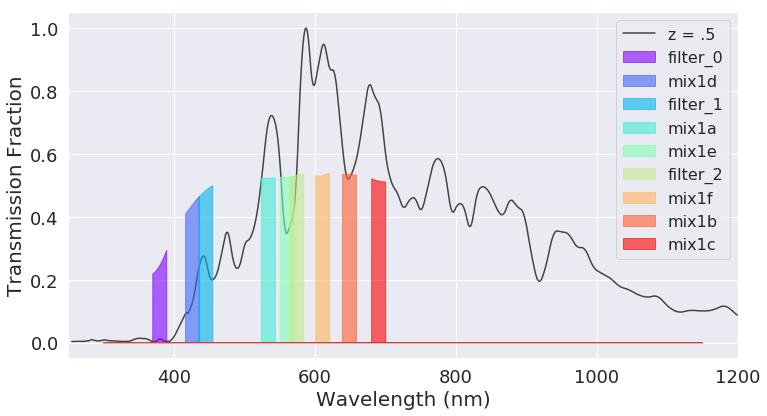

In [79]:
fig = plt.figure(figsize=(12, 14))
fig.add_subplot(2,1,1)
sig_plotmix1c.plot_filters(fig=fig)
ax = plt.gca()
ax.lines[0].set_alpha(0.8)
plt.xlabel('Wavelength (nm)', size=20)
plt.ylabel('Transmission Fraction', size=20)
plt.legend((['z = .5'] + sig_plotmix1c.filter_dict.keys()), 
           loc=0, fontsize=16)
plt.xticks(size=18)
plt.yticks(size=18)
#plt.savefig('Example_2.pdf')



In [80]:
#exp time = 15, 20nm, real prior
sig_plotmix1c.filter_dict.keys()

['filter_0',
 'mix1d',
 'filter_1',
 'mix1a',
 'mix1e',
 'filter_2',
 'mix1f',
 'mix1b',
 'mix1c']

In [81]:
f0 = sig_plotmix1c.filter_dict['filter_0']
f0.writeThroughput('Filter_Saves/total_mix1g.dat')

In [82]:
f1 = sig_plotmix1c.filter_dict['filter_1']
f1.writeThroughput('Filter_Saves/total_mix1h.dat')

In [83]:
f2 = sig_plotmix1c.filter_dict['filter_2']
f2.writeThroughput('Filter_Saves/total_mix1i.dat')

In [84]:
saved_frozen_dict1c = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['mix1a','mix1b','mix1c','mix1d','mix1e','mix1f','mix1g','mix1h','mix1i'], bandpassRoot = 'total_')

In [85]:
saved_frozen_dict1c.keys()

['mix1a',
 'mix1b',
 'mix1c',
 'mix1d',
 'mix1e',
 'mix1f',
 'mix1g',
 'mix1h',
 'mix1i']

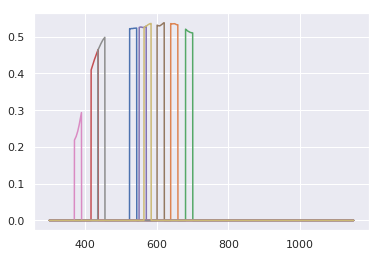

In [86]:
plt.plot(saved_frozen_dict1c['mix1a'].wavelen,saved_frozen_dict1c['mix1a'].sb)
plt.plot(saved_frozen_dict1c['mix1b'].wavelen,saved_frozen_dict1c['mix1b'].sb)
plt.plot(saved_frozen_dict1c['mix1c'].wavelen,saved_frozen_dict1c['mix1c'].sb)
plt.plot(saved_frozen_dict1c['mix1d'].wavelen,saved_frozen_dict1c['mix1d'].sb)
plt.plot(saved_frozen_dict1c['mix1e'].wavelen,saved_frozen_dict1c['mix1e'].sb)
plt.plot(saved_frozen_dict1c['mix1f'].wavelen,saved_frozen_dict1c['mix1f'].sb)
plt.plot(saved_frozen_dict1c['mix1g'].wavelen,saved_frozen_dict1c['mix1g'].sb)
plt.plot(saved_frozen_dict1c['mix1h'].wavelen,saved_frozen_dict1c['mix1h'].sb)
plt.plot(saved_frozen_dict1c['mix1i'].wavelen,saved_frozen_dict1c['mix1i'].sb)

In [87]:
saved_frozen_dict1cwithLSST = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['mix1a','mix1b','mix1c','mix1d','mix1e','mix1f','mix1g','mix1h','mix1i','u','g','r','i','z','y'], bandpassRoot = 'total_')

In [88]:
saved_frozen_dict1cwithLSST.keys()

['mix1a',
 'mix1b',
 'mix1c',
 'mix1d',
 'mix1e',
 'mix1f',
 'mix1g',
 'mix1h',
 'mix1i',
 'u',
 'g',
 'r',
 'i',
 'z',
 'y']

In [89]:
#plt.plot(saved_frozen_dict1cwithLSST['u'].wavelen,saved_frozen_dict1c['u'].sb)

In [90]:
#no frozen, 3 filters, real prior, 20nm
sig_example = siggi([salt2_spec_list_train[0],salt2_spec_list_train[1],salt2_spec_list_train[2],salt2_spec_list_train[3],
                     salt2_spec_list_train[4],salt2_spec_list_train[5],salt2_spec_list_train[6],s11_spec_list_train[0],
                     s11_spec_list_train[1],s11_spec_list_train[2],s11_spec_list_train[3],s11_spec_list_train[4],
                     s11_spec_list_train[5],s11_spec_list_train[6]], [1.0], real_prior_low_z, calib_filter=bp_dict['r'],
                    z_min=0.00, z_max=.76, z_steps=21, phot_params=new_phot_params, calib_mag=23.7)

In [91]:
test_rand_state = np.random.RandomState(2325)    
num_filters = 3
set_ratio = 1
res_mix1d = sig_example.optimize_filters(num_filters=num_filters,
                                     filt_min=300., filt_max=1100.,
                                     set_ratio=set_ratio,
                                     system_wavelen_max=1200.,
                                     n_opt_points=50,
                                     optimizer_verbosity=5,
                                     procs=1, acq_func_kwargs_dict={'kappa':1.8},
                                     frozen_filt_dict=saved_frozen_dict1c, 
                                     frozen_filt_eff_wavelen=[best_ptmix1[0]+10,best_ptmix1[1]+10,best_ptmix1[2]+10,
                                     best_ptmix1b[0]+10,best_ptmix1b[1]+10,best_ptmix1b[2]+10,
                                     best_ptmix1c[0]+10,best_ptmix1c[1]+10,best_ptmix1c[2]+10],
                                     #starting_points = [[mid-50., mid+50., mid_2-50., mid_2+50.] for mid, mid_2 in point_list],
                                     starting_points = None,
                                     rand_state = test_rand_state,
                                     set_width = 20)


[[300.0, 690.0, 1080.0], [566.6666666666667, 823.3333333333334, 1080.0], [833.3333333333334, 956.6666666666667, 1080.0], [376.86514058556975, 501.91118594174134, 541.8013970009033], [418.40966345926034, 554.881055009717, 1018.3848730498541], [317.3853499502618, 472.1803977483952, 623.7248782788874], [476.5379008142483, 546.4069561954537, 664.12296761259], [534.2570740349437, 591.8741853766697, 749.6026837305512], [571.6284587949724, 988.0922628225737, 1047.035466964916], [333.71939669208973, 585.2142296109222, 811.267751567073]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 12.8min finished


-0.8929877361896734 10
[651.0999999996807, 309.9999999999909, 309.9999999999909] [[641.0907253697234, 641.0907253697234, 661.0907253697234, 661.0907253697234], [300.0, 300.0, 320.0, 320.0], [300.0, 300.0, 320.0, 320.0]]
1
[1109.9999999992633, 882.8999999994699, 309.9999999999909] [[1100.0, 1100.0, 1120.0, 1120.0], [872.8414297082472, 872.8414297082472, 892.8414297082472, 892.8414297082472], [300.0, 300.0, 320.0, 320.0]]
2
[1109.9999999992633, 1109.9999999992633, 927.0999999994297] [[1100.0, 1100.0, 1120.0, 1120.0], [1100.0, 1100.0, 1120.0, 1120.0], [917.0428731804665, 917.0428731804665, 937.0428731804665, 937.0428731804665]]
3
[880.6999999994719, 1048.799999999319, 1048.4999999993192] [[870.6858772869646, 870.6858772869646, 890.6858772869646, 890.6858772869646], [1038.7700651351502, 1038.7700651351502, 1058.7700651351502, 1058.7700651351502], [1038.4405189331837, 1038.4405189331837, 1058.4405189331837, 1058.4405189331837]]
4
[787.1999999995569, 688.5999999996466, 873.0999999994788] [[7

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.8929877361896734 11
[338.7999999999647, 544.8999999997773, 850.4999999994993] [[328.74537361637204, 328.74537361637204, 348.74537361637204, 348.74537361637204], [534.8931051714026, 534.8931051714026, 554.8931051714026, 554.8931051714026], [840.439994000842, 840.439994000842, 860.439994000842, 860.439994000842]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.8929877361896734 12
[332.39999999997053, 506.19999999981246, 602.4999999997249] [[322.3269357030387, 322.3269357030387, 342.3269357030387, 342.3269357030387], [496.17425576478627, 496.17425576478627, 516.1742557647863, 516.1742557647863], [592.4505472537348, 592.4505472537348, 612.4505472537348, 612.4505472537348]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.8929877361896734 13
[540.5999999997812, 376.3999999999305, 1079.8999999992907] [[530.5137316497413, 530.5137316497413, 550.5137316497413, 550.5137316497413], [366.3505113875357, 366.3505113875357, 386.3505113875357, 386.3505113875357], [1069.8471889521704, 1069.8471889521704, 1089.8471889521704, 1089.8471889521704]]
1
2
[573.799999999751, 872.6999999994791, 863.999999999487] [[563.7777371009397, 563.7777371009397, 583.7777371009397, 583.7777371009397], [862.6234008917811, 862.6234008917811, 882.6234008917811, 882.6234008917811], [853.9382497378161, 853.9382497378161, 873.9382497378161, 873.9382497378161]]
3
[358.7999999999465, 533.2999999997878, 557.7999999997655] [[348.76624345009, 348.76624345009, 368.76624345009, 368.76624345009], [523.2703474636255, 523.2703474636255, 543.2703474636255, 543.2703474636255], [547.7049196496002, 547.7049196496002, 567.7049196496002, 567.7049196496002]]
4
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.8929877361896734 14
[609.999999999718, 532.0999999997889, 588.3999999997377] [[599.9546578079078, 599.9546578079078, 619.9546578079078, 619.9546578079078], [522.0611132600131, 522.0611132600131, 542.0611132600131, 542.0611132600131], [578.3541805484915, 578.3541805484915, 598.3541805484915, 598.3541805484915]]
1
[389.1999999999189, 559.6999999997638, 502.89999999981546] [[379.1219354192553, 379.1219354192553, 399.1219354192553, 399.1219354192553], [549.6440903313246, 549.6440903313246, 569.6440903313246, 569.6440903313246], [492.80737683073403, 492.80737683073403, 512.807376830734, 512.807376830734]]
2
[309.9999999999909, 1059.9999999993088, 513.7999999998056] [[300.0, 300.0, 320.0, 320.0], [1049.9673167844185, 1049.9673167844185, 1069.9673167844185, 1069.9673167844185], [503.75940099271367, 503.7594009927136, 523.7594009927136, 523.7594009927136]]
3
[309.9999999999909, 444.09999999986894, 903.4999999994511] [[300.0, 300.0, 320.0, 320.0], [434.0479887875204, 434.0479887875204, 454.0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.8929877361896734 15
[309.9999999999909, 397.99999999991087, 1077.399999999293] [[300.0, 300.0, 320.0, 320.0], [387.99874713157755, 387.99874713157755, 407.99874713157755, 407.99874713157755], [1067.3825253853527, 1067.3825253853527, 1087.3825253853527, 1087.3825253853527]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.8929877361896734 16
1
[340.09999999996353, 420.99999999988995, 630.0999999996998] [[330.02049101176596, 330.02049101176596, 350.02049101176596, 350.02049101176596], [410.90925684901583, 410.90925684901583, 430.90925684901583, 430.90925684901583], [620.0383522654215, 620.0383522654215, 640.0383522654215, 640.0383522654215]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.8929877361896734 17
[1038.0999999993287, 1039.899999999327, 630.0999999996998] [[1028.0730389145021, 1028.0730389145021, 1048.0730389145021, 1048.0730389145021], [1029.885833368171, 1029.885833368171, 1049.885833368171, 1049.885833368171], [620.0197879922314, 620.0197879922314, 640.0197879922314, 640.0197879922314]]
1
[309.9999999999909, 612.3999999997159, 384.9999999999227] [[300.0, 300.0, 320.0, 320.0], [602.3826682476619, 602.3826682476619, 622.3826682476619, 622.3826682476619], [374.95175701379935, 374.95175701379935, 394.95175701379935, 394.95175701379935]]
2
[309.9999999999909, 435.9999999998763, 754.2999999995868] [[300.0, 300.0, 320.0, 320.0], [425.9198131376923, 425.9198131376923, 445.9198131376923, 445.9198131376923], [744.2982640979972, 744.2982640979972, 764.2982640979972, 764.2982640979972]]
3
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.8929877361896734 18
[309.9999999999909, 460.89999999985366, 748.4999999995921] [[300.0, 300.0, 320.0, 320.0], [450.82881865915004, 450.82881865915004, 470.82881865915004, 470.82881865915004], [738.4411509913684, 738.4411509913684, 758.4411509913684, 758.4411509913684]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.8929877361896734 19
[309.9999999999909, 458.39999999985594, 747.3999999995931] [[300.0, 300.0, 320.0, 320.0], [448.38763899052253, 448.38763899052253, 468.38763899052253, 468.38763899052253], [737.3763020566563, 737.3763020566563, 757.3763020566563, 757.3763020566563]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.8929877361896734 20
[310.0999999999908, 1075.7999999992944, 1072.899999999297] [[300.0000870087422, 300.0000870087422, 320.0000870087422, 320.0000870087422], [1065.7305330271174, 1065.7305330271174, 1085.7305330271174, 1085.7305330271174], [1062.8657410031983, 1062.8657410031983, 1082.8657410031983, 1082.8657410031983]]
1
[603.9999999997235, 864.8999999994862, 1072.4999999992974] [[593.9644585860442, 593.9644585860442, 613.9644585860442, 613.9644585860442], [854.8457150874837, 854.8457150874837, 874.8457150874837, 874.8457150874837], [1062.4584012352852, 1062.4584012352852, 1082.4584012352852, 1082.4584012352852]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.8929877361896734 21
[577.4999999997476, 836.1999999995123, 1084.3999999992866] [[567.4423772402586, 567.4423772402586, 587.4423772402586, 587.4423772402586], [826.12238582585, 826.12238582585, 846.12238582585, 846.12238582585], [1074.3025152813957, 1074.3025152813957, 1094.3025152813957, 1094.3025152813957]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.8929877361896734 22
[461.1999999998534, 494.4999999998231, 629.8999999997] [[451.1154477058094, 451.1154477058094, 471.1154477058094, 471.1154477058094], [484.4284839585192, 484.4284839585192, 504.4284839585192, 504.4284839585192], [619.8296676519439, 619.8296676519439, 639.8296676519439, 639.8296676519439]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9184080787602031 23
[611.7999999997164, 951.1999999994077, 1058.2999999993103] [[601.722365768711, 601.722365768711, 621.722365768711, 621.722365768711], [941.1983381464779, 941.1983381464779, 961.1983381464779, 961.1983381464779], [1048.2038143838076, 1048.2038143838076, 1068.2038143838076, 1068.2038143838076]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9184080787602031 24
[475.89999999984, 487.19999999982974, 750.8999999995899] [[465.8435549242531, 465.8435549242531, 485.8435549242531, 485.8435549242531], [477.1588509373013, 477.1588509373013, 497.1588509373013, 497.1588509373013], [740.8430037145058, 740.8430037145058, 760.8430037145058, 760.8430037145058]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9184080787602031 25
[519.8999999998, 537.7999999997837, 755.199999999586] [[509.8711798448891, 509.8711798448892, 529.8711798448892, 529.8711798448892], [527.7634033444267, 527.7634033444267, 547.7634033444267, 547.7634033444267], [745.1814636066482, 745.1814636066482, 765.1814636066482, 765.1814636066482]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9184080787602031 26
[476.999999999839, 509.19999999980973, 652.0999999996798] [[466.93575868941684, 466.93575868941684, 486.93575868941684, 486.93575868941684], [499.1686952325935, 499.1686952325935, 519.1686952325936, 519.1686952325936], [642.0702669741214, 642.0702669741214, 662.0702669741214, 662.0702669741214]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9184080787602031 27
[444.9999999998681, 500.69999999981746, 634.199999999696] [[434.94854467449863, 434.94854467449863, 454.94854467449863, 454.94854467449863], [490.67843655721356, 490.67843655721356, 510.67843655721356, 510.67843655721356], [624.1179617316918, 624.1179617316918, 644.1179617316918, 644.1179617316918]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9184080787602031 28
[432.19999999987976, 487.19999999982974, 626.499999999703] [[422.1822893729576, 422.1822893729576, 442.1822893729576, 442.1822893729576], [477.1585313099183, 477.1585313099183, 497.1585313099183, 497.1585313099183], [616.4441629670109, 616.4441629670109, 636.4441629670109, 636.4441629670109]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9184080787602031 29
[425.8999999998855, 474.19999999984157, 748.4999999995921] [[415.8280743540551, 415.8280743540551, 435.8280743540551, 435.8280743540551], [464.10079506308585, 464.10079506308585, 484.10079506308585, 484.10079506308585], [738.4336475370551, 738.4336475370551, 758.4336475370551, 758.4336475370551]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9184080787602031 30
[309.9999999999909, 492.59999999982483, 1054.9999999993133] [[300.0, 300.0, 320.0, 320.0], [482.56174192183147, 482.56174192183147, 502.56174192183147, 502.56174192183147], [1044.9278295220329, 1044.9278295220329, 1064.9278295220329, 1064.9278295220329]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9184080787602031 31
[499.39999999981865, 510.39999999980864, 660.1999999996724] [[489.3575271729982, 489.3575271729982, 509.3575271729982, 509.3575271729982], [500.304848094645, 500.304848094645, 520.304848094645, 520.304848094645], [650.1898035590566, 650.1898035590566, 670.1898035590566, 670.1898035590566]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9184080787602031 32
[457.59999999985666, 504.89999999981364, 745.7999999995945] [[447.59642924218036, 447.59642924218036, 467.59642924218036, 467.59642924218036], [494.85721404996633, 494.85721404996633, 514.8572140499664, 514.8572140499664], [735.7328333699816, 735.7328333699816, 755.7328333699816, 755.7328333699816]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9534609887951144 33
[466.09999999984893, 521.9999999997981, 741.999999999598] [[456.00618587124166, 456.00618587124166, 476.00618587124166, 476.00618587124166], [511.95221031773457, 511.9522103177346, 531.9522103177346, 531.9522103177346], [731.9295704326591, 731.9295704326591, 751.9295704326591, 751.9295704326591]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9534609887951144 34
[309.9999999999909, 382.7999999999247, 830.5999999995174] [[300.0, 300.0, 320.0, 320.0], [372.76520061293206, 372.76520061293206, 392.76520061293206, 392.76520061293206], [820.5243310768851, 820.5243310768851, 840.5243310768851, 840.5243310768851]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9534609887951144 35
[450.89999999986276, 533.3999999997877, 746.7999999995936] [[440.8847041980748, 440.8847041980748, 460.8847041980748, 460.8847041980748], [523.3732272395364, 523.3732272395364, 543.3732272395364, 543.3732272395364], [736.7568716758256, 736.7568716758256, 756.7568716758256, 756.7568716758256]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9534609887951144 36
[597.1999999997297, 557.0999999997662, 754.3999999995867] [[587.1202191542554, 587.1202191542554, 607.1202191542554, 607.1202191542554], [547.0926585782629, 547.0926585782629, 567.0926585782629, 567.0926585782629], [744.384385175616, 744.384385175616, 764.384385175616, 764.384385175616]]
1
[516.0999999998035, 584.4999999997412, 759.2999999995823] [[506.00705535975953, 506.00705535975953, 526.0070553597595, 526.0070553597595], [574.4672898663111, 574.4672898663111, 594.4672898663111, 594.4672898663111], [749.2515764178077, 749.2515764178077, 769.2515764178077, 769.2515764178077]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9534609887951144 37
[451.4999999998622, 473.699999999842, 743.6999999995965] [[441.43878113650203, 441.43878113650203, 461.43878113650203, 461.43878113650203], [463.60130457816854, 463.60130457816854, 483.60130457816854, 483.60130457816854], [733.6948123173449, 733.6948123173449, 753.6948123173449, 753.6948123173449]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9534609887951144 38
[399.3999999999096, 438.1999999998743, 562.3999999997613] [[389.38086733878913, 389.38086733878913, 409.38086733878913, 409.38086733878913], [428.1432702317888, 428.1432702317888, 448.1432702317888, 448.1432702317888], [552.3707737764792, 552.3707737764792, 572.3707737764792, 572.3707737764792]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9534609887951144 39
[466.29999999984875, 635.8999999996945, 660.4999999996721] [[456.26058459761634, 456.26058459761634, 476.26058459761634, 476.26058459761634], [625.8266512154671, 625.8266512154671, 645.8266512154671, 645.8266512154671], [650.413627743772, 650.413627743772, 670.413627743772, 670.413627743772]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9534609887951144 40
[453.3999999998605, 447.1999999998661, 665.8999999996672] [[443.34967239693964, 443.34967239693964, 463.34967239693964, 463.34967239693964], [437.1032660430163, 437.1032660430163, 457.1032660430163, 457.1032660430163], [655.8110210425061, 655.8110210425061, 675.8110210425061, 675.8110210425061]]
1
[487.999999999829, 533.7999999997874, 649.7999999996819] [[477.98789819892625, 477.98789819892625, 497.98789819892625, 497.98789819892625], [523.7449017844684, 523.7449017844684, 543.7449017844684, 543.7449017844684], [639.793946154142, 639.793946154142, 659.793946154142, 659.793946154142]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9534609887951144 41
[499.39999999981865, 587.6999999997383, 671.9999999996617] [[489.3745582733374, 489.3745582733374, 509.3745582733374, 509.3745582733374], [577.6706018133362, 577.6706018133362, 597.6706018133362, 597.6706018133362], [661.9106862741799, 661.9106862741799, 681.9106862741799, 681.9106862741799]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9534609887951144 42
[358.299999999947, 491.59999999982574, 618.6999999997101] [[348.29762438359603, 348.29762438359603, 368.29762438359603, 368.29762438359603], [481.50283284673253, 481.50283284673253, 501.50283284673253, 501.50283284673253], [608.6887186782507, 608.6887186782507, 628.6887186782507, 628.6887186782507]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9534609887951144 43
[441.3999999998714, 503.1999999998152, 742.1999999995978] [[431.39054346271587, 431.39054346271587, 451.39054346271587, 451.39054346271587], [493.14893976084966, 493.14893976084966, 513.1489397608497, 513.1489397608497], [732.1876375318504, 732.1876375318504, 752.1876375318504, 752.1876375318504]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9534609887951144 44
[322.1999999999798, 507.4999999998113, 832.5999999995156] [[312.1970402508556, 312.1970402508556, 332.1970402508556, 332.1970402508556], [497.4905554191713, 497.4905554191713, 517.4905554191713, 517.4905554191713], [822.5704709259941, 822.5704709259941, 842.5704709259941, 842.5704709259941]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9534609887951144 45
[406.39999999990323, 530.9999999997899, 563.7999999997601] [[396.33910848096815, 396.33910848096815, 416.33910848096815, 416.33910848096815], [520.9348366384631, 520.9348366384631, 540.9348366384631, 540.9348366384631], [553.757080431141, 553.757080431141, 573.757080431141, 573.757080431141]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9534609887951144 46
[309.9999999999909, 365.3999999999405, 869.7999999994818] [[300.0, 300.0, 320.0, 320.0], [355.31822064008577, 355.31822064008577, 375.31822064008577, 375.31822064008577], [859.752873858982, 859.752873858982, 879.752873858982, 879.752873858982]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9534609887951144 47
[309.9999999999909, 352.29999999995243, 1060.4999999993083] [[300.0, 300.0, 320.0, 320.0], [342.2387329192831, 342.2387329192831, 362.2387329192831, 362.2387329192831], [1050.479925935067, 1050.479925935067, 1070.479925935067, 1070.479925935067]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9534609887951144 48
1
[838.8999999995099, 978.4999999993829, 1082.899999999288] [[828.8824599368212, 828.8824599368212, 848.8824599368212, 848.8824599368212], [968.45469806999, 968.45469806999, 988.45469806999, 988.45469806999], [1072.8900079365144, 1072.8900079365144, 1092.8900079365144, 1092.8900079365144]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9534609887951144 49
[485.799999999831, 634.8999999996954, 692.1999999996433] [[475.7848293067057, 475.7848293067057, 495.7848293067057, 495.7848293067057], [624.8941820705429, 624.8941820705429, 644.8941820705429, 644.8941820705429], [682.1876355944571, 682.1876355944571, 702.1876355944571, 702.1876355944571]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


-0.9534609887951144 50


In [92]:
min_idxmix1d = np.argmin(res_mix1d.yi[:-3])
best_ptmix1d = res_mix1d.Xi[min_idxmix1d]
print(best_ptmix1d, res_mix1d.yi[min_idxmix1d])

[447.59642924218036, 494.85721404996633, 735.7328333699816] -0.9534609887951144


In [514]:
sig_plotmix1d = plotting([cpsalt2_spec_10, cpsalt2_spec_50, cpsalt2_spec_76], best_ptmix1d, 'trap',
                    frozen_filt_dict=saved_frozen_dict1c, 
                    frozen_filt_eff_wavelen=[best_ptmix1[0]+10,best_ptmix1[1]+10,best_ptmix1[2]+10,
                    best_ptmix1b[0]+10,best_ptmix1b[1]+10,best_ptmix1b[2]+10,
                    best_ptmix1c[0]+10,best_ptmix1c[1]+10,best_ptmix1c[2]+10],
                    set_ratio = 1, sed_mags=23.7, set_width = 20)

Text(0.5, 1.0, 'Optimized Comb Filter')

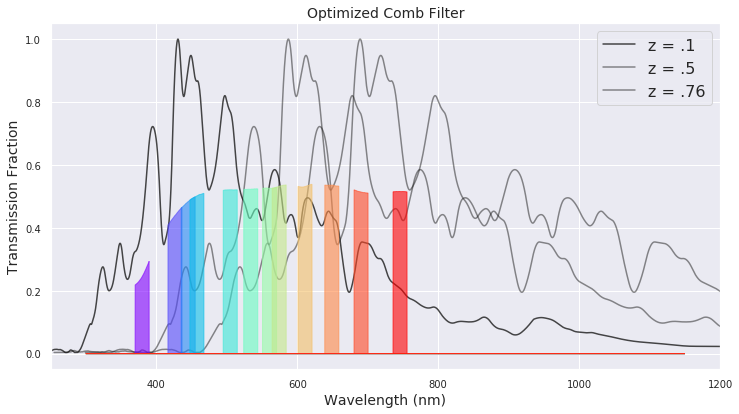

In [515]:
fig = plt.figure(figsize=(12, 14))
fig.add_subplot(2,1,1)
sig_plotmix1d.plot_filters(fig=fig)
ax = plt.gca()
ax.lines[0].set_alpha(0.8)
plt.xlabel('Wavelength (nm)', size=14)
plt.ylabel('Transmission Fraction', size=14)
plt.legend((['z = .1','z = .5','z = .76']),# + sig_plotmix1d.filter_dict.keys()), 
           loc=0, fontsize=16)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Optimized Comb Filter',size=14)
#plt.savefig('Example_2.pdf')



In [516]:
sig_plotmix1d = plotting([cpsalt2_spec_50,], best_ptmix1d, 'trap',
                    frozen_filt_dict=saved_frozen_dict1c, 
                    frozen_filt_eff_wavelen=[best_ptmix1[0]+10,best_ptmix1[1]+10,best_ptmix1[2]+10,
                    best_ptmix1b[0]+10,best_ptmix1b[1]+10,best_ptmix1b[2]+10,
                    best_ptmix1c[0]+10,best_ptmix1c[1]+10,best_ptmix1c[2]+10],
                    set_ratio = 1, sed_mags=23.7, set_width = 20)

Text(0.5, 1.0, 'Optimized Comb Filter')

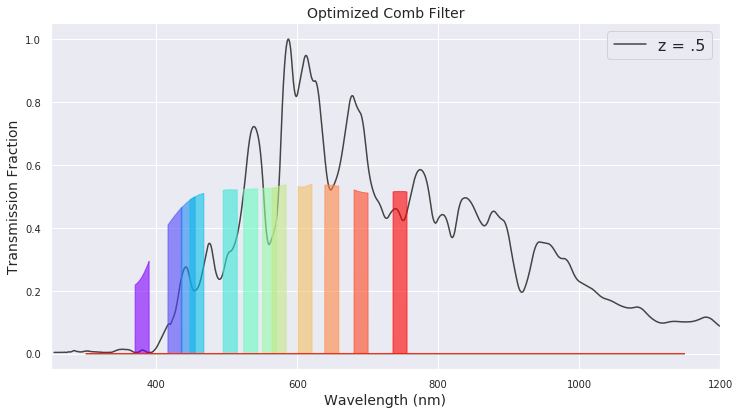

In [517]:
fig = plt.figure(figsize=(12, 14))
fig.add_subplot(2,1,1)
sig_plotmix1d.plot_filters(fig=fig)
ax = plt.gca()
ax.lines[0].set_alpha(0.8)
plt.xlabel('Wavelength (nm)', size=14)
plt.ylabel('Transmission Fraction', size=14)
plt.legend((['z = .5']),# + sig_plotmix1d.filter_dict.keys()), 
           loc=0, fontsize=16)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Optimized Comb Filter',size=14)
#plt.savefig('Example_2.pdf')



In [95]:
allbestpt = best_ptmix1 + best_ptmix1b + best_ptmix1c + best_ptmix1d 
print(allbestpt)

[523.9102873150298, 638.9164728428343, 680.4373218066492, 416.44402652406677, 550.6721659271045, 600.9287942147614, 369.8940857445227, 435.1920979812604, 564.2063342145398, 447.59642924218036, 494.85721404996633, 735.7328333699816]


In [519]:
sig_plotmix1d = plotting([cpsalt2_spec_50], allbestpt, 'trap',
                    frozen_filt_dict=frozen_dict_all, 
                    frozen_filt_eff_wavelen=[365., 477., 622., 765., 870., 1015],
                    set_ratio = 1, sed_mags=23.7, set_width = 20)

Text(0.5, 1.0, 'Optimized Comb Filter with the Six LSST Filters')

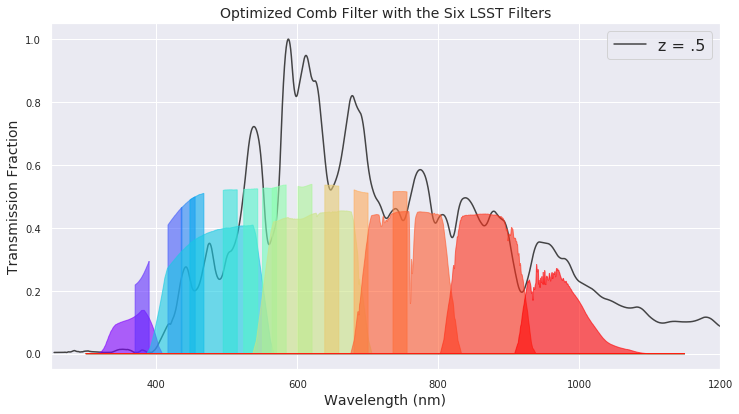

In [522]:
fig = plt.figure(figsize=(12, 14))
fig.add_subplot(2,1,1)
sig_plotmix1d.plot_filters(fig=fig)
ax = plt.gca()
ax.lines[0].set_alpha(0.8)
plt.xlabel('Wavelength (nm)', size=14)
plt.ylabel('Transmission Fraction', size=14)
plt.legend((['z = .5']), 
           loc=0, fontsize=16)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Optimized Comb Filter with the Six LSST Filters',size=14)
#plt.savefig('Example_2.pdf')



In [98]:
#exp time = 15, 20nm, real prior
sig_plotmix1d.filter_dict.keys()

['u',
 'filter_6',
 'filter_3',
 'filter_7',
 'filter_9',
 'g',
 'filter_10',
 'filter_0',
 'filter_4',
 'filter_8',
 'filter_5',
 'r',
 'filter_1',
 'filter_2',
 'filter_11',
 'i',
 'z',
 'y']

In [99]:
f0 = sig_plotmix1d.filter_dict['filter_0']
f0.writeThroughput('Filter_Saves/total_mix1j.dat')

In [100]:
f1 = sig_plotmix1d.filter_dict['filter_1']
f1.writeThroughput('Filter_Saves/total_mix1k.dat')

In [101]:
f2 = sig_plotmix1d.filter_dict['filter_2']
f2.writeThroughput('Filter_Saves/total_mix1l.dat')

In [102]:
saved_frozen_dict1d = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['mix1a','mix1b','mix1c','mix1d','mix1e','mix1f','mix1g','mix1h','mix1i','mix1j','mix1k','mix1l'], bandpassRoot = 'total_')

In [103]:
saved_frozen_dict1d.keys()

['mix1a',
 'mix1b',
 'mix1c',
 'mix1d',
 'mix1e',
 'mix1f',
 'mix1g',
 'mix1h',
 'mix1i',
 'mix1j',
 'mix1k',
 'mix1l']

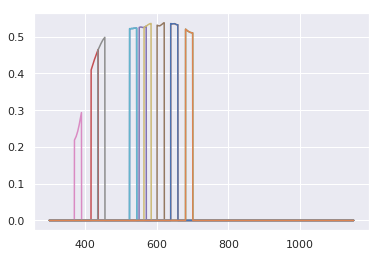

In [104]:
plt.plot(saved_frozen_dict1d['mix1a'].wavelen,saved_frozen_dict1d['mix1a'].sb)
plt.plot(saved_frozen_dict1d['mix1b'].wavelen,saved_frozen_dict1d['mix1b'].sb)
plt.plot(saved_frozen_dict1d['mix1c'].wavelen,saved_frozen_dict1d['mix1c'].sb)
plt.plot(saved_frozen_dict1d['mix1d'].wavelen,saved_frozen_dict1d['mix1d'].sb)
plt.plot(saved_frozen_dict1d['mix1e'].wavelen,saved_frozen_dict1d['mix1e'].sb)
plt.plot(saved_frozen_dict1d['mix1f'].wavelen,saved_frozen_dict1d['mix1f'].sb)
plt.plot(saved_frozen_dict1d['mix1g'].wavelen,saved_frozen_dict1d['mix1g'].sb)
plt.plot(saved_frozen_dict1d['mix1h'].wavelen,saved_frozen_dict1d['mix1h'].sb)
plt.plot(saved_frozen_dict1d['mix1i'].wavelen,saved_frozen_dict1d['mix1i'].sb)
plt.plot(saved_frozen_dict1d['mix1j'].wavelen,saved_frozen_dict1d['mix1j'].sb)
plt.plot(saved_frozen_dict1d['mix1k'].wavelen,saved_frozen_dict1d['mix1k'].sb)
plt.plot(saved_frozen_dict1d['mix1l'].wavelen,saved_frozen_dict1d['mix1l'].sb)

# Treat As Comb, Test with LSST, Diff Times

In [105]:
total_comb_filt_mix1 = filterFactory.create_filter_object('comb')

In [106]:
total_comb_filt_mix1.set_wavelen_grid()

In [107]:
set_ratio = 1.0
set_width = 20
comb_dict1 = total_comb_filt_mix1.create_filter_dict_from_shape_params(set_ratio, set_width,
                    [best_ptmix1[0]-10,best_ptmix1[1]-10,best_ptmix1[2]-10,
                    best_ptmix1b[0]-10,best_ptmix1b[1]-10,best_ptmix1b[2]-10,
                    best_ptmix1c[0]-10,best_ptmix1c[1]-10,best_ptmix1c[2]-10,
                    best_ptmix1d[0]-10,best_ptmix1d[1]-10,best_ptmix1d[2]-10])
comb_dict1._bandpassDict['filter_1'] = comb_dict1['filter_0']
del(comb_dict1._bandpassDict['filter_0'])

Text(0, 0.5, 'Transmission Fraction')

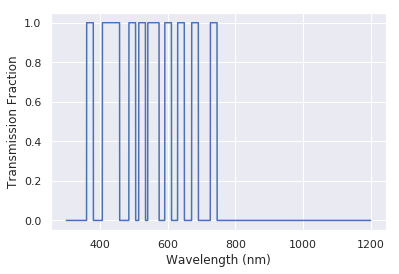

In [108]:
plt.plot(comb_dict1['filter_1'].wavelen,
         comb_dict1['filter_1'].sb)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission Fraction')

In [109]:
hardware_filt_dict, total_filt_dict = BandpassDict.addSystemBandpass(comb_dict1)

In [110]:
total_comb_filt_mix1.find_filt_centers(total_filt_dict)

[557.7000000000586]

In [111]:
filts = np.array([best_ptmix1[0],best_ptmix1[1],best_ptmix1[2],
                    best_ptmix1b[0],best_ptmix1b[1],best_ptmix1b[2],
                    best_ptmix1c[0],best_ptmix1c[1],best_ptmix1c[2],
                    best_ptmix1d[0],best_ptmix1d[1],best_ptmix1d[2]])
print(filts)
pickle.dump(filts, open( "filts_mix_nofroz", "wb" ) )

[523.91028732 638.91647284 680.43732181 416.44402652 550.67216593
 600.92879421 369.89408574 435.19209798 564.20633421 447.59642924
 494.85721405 735.73283337]


In [112]:
#f0 = sig_plotmix1d.filter_dict['filter_0']
fcomb = comb_dict1['filter_1']
fcomb.writeThroughput('Filter_Saves/total_comb_filt_mix1.dat')

In [113]:
comb_mix_withLSST_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['comb_filt_mix1','u','g','r','i','z','y'], bandpassRoot = 'total_')

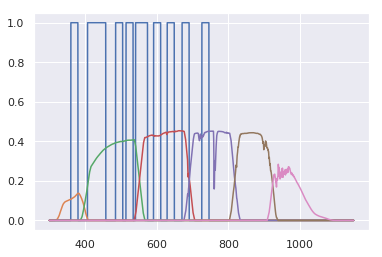

In [114]:
plt.plot(comb_mix_withLSST_dict['comb_filt_mix1'].wavelen,comb_mix_withLSST_dict['comb_filt_mix1'].sb)
plt.plot(comb_mix_withLSST_dict['u'].wavelen,comb_mix_withLSST_dict['u'].sb)
plt.plot(comb_mix_withLSST_dict['g'].wavelen,comb_mix_withLSST_dict['g'].sb)
plt.plot(comb_mix_withLSST_dict['r'].wavelen,comb_mix_withLSST_dict['r'].sb)
plt.plot(comb_mix_withLSST_dict['i'].wavelen,comb_mix_withLSST_dict['i'].sb)
plt.plot(comb_mix_withLSST_dict['z'].wavelen,comb_mix_withLSST_dict['z'].sb)
plt.plot(comb_mix_withLSST_dict['y'].wavelen,comb_mix_withLSST_dict['y'].sb)

In [115]:
#initialize rand state with def seed
#rand_state_1ea = np.random.RandomState(2005)
#rand_state_1eb = np.random.RandomState(2008)
rand_state_1e = np.random.RandomState(2021)

In [116]:
#Uniformly generate 10,000 redshifts
#z_list1ea = rand_state_1ea.uniform(0,.76,size=5000)
#z_list1eb = rand_state_1eb.uniform(0,.76,size=5000)
#z_list1e = rand_state_1e.uniform(0,.76,size=10000)
#Uniformly generate 10,000 calibration magnitudes
#mag_list1ea = rand_state_1ea.uniform(18,24,size=5000)
#mag_list1eb = rand_state_1eb.uniform(18,24,size=5000)
mag_list1e = rand_state_1e.uniform(18,24,size=10000)

In [117]:
#initialize rand state with def seed
#rand_state_1ea = np.random.RandomState(2005)
#rand_state_1eb = np.random.RandomState(2008)
rand_state_2e = np.random.RandomState(2022)

In [118]:
z_min = 0.
z_max = 0.76
z_steps = 100
z_vals = np.linspace(z_min, z_max, z_steps)
z_probs = real_prior_low_z(z_vals)

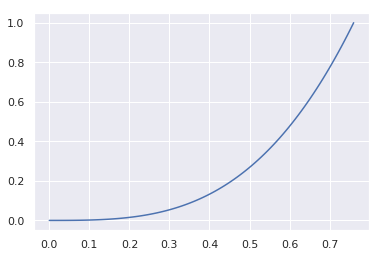

In [119]:
# Create Cumulative Distribution Function (CDF)
y_probs = z_probs/np.sum(z_probs)
y_cum = y_probs.cumsum()

# Plot
plt.plot(z_vals, y_cum)

In [120]:
n_pts = 10000
rand_state = np.random.RandomState(42)


if len(z_vals) >= 10:
    fy = interpolate.splrep(y_cum, z_vals)
else:
    fy = interpolate.splrep(y_cum, z_vals,
                            k=1)
samp_y = rand_state.uniform(size=n_pts)
fy_samp = interpolate.splev(samp_y, fy)

Text(0.5, 1.0, 'Distribution of Redshifts for Simulated Supernovae')

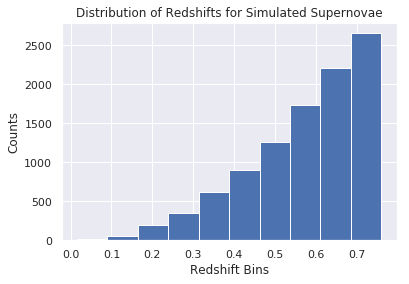

In [502]:
plt.hist(fy_samp)
plt.xlabel('Redshift Bins')
plt.ylabel('Counts')
plt.title('Distribution of Redshifts for Simulated Supernovae')

In [122]:
z_list1e = (fy_samp)
print(z_list1e)

[0.55589089 0.74780181 0.68788714 ... 0.74679193 0.56648021 0.46763624]


In [123]:
#z_list1e = np.append(z_list1ea, z_list1eb)
#random.shuffle(z_list1e)
#len(z_list1e)

#mag_list1e = np.append(mag_list1ea, mag_list1eb)
#random.shuffle(mag_list1e)
#len(mag_list1e)

In [124]:
def Normalize_SED(calib_filter, calib_mag, z, SED):
    copySED = deepcopy(SED)
    copySED.redshiftSED(z)
    fluxnorm = copySED.calcFluxNorm(calib_mag, calib_filter)
    copySED.multiplyFluxNorm(fluxnorm)
    return copySED


In [125]:
#salt2, -18 days
SED_list1ea = []
for z, mag in zip(z_list1e[0:312], mag_list1e[0:312]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,salt2_spec_list_test[0])
    SED_list1ea.append(copySED)
    

In [126]:
#salt2, -16 days
SED_list1eb = []
for z, mag in zip(z_list1e[312:625], mag_list1e[312:625]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,salt2_spec_list_test[1])
    SED_list1eb.append(copySED)
    

In [127]:
#salt2, -14 days
SED_list1ec = []
for z, mag in zip(z_list1e[625:937], mag_list1e[625:937]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,salt2_spec_list_test[2])
    SED_list1ec.append(copySED)
    

In [128]:
#salt2, -12 days
SED_list1ed = []
for z, mag in zip(z_list1e[937:1250], mag_list1e[937:1250]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,salt2_spec_list_test[3])
    SED_list1ed.append(copySED)
    

In [129]:
#salt2, -8 days
SED_list1ee = []
for z, mag in zip(z_list1e[1250:1562], mag_list1e[1250:1562]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,salt2_spec_list_test[4])
    SED_list1ee.append(copySED)
    

In [130]:
#salt2, -6 days
SED_list1ef = []
for z, mag in zip(z_list1e[1562:1875], mag_list1e[1562:1875]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,salt2_spec_list_test[5])
    SED_list1ef.append(copySED)
    

In [131]:
#salt2, -4 days
SED_list1eg = []
for z, mag in zip(z_list1e[1875:2187], mag_list1e[1875:2187]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,salt2_spec_list_test[6])
    SED_list1eg.append(copySED)
    

In [132]:
#salt2, -2 days
SED_list1eh = []
for z, mag in zip(z_list1e[2187:2500], mag_list1e[2187:2500]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,salt2_spec_list_test[7])
    SED_list1eh.append(copySED)
    

In [133]:
#salt2, 2 days
SED_list1ei = []
for z, mag in zip(z_list1e[2500:2812], mag_list1e[2500:2812]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,salt2_spec_list_test[8])
    SED_list1ei.append(copySED)
    

In [134]:
#salt2, 4 days
SED_list1ej = []
for z, mag in zip(z_list1e[2812:3125], mag_list1e[2812:3125]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,salt2_spec_list_test[9])
    SED_list1ej.append(copySED)
    

In [135]:
#salt2, 6 days
SED_list1ek = []
for z, mag in zip(z_list1e[3125:3437], mag_list1e[3125:3437]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,salt2_spec_list_test[10])
    SED_list1ek.append(copySED)
    

In [136]:
#salt2, 8 days
SED_list1el = []
for z, mag in zip(z_list1e[3437:3750], mag_list1e[3437:3750]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,salt2_spec_list_test[11])
    SED_list1el.append(copySED)
    

In [137]:
#salt2, 12 days
SED_list1em = []
for z, mag in zip(z_list1e[3750:4062], mag_list1e[3750:4062]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,salt2_spec_list_test[12])
    SED_list1em.append(copySED)
    

In [138]:
#salt2, 14 days
SED_list1en = []
for z, mag in zip(z_list1e[4062:4375], mag_list1e[4062:4375]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,salt2_spec_list_test[13])
    SED_list1en.append(copySED)
    

In [139]:
#salt2, 16 days
SED_list1eo = []
for z, mag in zip(z_list1e[4375:4687], mag_list1e[4375:4687]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,salt2_spec_list_test[14])
    SED_list1eo.append(copySED)
    

In [140]:
#salt2, 18 days
SED_list1ep = []
for z, mag in zip(z_list1e[4687:5000], mag_list1e[4687:5000]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,salt2_spec_list_test[15])
    SED_list1ep.append(copySED)
    

In [141]:
len(SED_list1ep)

313

In [142]:
salt_SED_list = SED_list1ea + SED_list1eb + SED_list1ec + SED_list1ed + SED_list1ee + SED_list1ef + SED_list1eg + SED_list1eh + SED_list1ei + SED_list1ej + SED_list1ek + SED_list1el + SED_list1em + SED_list1en + SED_list1eo + SED_list1ep

In [143]:
#s11, -18 days
s11_list1ea = []
for z, mag in zip(z_list1e[5000:5312], mag_list1e[5000:5312]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,s11_spec_list_test[0])
    s11_list1ea.append(copySED)
    

In [144]:
#s11, -16 days
s11_list1eb = []
for z, mag in zip(z_list1e[5312:5625], mag_list1e[5312:5625]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,s11_spec_list_test[1])
    s11_list1eb.append(copySED)
    

In [145]:
#s11, -14 days
s11_list1ec = []
for z, mag in zip(z_list1e[5625:5937], mag_list1e[5625:5937]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,s11_spec_list_test[2])
    s11_list1ec.append(copySED)
    

In [146]:
##### s11, -12 days
s11_list1ed = []
for z, mag in zip(z_list1e[5937:6250], mag_list1e[5937:6250]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,s11_spec_list_test[3])
    s11_list1ed.append(copySED)
    

In [147]:
#s11, -8 days
s11_list1ee = []
for z, mag in zip(z_list1e[6250:6562], mag_list1e[6250:6562]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,s11_spec_list_test[4])
    s11_list1ee.append(copySED)
    

In [148]:
#s11, -6 days
s11_list1ef = []
for z, mag in zip(z_list1e[6562:6875], mag_list1e[6562:6875]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,s11_spec_list_test[5])
    s11_list1ef.append(copySED)
    

In [149]:
#s11, -4 days
s11_list1eg = []
for z, mag in zip(z_list1e[6875:7187], mag_list1e[6875:7187]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,s11_spec_list_test[6])
    s11_list1eg.append(copySED)
    

In [150]:
#s11, -2 days
s11_list1eh = []
for z, mag in zip(z_list1e[7187:7500], mag_list1e[7187:7500]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,s11_spec_list_test[7])
    s11_list1eh.append(copySED)
    

In [151]:
#s11, 2 days
s11_list1ei = []
for z, mag in zip(z_list1e[7500:7812], mag_list1e[7500:7812]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,s11_spec_list_test[8])
    s11_list1ei.append(copySED)
    

In [152]:
#s11, 4 days
s11_list1ej = []
for z, mag in zip(z_list1e[7812:8125], mag_list1e[7812:8125]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,s11_spec_list_test[9])
    s11_list1ej.append(copySED)
    

In [153]:
#s11, 6 days
s11_list1ek = []
for z, mag in zip(z_list1e[8125:8437], mag_list1e[8125:8437]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,s11_spec_list_test[10])
    s11_list1ek.append(copySED)
    

In [154]:
#s11, 8 days
s11_list1el = []
for z, mag in zip(z_list1e[8437:8750], mag_list1e[8437:8750]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,s11_spec_list_test[11])
    s11_list1el.append(copySED)
    

In [155]:
#s11, 12 days
s11_list1em = []
for z, mag in zip(z_list1e[8750:9062], mag_list1e[8750:9062]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,s11_spec_list_test[12])
    s11_list1em.append(copySED)
    

In [156]:
#s11, 14 days
s11_list1en = []
for z, mag in zip(z_list1e[9062:9375], mag_list1e[9062:9375]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,s11_spec_list_test[13])
    s11_list1en.append(copySED)
    

In [157]:
#s11, 16 days
s11_list1eo = []
for z, mag in zip(z_list1e[9375:9687], mag_list1e[9375:9687]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,s11_spec_list_test[14])
    s11_list1eo.append(copySED)
    

In [158]:
#s11, 18 days
s11_list1ep = []
for z, mag in zip(z_list1e[9687:10000], mag_list1e[9687:10000]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,s11_spec_list_test[15])
    s11_list1ep.append(copySED)
    

In [159]:
len(s11_list1ep)

313

In [160]:
s11_SED_list = s11_list1ea + s11_list1eb + s11_list1ec + s11_list1ed + s11_list1ee + s11_list1ef + s11_list1eg + s11_list1eh + s11_list1ei + s11_list1ej + s11_list1ek + s11_list1el + s11_list1em + s11_list1en + s11_list1eo + s11_list1ep

In [161]:
len(s11_SED_list)

5000

In [162]:
tot_SED_list = salt_SED_list + s11_SED_list

In [163]:
len(tot_SED_list)

10000

In [164]:
#pickle.dump(SED_list1e, open( "SED_list_1", "wb" ) )

In [166]:
c = calcIG(comb_mix_withLSST_dict, sig_example.shift_seds, sig_example.z_probs,
                   sig_example.z_vals,
                   sky_mag=sig_example.sky_mag,
                   ref_filter=sig_example.calib_filter,
                   phot_params=sig_example.phot_params)

In [167]:
color_list1e = []
color_error1e = []
snr_list1e = []
for SED in tot_SED_list:
    colors, colorerrors, snr, mags, magerrors, skymags = c.calc_colors([SED],return_all=True)
    color_list1e.append(colors)
    color_error1e.append(colorerrors)
    snr_list1e.append(snr)
    
    

In [168]:
len(snr_list1e[1])

1

In [169]:
len(colors[0])

6

In [170]:
len(color_list1e)

10000

In [171]:
color_error_rand_state1e = np.random.RandomState(2048)

In [172]:
errors_1e = color_error_rand_state1e.normal(scale = color_error1e)

In [173]:
len(errors_1e)

10000

In [174]:
colors_w_noise1e = []
for x,y in zip(color_list1e,errors_1e):
    colors_w_noise1e.append(x+y)

In [175]:
cmnn_thresh_table = np.zeros( 12, dtype='float' )
for i in range(12):
    cmnn_thresh_table[i] = chi2.ppf(.68,i)
cmnn_thresh_table[0] = float(0.0000)

In [176]:
colors_w_noise1e[9999]

array([[-7.19122796,  5.12399963,  1.13091104,  0.21537238,  0.113349  ,
        -0.08560419]])

In [177]:
color_list1ea = color_list1e[0:250]
color_list1eb = color_list1e[312:562]
color_list1ec = color_list1e[625:875]
color_list1ed = color_list1e[937:1187]
color_list1ee = color_list1e[1250:1500]
color_list1ef = color_list1e[1562:1812]
color_list1eg = color_list1e[1875:2125]
color_list1eh = color_list1e[2187:2437]
color_list1ei = color_list1e[2500:2750]
color_list1ej = color_list1e[2812:3062]
color_list1ek = color_list1e[3125:3375]
color_list1el = color_list1e[3437:3687]
color_list1em = color_list1e[3750:4000]
color_list1en = color_list1e[4062:4312]
color_list1eo = color_list1e[4375:4625]
color_list1ep = color_list1e[4687:4937]
color_list1eq = color_list1e[5000:5250]
color_list1er = color_list1e[5312:5562]
color_list1es = color_list1e[5625:5875]
color_list1et = color_list1e[5937:6187]
color_list1eu = color_list1e[6250:6500]
color_list1ev = color_list1e[6562:6812]
color_list1ew = color_list1e[6875:7125]
color_list1ex = color_list1e[7187:7437]
color_list1ey = color_list1e[7500:7750]
color_list1ez = color_list1e[7812:8062]
color_list1eaa = color_list1e[8125:8375]
color_list1eab = color_list1e[8437:8687]
color_list1eac = color_list1e[8750:9000]
color_list1ead = color_list1e[9062:9312]
color_list1eae = color_list1e[9375:9625]
color_list1eaf = color_list1e[9687:9937]

color_list1 = color_list1ea + color_list1eb + color_list1ec + color_list1ed + color_list1ee + color_list1ef + color_list1eg + color_list1eh + color_list1ei + color_list1ej + color_list1ek + color_list1el + color_list1em + color_list1en + color_list1eo + color_list1ep + color_list1eq + color_list1er + color_list1es + color_list1et + color_list1eu + color_list1ev + color_list1ew + color_list1ex + color_list1ey + color_list1ez + color_list1eaa + color_list1eab + color_list1eac + color_list1ead + color_list1eae + color_list1eaf
len(color_list1)

8000

In [178]:
z_list1ea = z_list1e[0:250]
z_list1eb = z_list1e[312:562]
z_list1ec = z_list1e[625:875]
z_list1ed = z_list1e[937:1187]
z_list1ee = z_list1e[1250:1500]
z_list1ef = z_list1e[1562:1812]
z_list1eg = z_list1e[1875:2125]
z_list1eh = z_list1e[2187:2437]
z_list1ei = z_list1e[2500:2750]
z_list1ej = z_list1e[2812:3062]
z_list1ek = z_list1e[3125:3375]
z_list1el = z_list1e[3437:3687]
z_list1em = z_list1e[3750:4000]
z_list1en = z_list1e[4062:4312]
z_list1eo = z_list1e[4375:4625]
z_list1ep = z_list1e[4687:4937]
z_list1eq = z_list1e[5000:5250]
z_list1er = z_list1e[5312:5562]
z_list1es = z_list1e[5625:5875]
z_list1et = z_list1e[5937:6187]
z_list1eu = z_list1e[6250:6500]
z_list1ev = z_list1e[6562:6812]
z_list1ew = z_list1e[6875:7125]
z_list1ex = z_list1e[7187:7437]
z_list1ey = z_list1e[7500:7750]
z_list1ez = z_list1e[7812:8062]
z_list1eaa = z_list1e[8125:8375]
z_list1eab = z_list1e[8437:8687]
z_list1eac = z_list1e[8750:9000]
z_list1ead = z_list1e[9062:9312]
z_list1eae = z_list1e[9375:9625]
z_list1eaf = z_list1e[9687:9937]

z_list1 = list(chain(z_list1ea, z_list1eb, z_list1ec, z_list1ed, z_list1ee, z_list1ef, z_list1eg, z_list1eh, z_list1ei, z_list1ej, z_list1ek, z_list1el, z_list1em, z_list1en, z_list1eo, z_list1ep, z_list1eq, z_list1er, z_list1es, z_list1et, z_list1eu, z_list1ev, z_list1ew, z_list1ex, z_list1ey, z_list1ez, z_list1eaa, z_list1eab, z_list1eac, z_list1ead, z_list1eae, z_list1eaf))
len(z_list1)

8000

In [179]:
rangea = np.arange(250,312,1)
rangeb = np.arange(562,625,1)
rangec = np.arange(875,937,1)
ranged = np.arange(1187,1250,1)
rangee = np.arange(1500,1562,1)
rangef = np.arange(1812,1875,1)
rangeg = np.arange(2125,2187,1)
rangeh = np.arange(2437,2500,1)
rangei = np.arange(2750,2812,1)
rangej = np.arange(3062,3125,1)
rangek = np.arange(3375,3437,1)
rangel = np.arange(3687,3750,1)
rangem = np.arange(4000,4062,1)
rangen = np.arange(4312,4375,1)
rangeo = np.arange(4625,4687,1)
rangep = np.arange(4937,5000,1)
rangeq = np.arange(5250,5312,1)
ranger = np.arange(5562,5625,1)
ranges = np.arange(5875,5937,1)
ranget = np.arange(6187,6250,1)
rangeu = np.arange(6500,6562,1)
rangev = np.arange(6812,6875,1)
rangew = np.arange(7125,7187,1)
rangex = np.arange(7437,7500,1)
rangey = np.arange(7750,7812,1)
rangez = np.arange(8062,8125,1)
rangeaa = np.arange(8375,8437,1)
rangeab = np.arange(8687,8750,1)
rangeac = np.arange(9000,9062,1)
rangead = np.arange(9312,9375,1)
rangeae = np.arange(9625,9687,1)
rangeaf = np.arange(9937,10000,1)

In [180]:
rang1 = list(chain(rangea, rangeb, rangec, ranged, rangee, rangef, rangeg, rangeh, rangei, rangej, rangek, rangel, rangem, rangen, rangeo, rangep, rangeq, ranger, ranges, ranget, rangeu, rangev, rangew, rangex, rangey, rangez, rangeaa, rangeab, rangeac, rangead, rangeae, rangeaf))
len(rang1)

2000

In [181]:
num_colors = len(colors[0])
photoz_list1e = []
photoz_error_list1e = []
Ncm_list1e = []
for i in rang1:
    photoz,photoz_error,Ncm = return_photoz(np.array(colors_w_noise1e[i]), np.array(errors_1e[i]), np.array(color_list1).reshape((8000,num_colors)),
        np.array(z_list1), .68, cmnn_thresh_table, 0, num_colors, 1)
    photoz_list1e.append(photoz)
    photoz_error_list1e.append(photoz_error)
    Ncm_list1e.append(Ncm)

In [182]:
#percent error of photo-z test
err_list = []
for i,y in zip(rang1,np.arange(0,2000,1)):
    diff = z_list1e[i] - photoz_list1e[y]
    err = diff / z_list1e[i]
    err = abs(err)
    err_list.append(err)

In [183]:
max(err_list)

0.6948370158117574

In [184]:
np.mean(err_list)

0.02149473529237543

In [185]:
np.std(err_list)

0.049695593580989586

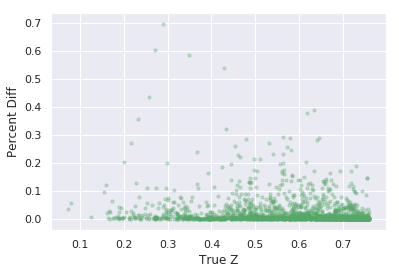

In [186]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    plt.scatter(z_list1e[i],err_list[y],alpha=.3,c='g',s=10)
    plt.xlabel('True Z')
    plt.ylabel('Percent Diff')

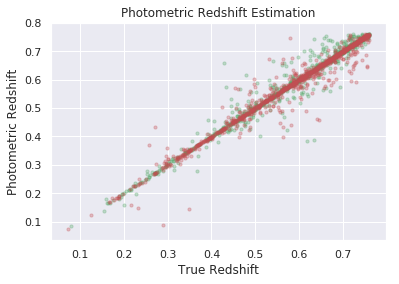

In [524]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if i <= 5000:
        plt.scatter(z_list1e[i],photoz_list1e[y],alpha=.3,c='g',s=10) #type Ia
        plt.xlabel('True Redshift')
        plt.ylabel('Photometric Redshift')
        plt.title('Photometric Redshift Estimation')
    else:
        plt.scatter(z_list1e[i],photoz_list1e[y],alpha=.3,c='r',s=10) #type IIp
        plt.xlabel('True Redshift')
        plt.ylabel('Photometric Redshift')
        plt.title('Photometric Redshift Estimation')

In [188]:
z_list1e_test = []
for i in rang1:
    z_list1e_test.append(z_list1e[i])

In [189]:
len(z_list1e_test)

2000

In [190]:
z_list1e_test_array = np.asarray(z_list1e_test)
photoz_list1e_array = np.asarray(photoz_list1e)

In [191]:
type(photoz_list1e_array)

numpy.ndarray

In [192]:
n_bins = 10
bin_vals, delta_z_binned = pm.calc_bins(photoz_list1e_array, z_list1e_test_array, .76, n_bins, return_bins=True)
bin_centers = np.array(bin_vals[:-1]) + 0.5*(bin_vals[1]-bin_vals[0])

In [326]:
print(pm.photo_z_robust_bias(photoz_list1e_array, z_list1e_test_array, .76, 1))

[1.07040923e-05]


In [327]:
print(pm.photo_z_robust_bias(photoz_listLSST_array, z_list1e_test_array, .76, 1))

[3.5748618e-05]


In [328]:
print(pm.photo_z_robust_stdev(photoz_list1e_array, z_list1e_test_array, .76, 1))

[0.00218691]


In [329]:
print(pm.photo_z_robust_stdev(photoz_listLSST_array, z_list1e_test_array, .76, 1))

[0.00221132]


In [331]:
print(pm.photo_z_outlier_frac(photoz_list1e_array, z_list1e_test_array, .76, 1))

[0.018]


In [332]:
print(pm.photo_z_outlier_frac(photoz_listLSST_array, z_list1e_test_array, .76, 1))

[0.0245]


Text(0.5, 1.0, 'Robust Bias')

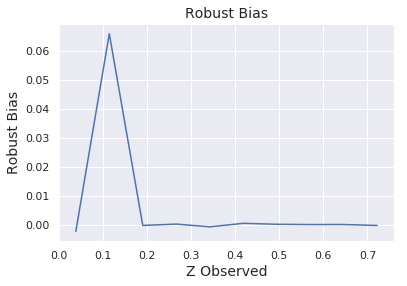

In [197]:
plt.plot(bin_centers, pm.photo_z_robust_bias(photoz_list1e_array, z_list1e_test_array, .76, n_bins))
plt.xlim(0, .76)
plt.xlabel('Z Observed', size=14)
plt.ylabel('Robust Bias', size=14)
plt.title('Robust Bias', size=14)

Text(0.5, 1.0, 'Robust Standard Deviation')

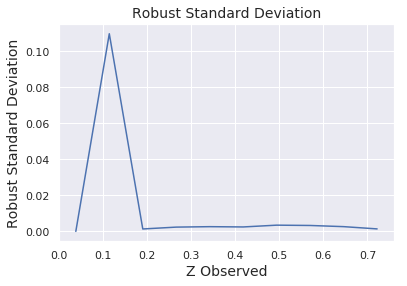

In [198]:
plt.plot(bin_centers, pm.photo_z_robust_stdev(photoz_list1e_array, z_list1e_test_array, .76, n_bins))
plt.xlim(0, .76)
plt.xlabel('Z Observed', size=14)
plt.ylabel('Robust Standard Deviation', size=14)
plt.title('Robust Standard Deviation', size=14)

Text(0.5, 1.0, 'Outlier Frac')

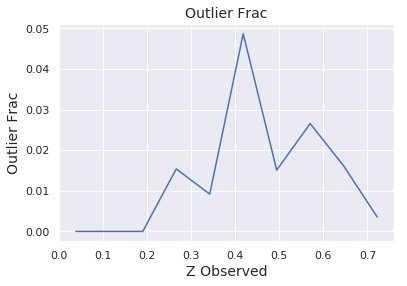

In [199]:
plt.plot(bin_centers, pm.photo_z_outlier_frac(photoz_list1e_array, z_list1e_test_array, .76, n_bins))
plt.xlim(0, .76)
plt.xlabel('Z Observed', size=14)
plt.ylabel('Outlier Frac', size=14)
plt.title('Outlier Frac', size=14)

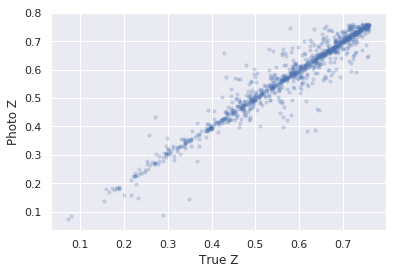

In [200]:
#for i in ranga:#np.arange(0,2000,1):
for i,y in zip(rang1,np.arange(0,2000,1)):
    if mag_list1e[i] > 21:
        plt.scatter(z_list1e[i],photoz_list1e[y],alpha=.2,c='b',s=10)
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')
        

In [201]:
print(snr_list1e[1][0])

[21.224109457479113, 0.008124212050128927, 3.238733170382572, 14.391276612676466, 19.68917904648121, 10.147351408501233, 3.3684277898279387]


In [202]:
snr_comb = []
for i in np.arange(0,10000,1):
    snr_comb.append(snr_list1e[i][0][0])

In [203]:
snr_r = []
for i in np.arange(0,10000,1):
    snr_r.append(snr_list1e[i][0][3])

(array([4468., 1465.,  906.,  650.,  577.,  457.,  429.,  356.,  313.,
         269.,   74.,   29.,    7.,    0.,    0.]),
 array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,
        650, 700, 750]),
 <a list of 15 Patch objects>)

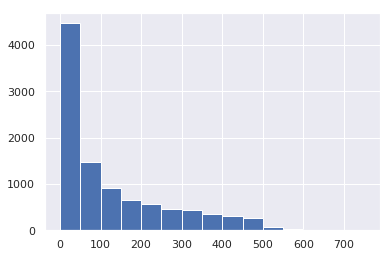

In [204]:
plt.hist(snr_comb,bins=[0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750])

In [205]:
comb_r_diff = np.subtract(snr_comb,snr_r)

Text(0, 0.5, 'Counts')

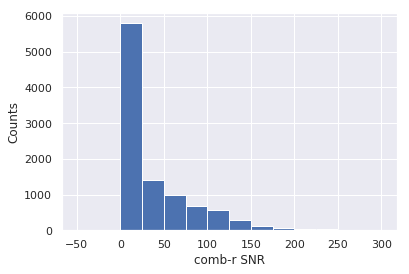

In [206]:
#histogram of comb-r snr differences
bin1 = np.arange(-50,301,25)
plt.hist(comb_r_diff,bins=bin1)
plt.xlabel('comb-r SNR')
plt.ylabel('Counts')

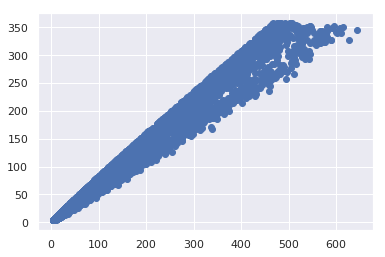

In [207]:
plt.scatter(snr_comb,snr_r)
#make this prettier

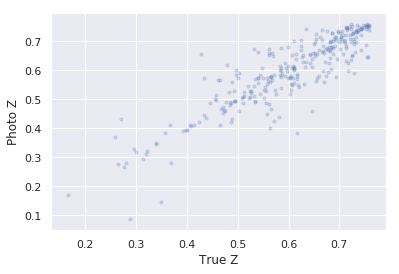

In [208]:
#snr comb <= 10
for i,y in zip(rang1,np.arange(0,2000,1)):
    if snr_comb[i] < 10:
        plt.scatter(z_list1e[i],photoz_list1e[y],alpha=.2,c='b',s=10)
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

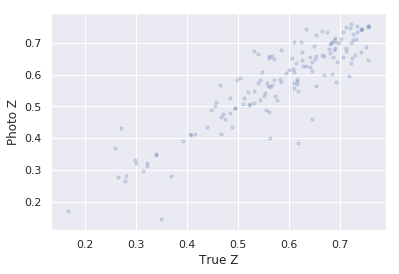

In [209]:
#snr r < 5
for i,y in zip(rang1,np.arange(0,2000,1)):
    if snr_r[i] < 5:
        plt.scatter(z_list1e[i],photoz_list1e[y],alpha=.2,c='b',s=10)
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

In [210]:
#percent error of photo-z test
err_list_5 = []
for i,y in zip(rang1,np.arange(0,2000,1)):
    if snr_rLSST[i] < 5:
        diff = z_list1e[i] - photoz_list1e[y]
        err = diff / z_list1e[i]
        err = abs(err)
        err_list_5.append(err)

NameError: name 'snr_rLSST' is not defined

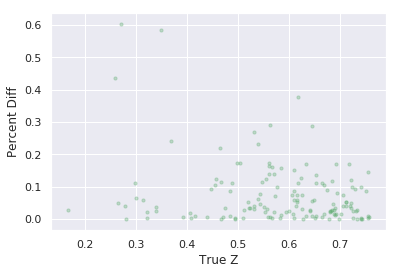

In [213]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if snr_r[i] < 5:
        plt.scatter(z_list1e[i],err_list[y],alpha=.3,c='g',s=10) 
        plt.xlabel('True Z')
        plt.ylabel('Percent Diff')

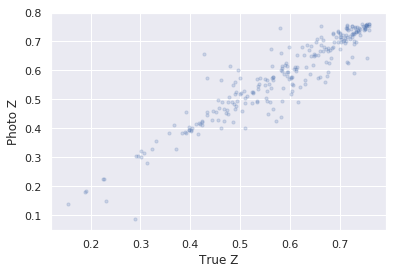

In [214]:
#snr 5 < r < 10
for i,y in zip(rang1,np.arange(0,2000,1)):
    if snr_r[i] > 5 and snr_r[i] < 10:
        plt.scatter(z_list1e[i],photoz_list1e[y],alpha=.2,c='b',s=10)
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

In [215]:
#percent error of photo-z test
err_list_10 = []
for i,y in zip(rang1,np.arange(0,2000,1)):
    if snr_r[i] > 5 and snr_r[i] < 10:
        diff = z_list1e[i] - photoz_list1e[y]
        err = diff / z_list1e[i]
        err = abs(err)
        err_list_10.append(err)

In [216]:
np.mean(err_list_10)

0.05768280586758139

In [217]:
np.std(err_list_10)

0.08003513000120577

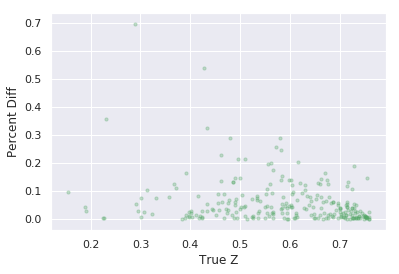

In [218]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if snr_r[i] > 5 and snr_r[i] < 10:
        plt.scatter(z_list1e[i],err_list[y],alpha=.3,c='g',s=10) 
        plt.xlabel('True Z')
        plt.ylabel('Percent Diff')

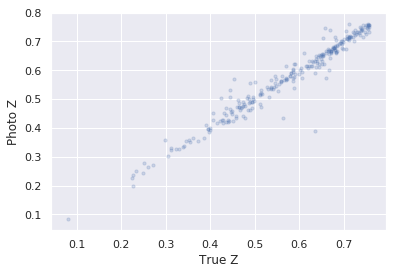

In [219]:
#snr 10 < r < 20
for i,y in zip(rang1,np.arange(0,2000,1)):
    if snr_r[i] > 10 and snr_r[i] < 20:
        plt.scatter(z_list1e[i],photoz_list1e[y],alpha=.2,c='b',s=10)
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

In [220]:
#percent error of photo-z test
err_list_20 = []
for i,y in zip(rang1,np.arange(0,2000,1)):
    if snr_r[i] > 10 and snr_r[i] < 20:
        diff = z_list1e[i] - photoz_list1e[y]
        err = diff / z_list1e[i]
        err = abs(err)
        err_list_20.append(err)

In [221]:
np.mean(err_list_20)

0.029462044837032908

In [222]:
np.std(err_list_20)

0.04475655985911993

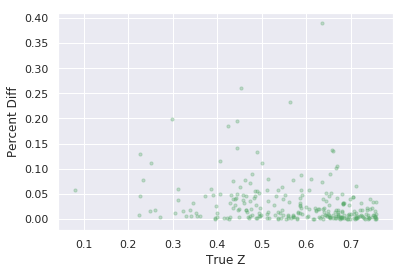

In [223]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if snr_r[i] > 10 and snr_r[i] < 20:
        plt.scatter(z_list1e[i],err_list[y],alpha=.3,c='g',s=10) 
        plt.xlabel('True Z')
        plt.ylabel('Percent Diff')

In [224]:
min(snr_comb)

3.997320489814691

In [225]:
min(snr_r)

3.353517999007686

# Just LSST

In [52]:
LSST_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['u','g','r','i','z','y'], bandpassRoot = 'total_')

Text(0, 0.5, 'Transmission Fraction')

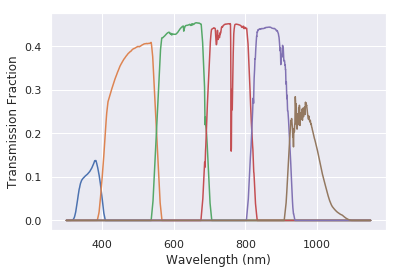

In [54]:
plt.plot(LSST_dict['u'].wavelen,LSST_dict['u'].sb)
plt.plot(LSST_dict['g'].wavelen,LSST_dict['g'].sb)
plt.plot(LSST_dict['r'].wavelen,LSST_dict['r'].sb)
plt.plot(LSST_dict['i'].wavelen,LSST_dict['i'].sb)
plt.plot(LSST_dict['z'].wavelen,LSST_dict['z'].sb)
plt.plot(LSST_dict['y'].wavelen,LSST_dict['y'].sb)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission Fraction')

In [228]:
c2 = calcIG(LSST_dict, sig_example.shift_seds, sig_example.z_probs,
                   sig_example.z_vals,
                   sky_mag=sig_example.sky_mag,
                   ref_filter=sig_example.calib_filter,
                   phot_params=sig_example.phot_params)

In [229]:
color_listLSST = []
color_errorLSST = []
snr_listLSST = []
for SED in tot_SED_list:
    colors_LSST, colorerrors_LSST, snr_LSST, mags_LSST, magerrors_LSST, skymags_LSST = c2.calc_colors([SED],return_all=True)
    color_listLSST.append(colors_LSST)
    color_errorLSST.append(colorerrors_LSST)
    snr_listLSST.append(snr_LSST)
    
    

In [230]:
len(snr_listLSST[1])

1

In [231]:
len(colors_LSST[0])

5

In [232]:
len(color_listLSST)

10000

In [233]:
color_error_rand_stateLSST = np.random.RandomState(2068)

In [234]:
errors_LSST = color_error_rand_stateLSST.normal(scale = color_errorLSST)

In [235]:
len(errors_LSST)

10000

In [236]:
colors_w_noiseLSST = []
for x,y in zip(color_listLSST,errors_LSST):
    colors_w_noiseLSST.append(x+y)

In [237]:
colors_w_noiseLSST[9999]

array([[ 1.75037453,  1.33646366, -0.03380505,  0.01379536,  0.23918479]])

In [238]:
color_listLSSTa = color_listLSST[0:250]
color_listLSSTb = color_listLSST[312:562]
color_listLSSTc = color_listLSST[625:875]
color_listLSSTd = color_listLSST[937:1187]
color_listLSSTe = color_listLSST[1250:1500]
color_listLSSTf = color_listLSST[1562:1812]
color_listLSSTg = color_listLSST[1875:2125]
color_listLSSTh = color_listLSST[2187:2437]
color_listLSSTi = color_listLSST[2500:2750]
color_listLSSTj = color_listLSST[2812:3062]
color_listLSSTk = color_listLSST[3125:3375]
color_listLSSTl = color_listLSST[3437:3687]
color_listLSSTm = color_listLSST[3750:4000]
color_listLSSTn = color_listLSST[4062:4312]
color_listLSSTo = color_listLSST[4375:4625]
color_listLSSTp = color_listLSST[4687:4937]
color_listLSSTq = color_listLSST[5000:5250]
color_listLSSTr = color_listLSST[5312:5562]
color_listLSSTs = color_listLSST[5625:5875]
color_listLSSTt = color_listLSST[5937:6187]
color_listLSSTu = color_listLSST[6250:6500]
color_listLSSTv = color_listLSST[6562:6812]
color_listLSSTw = color_listLSST[6875:7125]
color_listLSSTx = color_listLSST[7187:7437]
color_listLSSTy = color_listLSST[7500:7750]
color_listLSSTz = color_listLSST[7812:8062]
color_listLSSTaa = color_listLSST[8125:8375]
color_listLSSTab = color_listLSST[8437:8687]
color_listLSSTac = color_listLSST[8750:9000]
color_listLSSTad = color_listLSST[9062:9312]
color_listLSSTae = color_listLSST[9375:9625]
color_listLSSTaf = color_listLSST[9687:9937]

color_listLSST = color_listLSSTa + color_listLSSTb + color_listLSSTc + color_listLSSTd + color_listLSSTe + color_listLSSTf + color_listLSSTg + color_listLSSTh + color_listLSSTi + color_listLSSTj + color_listLSSTk + color_listLSSTl + color_listLSSTm + color_listLSSTn + color_listLSSTo + color_listLSSTp + color_listLSSTq + color_listLSSTr + color_listLSSTs + color_listLSSTt + color_listLSSTu + color_listLSSTv + color_listLSSTw + color_listLSSTx + color_listLSSTy + color_listLSSTz + color_listLSSTaa + color_listLSSTab + color_listLSSTac + color_listLSSTad + color_listLSSTae + color_listLSSTaf
len(color_listLSST)

8000

In [239]:
num_colors = len(colors_LSST[0])
photoz_listLSST = []
photoz_error_listLSST = []
Ncm_listLSST = []
for i in rang1:
    photoz,photoz_error,Ncm = return_photoz(np.array(colors_w_noiseLSST[i]), np.array(errors_LSST[i]), np.array(color_listLSST).reshape((8000,num_colors)),
        np.array(z_list1), .68, cmnn_thresh_table, 0, num_colors, 1)
    photoz_listLSST.append(photoz)
    photoz_error_listLSST.append(photoz_error)
    Ncm_listLSST.append(Ncm)

In [240]:
#percent error of photo-z test
err_listLSST = []
for i,y in zip(rang1,np.arange(0,2000,1)):
    diff = z_list1e[i] - photoz_listLSST[y]
    err = diff / z_list1e[i]
    err = abs(err)
    err_listLSST.append(err)

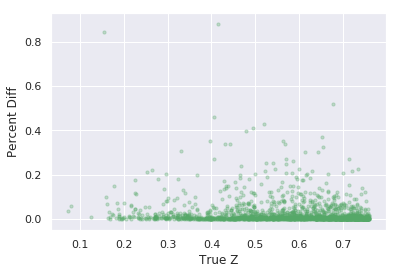

In [241]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    plt.scatter(z_list1e[i],err_listLSST[y],alpha=.3,c='g',s=10) 
    plt.xlabel('True Z')
    plt.ylabel('Percent Diff')

In [242]:
np.mean(err_listLSST)

0.022783115636824208

In [243]:
np.std(err_listLSST)

0.055622707667523606

In [244]:
max(err_listLSST)

0.8808860134856399

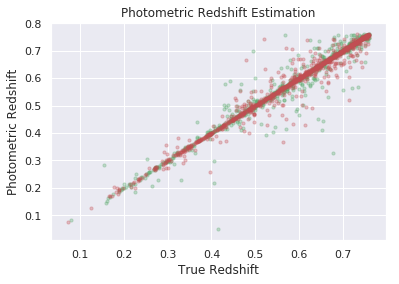

In [525]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if i <= 5000:
        plt.scatter(z_list1e[i],photoz_listLSST[y],alpha=.3,c='g',s=10) #type Ia
        plt.xlabel('True Redshift')
        plt.ylabel('Photometric Redshift')
        plt.title('Photometric Redshift Estimation')
    else:
        plt.scatter(z_list1e[i],photoz_listLSST[y],alpha=.3,c='r',s=10) #type IIp
        plt.xlabel('True Redshift')
        plt.ylabel('Photometric Redshift')
        plt.title('Photometric Redshift Estimation')

In [246]:
photoz_listLSST_array = np.asarray(photoz_listLSST)

In [247]:
n_bins = 10
bin_valsLSST, delta_z_binnedLSST = pm.calc_bins(photoz_listLSST_array, z_list1e_test_array, .76, n_bins, return_bins=True)
bin_centersLSST = np.array(bin_valsLSST[:-1]) + 0.5*(bin_valsLSST[1]-bin_valsLSST[0])

Text(0.5, 1.0, 'Robust Bias')

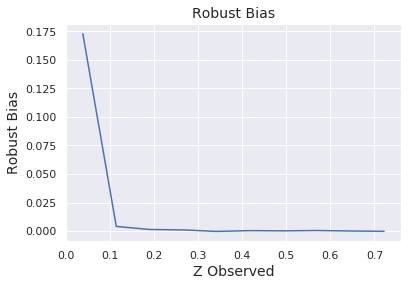

In [248]:
plt.plot(bin_centersLSST, pm.photo_z_robust_bias(photoz_listLSST_array, z_list1e_test_array, .76, n_bins))
plt.xlim(0, .76)
plt.xlabel('Z Observed', size=14)
plt.ylabel('Robust Bias', size=14)
plt.title('Robust Bias', size=14)

Text(0.5, 1.0, 'Robust Standard Deviation')

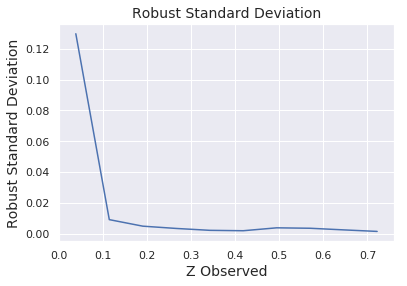

In [249]:
plt.plot(bin_centersLSST, pm.photo_z_robust_stdev(photoz_listLSST_array, z_list1e_test_array, .76, n_bins))
plt.xlim(0, .76)
plt.xlabel('Z Observed', size=14)
plt.ylabel('Robust Standard Deviation', size=14)
plt.title('Robust Standard Deviation', size=14)

Text(0.5, 1.0, 'Outlier Frac')

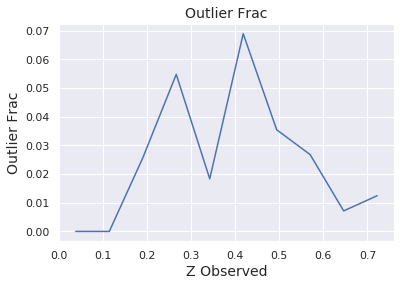

In [250]:
plt.plot(bin_centersLSST, pm.photo_z_outlier_frac(photoz_listLSST_array, z_list1e_test_array, .76, n_bins))
plt.xlim(0, .76)
plt.xlabel('Z Observed', size=14)
plt.ylabel('Outlier Frac', size=14)
plt.title('Outlier Frac', size=14)

In [251]:
len(photoz_listLSST_array)

2000

In [252]:
snr_combLSST = []
for i in np.arange(0,10000,1):
    snr_combLSST.append(snr_listLSST[i][0][0])

In [253]:
snr_rLSST = []
for i in np.arange(0,10000,1):
    snr_rLSST.append(snr_listLSST[i][0][3])

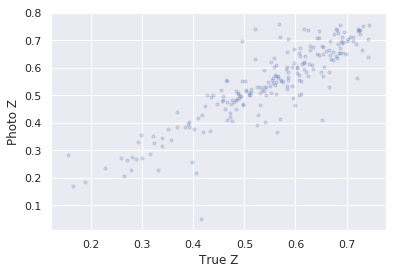

In [254]:
#snr r < 5
for i,y in zip(rang1,np.arange(0,2000,1)):
    if snr_rLSST[i] < 5:
        plt.scatter(z_list1e[i],photoz_listLSST[y],alpha=.2,c='b',s=10)
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

In [255]:
#percent error of photo-z test
err_listLSST_5 = []
for i,y in zip(rang1,np.arange(0,2000,1)):
    if snr_rLSST[i] < 5:
        diff = z_list1e[i] - photoz_listLSST[y]
        err = diff / z_list1e[i]
        err = abs(err)
        err_listLSST_5.append(err)

In [256]:
np.mean(err_listLSST_5)

0.08600049971857637

In [257]:
np.std(err_listLSST_5)

0.11427699604628527

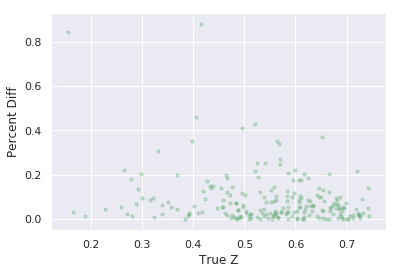

In [258]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if snr_rLSST[i] < 5:
        plt.scatter(z_list1e[i],err_listLSST[y],alpha=.3,c='g',s=10) 
        plt.xlabel('True Z')
        plt.ylabel('Percent Diff')

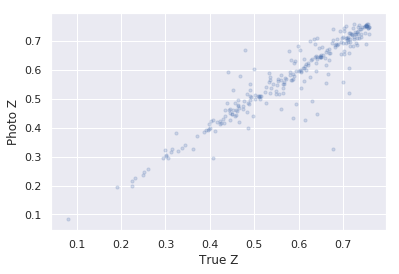

In [259]:
#snr 5 < r < 10
for i,y in zip(rang1,np.arange(0,2000,1)):
    if snr_rLSST[i] > 5 and snr_rLSST[i] < 10:
        plt.scatter(z_list1e[i],photoz_listLSST[y],alpha=.2,c='b',s=10)
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

In [260]:
#percent error of photo-z test
err_listLSST_10 = []
for i,y in zip(rang1,np.arange(0,2000,1)):
    if snr_rLSST[i] > 5 and snr_rLSST[i] < 10:
        diff = z_list1e[i] - photoz_listLSST[y]
        err = diff / z_list1e[i]
        err = abs(err)
        err_listLSST_10.append(err)

In [261]:
np.mean(err_listLSST_10)

0.04675777196876127

In [262]:
np.std(err_listLSST_10)

0.06946945922221419

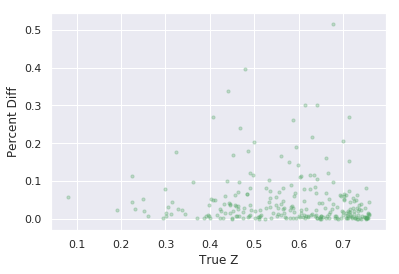

In [263]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if snr_rLSST[i] > 5 and snr_rLSST[i] < 10:
        plt.scatter(z_list1e[i],err_listLSST[y],alpha=.3,c='g',s=10) 
        plt.xlabel('True Z')
        plt.ylabel('Percent Diff')

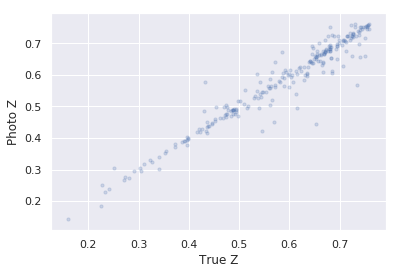

In [264]:
#snr 10 < r < 20
for i,y in zip(rang1,np.arange(0,2000,1)):
    if snr_rLSST[i] > 10 and snr_rLSST[i] < 20:
        plt.scatter(z_list1e[i],photoz_listLSST[y],alpha=.2,c='b',s=10)
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

In [265]:
#percent error of photo-z test
err_listLSST_20 = []
for i,y in zip(rang1,np.arange(0,2000,1)):
    if snr_rLSST[i] > 10 and snr_rLSST[i] < 20:
        diff = z_list1e[i] - photoz_listLSST[y]
        err = diff / z_list1e[i]
        err = abs(err)
        err_listLSST_20.append(err)

In [266]:
np.mean(err_listLSST_20)

0.03275790753062275

In [267]:
np.std(err_listLSST_20)

0.05043135909709129

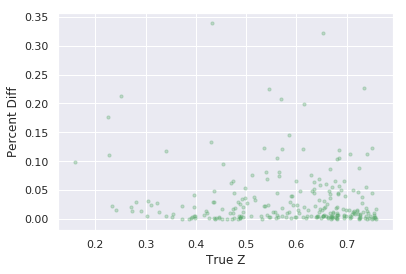

In [268]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if snr_rLSST[i] > 10 and snr_rLSST[i] < 20:
        plt.scatter(z_list1e[i],err_listLSST[y],alpha=.3,c='g',s=10) 
        plt.xlabel('True Z')
        plt.ylabel('Percent Diff')

# GR and Comb

In [269]:
grcomb_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['g','r','comb_filt_mix1'], bandpassRoot = 'total_')

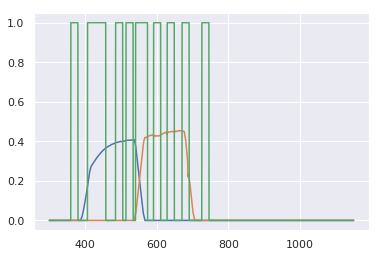

In [270]:
plt.plot(grcomb_dict['g'].wavelen,grcomb_dict['g'].sb)
plt.plot(grcomb_dict['r'].wavelen,grcomb_dict['r'].sb)
plt.plot(grcomb_dict['comb_filt_mix1'].wavelen,grcomb_dict['comb_filt_mix1'].sb)

In [271]:
c3 = calcIG(grcomb_dict, sig_example.shift_seds, sig_example.z_probs,
                   sig_example.z_vals,
                   sky_mag=sig_example.sky_mag,
                   ref_filter=sig_example.calib_filter,
                   phot_params=sig_example.phot_params)

In [272]:
color_listgrcomb = []
color_errorgrcomb = []
snr_listgrcomb = []
for SED in tot_SED_list:
    colors_grcomb, colorerrors_grcomb, snr_grcomb, mags_grcomb, magerrors_grcomb, skymags_grcomb = c3.calc_colors([SED],return_all=True)
    color_listgrcomb.append(colors_grcomb)
    color_errorgrcomb.append(colorerrors_grcomb)
    snr_listgrcomb.append(snr_grcomb)
    
    

In [273]:
len(snr_listgrcomb[1])

1

In [274]:
len(colors_grcomb[0])

2

In [275]:
len(color_listgrcomb)

10000

In [276]:
color_error_rand_stategrcomb = np.random.RandomState(2068)

In [277]:
errors_grcomb = color_error_rand_stategrcomb.normal(scale = color_errorgrcomb)

In [278]:
len(errors_grcomb)

10000

In [279]:
colors_w_noisegrcomb = []
for x,y in zip(color_listgrcomb,errors_grcomb):
    colors_w_noisegrcomb.append(x+y)

In [280]:
colors_w_noisegrcomb[9999]

array([[ 0.99582816, -0.64986854]])

In [281]:
color_listgrcomba = color_listgrcomb[0:250]
color_listgrcombb = color_listgrcomb[312:562]
color_listgrcombc = color_listgrcomb[625:875]
color_listgrcombd = color_listgrcomb[937:1187]
color_listgrcombe = color_listgrcomb[1250:1500]
color_listgrcombf = color_listgrcomb[1562:1812]
color_listgrcombg = color_listgrcomb[1875:2125]
color_listgrcombh = color_listgrcomb[2187:2437]
color_listgrcombi = color_listgrcomb[2500:2750]
color_listgrcombj = color_listgrcomb[2812:3062]
color_listgrcombk = color_listgrcomb[3125:3375]
color_listgrcombl = color_listgrcomb[3437:3687]
color_listgrcombm = color_listgrcomb[3750:4000]
color_listgrcombn = color_listgrcomb[4062:4312]
color_listgrcombo = color_listgrcomb[4375:4625]
color_listgrcombp = color_listgrcomb[4687:4937]
color_listgrcombq = color_listgrcomb[5000:5250]
color_listgrcombr = color_listgrcomb[5312:5562]
color_listgrcombs = color_listgrcomb[5625:5875]
color_listgrcombt = color_listgrcomb[5937:6187]
color_listgrcombu = color_listgrcomb[6250:6500]
color_listgrcombv = color_listgrcomb[6562:6812]
color_listgrcombw = color_listgrcomb[6875:7125]
color_listgrcombx = color_listgrcomb[7187:7437]
color_listgrcomby = color_listgrcomb[7500:7750]
color_listgrcombz = color_listgrcomb[7812:8062]
color_listgrcombaa = color_listgrcomb[8125:8375]
color_listgrcombab = color_listgrcomb[8437:8687]
color_listgrcombac = color_listgrcomb[8750:9000]
color_listgrcombad = color_listgrcomb[9062:9312]
color_listgrcombae = color_listgrcomb[9375:9625]
color_listgrcombaf = color_listgrcomb[9687:9937]

color_listgrcomb = color_listgrcomba + color_listgrcombb + color_listgrcombc + color_listgrcombd + color_listgrcombe + color_listgrcombf + color_listgrcombg + color_listgrcombh + color_listgrcombi + color_listgrcombj + color_listgrcombk + color_listgrcombl + color_listgrcombm + color_listgrcombn + color_listgrcombo + color_listgrcombp + color_listgrcombq + color_listgrcombr + color_listgrcombs + color_listgrcombt + color_listgrcombu + color_listgrcombv + color_listgrcombw + color_listgrcombx + color_listgrcomby + color_listgrcombz + color_listgrcombaa + color_listgrcombab + color_listgrcombac + color_listgrcombad + color_listgrcombae + color_listgrcombaf
len(color_listgrcomb)

8000

In [282]:
num_colors = len(colors_grcomb[0])
photoz_listgrcomb = []
photoz_error_listgrcomb = []
Ncm_listgrcomb = []
for i in rang1:
    photoz,photoz_error,Ncm = return_photoz(np.array(colors_w_noisegrcomb[i]), np.array(errors_grcomb[i]), np.array(color_listgrcomb).reshape((8000,num_colors)),
        np.array(z_list1), .68, cmnn_thresh_table, 0, num_colors, 1)
    photoz_listgrcomb.append(photoz)
    photoz_error_listgrcomb.append(photoz_error)
    Ncm_listgrcomb.append(Ncm)

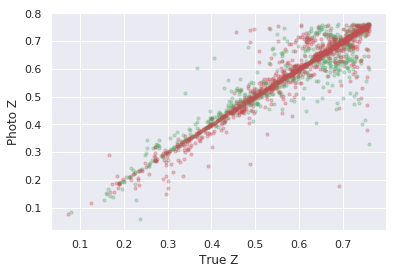

In [298]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if i <= 5000:
        plt.scatter(z_list1e[i],photoz_listgrcomb[y],alpha=.3,c='g',s=10) #type Ia
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')
    else:
        plt.scatter(z_list1e[i],photoz_listgrcomb[y],alpha=.3,c='r',s=10) #type IIp
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

# GR

In [395]:
gr_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['g','r'], bandpassRoot = 'total_')

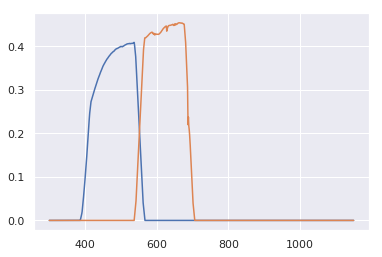

In [396]:
plt.plot(gr_dict['g'].wavelen,gr_dict['g'].sb)
plt.plot(gr_dict['r'].wavelen,gr_dict['r'].sb)

In [397]:
c3 = calcIG(gr_dict, sig_example.shift_seds, sig_example.z_probs,
                   sig_example.z_vals,
                   sky_mag=sig_example.sky_mag,
                   ref_filter=sig_example.calib_filter,
                   phot_params=sig_example.phot_params)

In [398]:
color_listgr = []
color_errorgr = []
snr_listgr = []
for SED in tot_SED_list:
    colors_gr, colorerrors_gr, snr_gr, mags_gr, magerrors_gr, skymags_gr = c3.calc_colors([SED],return_all=True)
    color_listgr.append(colors_gr)
    color_errorgr.append(colorerrors_gr)
    snr_listgr.append(snr_gr)
    
    

In [399]:
len(snr_listgr[1])

1

In [400]:
len(colors_gr[0])

1

In [401]:
len(color_listgr)

10000

In [402]:
color_error_rand_stategr = np.random.RandomState(2068)

In [403]:
errors_gr = color_error_rand_stategr.normal(scale = color_errorgr)

In [404]:
len(errors_gr)

10000

In [405]:
colors_w_noisegr = []
for x,y in zip(color_listgr,errors_gr):
    colors_w_noisegr.append(x+y)

In [406]:
colors_w_noisegr[9999]

array([[1.12249382]])

In [407]:
color_listgra = color_listgr[0:250]
color_listgrb = color_listgr[312:562]
color_listgrc = color_listgr[625:875]
color_listgrd = color_listgr[937:1187]
color_listgre = color_listgr[1250:1500]
color_listgrf = color_listgr[1562:1812]
color_listgrg = color_listgr[1875:2125]
color_listgrh = color_listgr[2187:2437]
color_listgri = color_listgr[2500:2750]
color_listgrj = color_listgr[2812:3062]
color_listgrk = color_listgr[3125:3375]
color_listgrl = color_listgr[3437:3687]
color_listgrm = color_listgr[3750:4000]
color_listgrn = color_listgr[4062:4312]
color_listgro = color_listgr[4375:4625]
color_listgrp = color_listgr[4687:4937]
color_listgrq = color_listgr[5000:5250]
color_listgrr = color_listgr[5312:5562]
color_listgrs = color_listgr[5625:5875]
color_listgrt = color_listgr[5937:6187]
color_listgru = color_listgr[6250:6500]
color_listgrv = color_listgr[6562:6812]
color_listgrw = color_listgr[6875:7125]
color_listgrx = color_listgr[7187:7437]
color_listgry = color_listgr[7500:7750]
color_listgrz = color_listgr[7812:8062]
color_listgraa = color_listgr[8125:8375]
color_listgrab = color_listgr[8437:8687]
color_listgrac = color_listgr[8750:9000]
color_listgrad = color_listgr[9062:9312]
color_listgrae = color_listgr[9375:9625]
color_listgraf = color_listgr[9687:9937]

color_listgr = color_listgra + color_listgrb + color_listgrc + color_listgrd + color_listgre + color_listgrf + color_listgrg + color_listgrh + color_listgri + color_listgrj + color_listgrk + color_listgrl + color_listgrm + color_listgrn + color_listgro + color_listgrp + color_listgrq + color_listgrr + color_listgrs + color_listgrt + color_listgru + color_listgrv + color_listgrw + color_listgrx + color_listgry + color_listgrz + color_listgraa + color_listgrab + color_listgrac + color_listgrad + color_listgrae + color_listgraf
len(color_listgr)

8000

In [408]:
num_colors = len(colors_gr[0])
photoz_listgr = []
photoz_error_listgr = []
Ncm_listgr = []
for i in rang1:
    photoz,photoz_error,Ncm = return_photoz(np.array(colors_w_noisegr[i]), np.array(errors_gr[i]), np.array(color_listgr).reshape((8000,num_colors)),
        np.array(z_list1), .68, cmnn_thresh_table, 0, num_colors, 1)
    photoz_listgr.append(photoz)
    photoz_error_listgr.append(photoz_error)
    Ncm_listgr.append(Ncm)

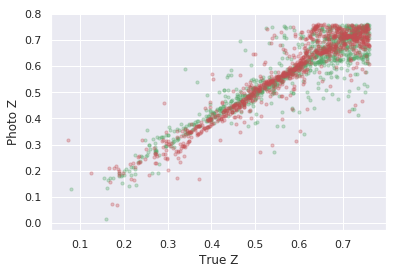

In [409]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if i <= 5000:
        plt.scatter(z_list1e[i],photoz_listgr[y],alpha=.3,c='g',s=10) #type Ia
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')
    else:
        plt.scatter(z_list1e[i],photoz_listgr[y],alpha=.3,c='r',s=10) #type IIp
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

# GZ and Comb

In [283]:
gzcomb_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['g','z','comb_filt_mix1'], bandpassRoot = 'total_')

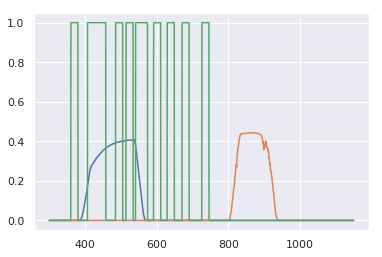

In [284]:
plt.plot(gzcomb_dict['g'].wavelen,gzcomb_dict['g'].sb)
plt.plot(gzcomb_dict['z'].wavelen,gzcomb_dict['z'].sb)
plt.plot(gzcomb_dict['comb_filt_mix1'].wavelen,gzcomb_dict['comb_filt_mix1'].sb)

In [285]:
c4 = calcIG(gzcomb_dict, sig_example.shift_seds, sig_example.z_probs,
                   sig_example.z_vals,
                   sky_mag=sig_example.sky_mag,
                   ref_filter=sig_example.calib_filter,
                   phot_params=sig_example.phot_params)

In [286]:
color_listgzcomb = []
color_errorgzcomb = []
snr_listgzcomb = []
for SED in tot_SED_list:
    colors_gzcomb, colorerrors_gzcomb, snr_gzcomb, mags_gzcomb, magerrors_gzcomb, skymags_gzcomb = c4.calc_colors([SED],return_all=True)
    color_listgzcomb.append(colors_gzcomb)
    color_errorgzcomb.append(colorerrors_gzcomb)
    snr_listgzcomb.append(snr_gzcomb)
    
    

In [287]:
len(snr_listgzcomb[1])

1

In [288]:
len(colors_gzcomb[0])

2

In [289]:
len(color_listgzcomb)

10000

In [290]:
color_error_rand_stategzcomb = np.random.RandomState(2068)

In [291]:
errors_gzcomb = color_error_rand_stategzcomb.normal(scale = color_errorgzcomb)

In [292]:
len(errors_gzcomb)

10000

In [293]:
colors_w_noisegzcomb = []
for x,y in zip(color_listgzcomb,errors_gzcomb):
    colors_w_noisegzcomb.append(x+y)

In [294]:
colors_w_noisegzcomb[9999]

array([[ 1.16768895, -0.95397462]])

In [295]:
color_listgzcomba = color_listgzcomb[0:250]
color_listgzcombb = color_listgzcomb[312:562]
color_listgzcombc = color_listgzcomb[625:875]
color_listgzcombd = color_listgzcomb[937:1187]
color_listgzcombe = color_listgzcomb[1250:1500]
color_listgzcombf = color_listgzcomb[1562:1812]
color_listgzcombg = color_listgzcomb[1875:2125]
color_listgzcombh = color_listgzcomb[2187:2437]
color_listgzcombi = color_listgzcomb[2500:2750]
color_listgzcombj = color_listgzcomb[2812:3062]
color_listgzcombk = color_listgzcomb[3125:3375]
color_listgzcombl = color_listgzcomb[3437:3687]
color_listgzcombm = color_listgzcomb[3750:4000]
color_listgzcombn = color_listgzcomb[4062:4312]
color_listgzcombo = color_listgzcomb[4375:4625]
color_listgzcombp = color_listgzcomb[4687:4937]
color_listgzcombq = color_listgzcomb[5000:5250]
color_listgzcombr = color_listgzcomb[5312:5562]
color_listgzcombs = color_listgzcomb[5625:5875]
color_listgzcombt = color_listgzcomb[5937:6187]
color_listgzcombu = color_listgzcomb[6250:6500]
color_listgzcombv = color_listgzcomb[6562:6812]
color_listgzcombw = color_listgzcomb[6875:7125]
color_listgzcombx = color_listgzcomb[7187:7437]
color_listgzcomby = color_listgzcomb[7500:7750]
color_listgzcombz = color_listgzcomb[7812:8062]
color_listgzcombaa = color_listgzcomb[8125:8375]
color_listgzcombab = color_listgzcomb[8437:8687]
color_listgzcombac = color_listgzcomb[8750:9000]
color_listgzcombad = color_listgzcomb[9062:9312]
color_listgzcombae = color_listgzcomb[9375:9625]
color_listgzcombaf = color_listgzcomb[9687:9937]

color_listgzcomb = color_listgzcomba + color_listgzcombb + color_listgzcombc + color_listgzcombd + color_listgzcombe + color_listgzcombf + color_listgzcombg + color_listgzcombh + color_listgzcombi + color_listgzcombj + color_listgzcombk + color_listgzcombl + color_listgzcombm + color_listgzcombn + color_listgzcombo + color_listgzcombp + color_listgzcombq + color_listgzcombr + color_listgzcombs + color_listgzcombt + color_listgzcombu + color_listgzcombv + color_listgzcombw + color_listgzcombx + color_listgzcomby + color_listgzcombz + color_listgzcombaa + color_listgzcombab + color_listgzcombac + color_listgzcombad + color_listgzcombae + color_listgzcombaf
len(color_listgzcomb)

8000

In [296]:
num_colors = len(colors_gzcomb[0])
photoz_listgzcomb = []
photoz_error_listgzcomb = []
Ncm_listgzcomb = []
for i in rang1:
    photoz,photoz_error,Ncm = return_photoz(np.array(colors_w_noisegzcomb[i]), np.array(errors_gzcomb[i]), np.array(color_listgzcomb).reshape((8000,num_colors)),
        np.array(z_list1), .68, cmnn_thresh_table, 0, num_colors, 1)
    photoz_listgzcomb.append(photoz)
    photoz_error_listgzcomb.append(photoz_error)
    Ncm_listgzcomb.append(Ncm)

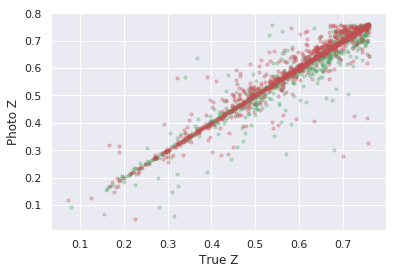

In [297]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if i <= 5000:
        plt.scatter(z_list1e[i],photoz_listgzcomb[y],alpha=.3,c='g',s=10) #type Ia
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')
    else:
        plt.scatter(z_list1e[i],photoz_listgzcomb[y],alpha=.3,c='r',s=10) #type IIp
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

# GZ

In [410]:
gz_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['g','z'], bandpassRoot = 'total_')

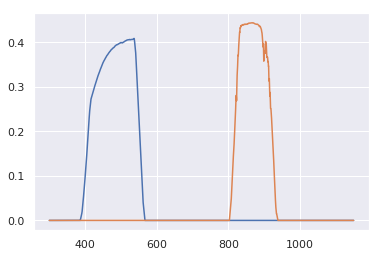

In [411]:
plt.plot(gz_dict['g'].wavelen,gz_dict['g'].sb)
plt.plot(gz_dict['z'].wavelen,gz_dict['z'].sb)

In [412]:
c4 = calcIG(gz_dict, sig_example.shift_seds, sig_example.z_probs,
                   sig_example.z_vals,
                   sky_mag=sig_example.sky_mag,
                   ref_filter=sig_example.calib_filter,
                   phot_params=sig_example.phot_params)

In [413]:
color_listgz = []
color_errorgz = []
snr_listgz = []
for SED in tot_SED_list:
    colors_gz, colorerrors_gz, snr_gz, mags_gz, magerrors_gz, skymags_gz = c4.calc_colors([SED],return_all=True)
    color_listgz.append(colors_gz)
    color_errorgz.append(colorerrors_gz)
    snr_listgz.append(snr_gz)
    
    

In [414]:
len(snr_listgz[1])

1

In [415]:
len(colors_gz[0])

1

In [416]:
len(color_listgz)

10000

In [417]:
color_error_rand_stategz = np.random.RandomState(2068)

In [418]:
errors_gz = color_error_rand_stategz.normal(scale = color_errorgz)

In [419]:
len(errors_gz)

10000

In [420]:
colors_w_noisegz = []
for x,y in zip(color_listgz,errors_gz):
    colors_w_noisegz.append(x+y)

In [421]:
colors_w_noisegz[9999]

array([[1.3287403]])

In [422]:
color_listgza = color_listgz[0:250]
color_listgzb = color_listgz[312:562]
color_listgzc = color_listgz[625:875]
color_listgzd = color_listgz[937:1187]
color_listgze = color_listgz[1250:1500]
color_listgzf = color_listgz[1562:1812]
color_listgzg = color_listgz[1875:2125]
color_listgzh = color_listgz[2187:2437]
color_listgzi = color_listgz[2500:2750]
color_listgzj = color_listgz[2812:3062]
color_listgzk = color_listgz[3125:3375]
color_listgzl = color_listgz[3437:3687]
color_listgzm = color_listgz[3750:4000]
color_listgzn = color_listgz[4062:4312]
color_listgzo = color_listgz[4375:4625]
color_listgzp = color_listgz[4687:4937]
color_listgzq = color_listgz[5000:5250]
color_listgzr = color_listgz[5312:5562]
color_listgzs = color_listgz[5625:5875]
color_listgzt = color_listgz[5937:6187]
color_listgzu = color_listgz[6250:6500]
color_listgzv = color_listgz[6562:6812]
color_listgzw = color_listgz[6875:7125]
color_listgzx = color_listgz[7187:7437]
color_listgzy = color_listgz[7500:7750]
color_listgzz = color_listgz[7812:8062]
color_listgzaa = color_listgz[8125:8375]
color_listgzab = color_listgz[8437:8687]
color_listgzac = color_listgz[8750:9000]
color_listgzad = color_listgz[9062:9312]
color_listgzae = color_listgz[9375:9625]
color_listgzaf = color_listgz[9687:9937]

color_listgz = color_listgza + color_listgzb + color_listgzc + color_listgzd + color_listgze + color_listgzf + color_listgzg + color_listgzh + color_listgzi + color_listgzj + color_listgzk + color_listgzl + color_listgzm + color_listgzn + color_listgzo + color_listgzp + color_listgzq + color_listgzr + color_listgzs + color_listgzt + color_listgzu + color_listgzv + color_listgzw + color_listgzx + color_listgzy + color_listgzz + color_listgzaa + color_listgzab + color_listgzac + color_listgzad + color_listgzae + color_listgzaf
len(color_listgz)

8000

In [423]:
num_colors = len(colors_gz[0])
photoz_listgz = []
photoz_error_listgz = []
Ncm_listgz = []
for i in rang1:
    photoz,photoz_error,Ncm = return_photoz(np.array(colors_w_noisegz[i]), np.array(errors_gz[i]), np.array(color_listgz).reshape((8000,num_colors)),
        np.array(z_list1), .68, cmnn_thresh_table, 0, num_colors, 1)
    photoz_listgz.append(photoz)
    photoz_error_listgz.append(photoz_error)
    Ncm_listgz.append(Ncm)

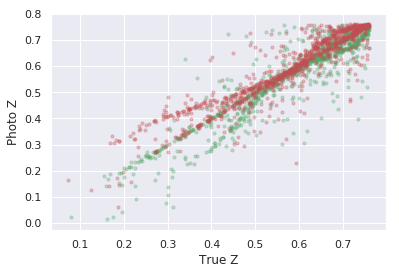

In [424]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if i <= 5000:
        plt.scatter(z_list1e[i],photoz_listgz[y],alpha=.3,c='g',s=10) #type Ia
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')
    else:
        plt.scatter(z_list1e[i],photoz_listgz[y],alpha=.3,c='r',s=10) #type IIp
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

# IY and Comb

In [299]:
iycomb_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['i','y','comb_filt_mix1'], bandpassRoot = 'total_')

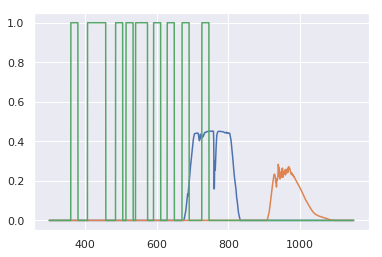

In [300]:
plt.plot(iycomb_dict['i'].wavelen,iycomb_dict['i'].sb)
plt.plot(iycomb_dict['y'].wavelen,iycomb_dict['y'].sb)
plt.plot(iycomb_dict['comb_filt_mix1'].wavelen,iycomb_dict['comb_filt_mix1'].sb)

In [301]:
c5 = calcIG(iycomb_dict, sig_example.shift_seds, sig_example.z_probs,
                   sig_example.z_vals,
                   sky_mag=sig_example.sky_mag,
                   ref_filter=sig_example.calib_filter,
                   phot_params=sig_example.phot_params)

In [302]:
color_listiycomb = []
color_erroriycomb = []
snr_listiycomb = []
for SED in tot_SED_list:
    colors_iycomb, colorerrors_iycomb, snr_iycomb, mags_iycomb, magerrors_iycomb, skymags_iycomb = c5.calc_colors([SED],return_all=True)
    color_listiycomb.append(colors_iycomb)
    color_erroriycomb.append(colorerrors_iycomb)
    snr_listiycomb.append(snr_iycomb)
    
    

In [303]:
len(snr_listiycomb[1])

1

In [304]:
len(colors_iycomb[0])

2

In [305]:
len(color_listiycomb)

10000

In [306]:
color_error_rand_stateiycomb = np.random.RandomState(2068)

In [307]:
errors_iycomb = color_error_rand_stateiycomb.normal(scale = color_erroriycomb)

In [308]:
len(errors_iycomb)

10000

In [309]:
colors_w_noiseiycomb = []
for x,y in zip(color_listiycomb,errors_iycomb):
    colors_w_noiseiycomb.append(x+y)

In [310]:
colors_w_noiseiycomb[9999]

array([[ 0.25319371, -1.58965392]])

In [311]:
color_listiycomba = color_listiycomb[0:250]
color_listiycombb = color_listiycomb[312:562]
color_listiycombc = color_listiycomb[625:875]
color_listiycombd = color_listiycomb[937:1187]
color_listiycombe = color_listiycomb[1250:1500]
color_listiycombf = color_listiycomb[1562:1812]
color_listiycombg = color_listiycomb[1875:2125]
color_listiycombh = color_listiycomb[2187:2437]
color_listiycombi = color_listiycomb[2500:2750]
color_listiycombj = color_listiycomb[2812:3062]
color_listiycombk = color_listiycomb[3125:3375]
color_listiycombl = color_listiycomb[3437:3687]
color_listiycombm = color_listiycomb[3750:4000]
color_listiycombn = color_listiycomb[4062:4312]
color_listiycombo = color_listiycomb[4375:4625]
color_listiycombp = color_listiycomb[4687:4937]
color_listiycombq = color_listiycomb[5000:5250]
color_listiycombr = color_listiycomb[5312:5562]
color_listiycombs = color_listiycomb[5625:5875]
color_listiycombt = color_listiycomb[5937:6187]
color_listiycombu = color_listiycomb[6250:6500]
color_listiycombv = color_listiycomb[6562:6812]
color_listiycombw = color_listiycomb[6875:7125]
color_listiycombx = color_listiycomb[7187:7437]
color_listiycomby = color_listiycomb[7500:7750]
color_listiycombz = color_listiycomb[7812:8062]
color_listiycombaa = color_listiycomb[8125:8375]
color_listiycombab = color_listiycomb[8437:8687]
color_listiycombac = color_listiycomb[8750:9000]
color_listiycombad = color_listiycomb[9062:9312]
color_listiycombae = color_listiycomb[9375:9625]
color_listiycombaf = color_listiycomb[9687:9937]

color_listiycomb = color_listiycomba + color_listiycombb + color_listiycombc + color_listiycombd + color_listiycombe + color_listiycombf + color_listiycombg + color_listiycombh + color_listiycombi + color_listiycombj + color_listiycombk + color_listiycombl + color_listiycombm + color_listiycombn + color_listiycombo + color_listiycombp + color_listiycombq + color_listiycombr + color_listiycombs + color_listiycombt + color_listiycombu + color_listiycombv + color_listiycombw + color_listiycombx + color_listiycomby + color_listiycombz + color_listiycombaa + color_listiycombab + color_listiycombac + color_listiycombad + color_listiycombae + color_listiycombaf
len(color_listiycomb)

8000

In [312]:
num_colors = len(colors_iycomb[0])
photoz_listiycomb = []
photoz_error_listiycomb = []
Ncm_listiycomb = []
for i in rang1:
    photoz,photoz_error,Ncm = return_photoz(np.array(colors_w_noiseiycomb[i]), np.array(errors_iycomb[i]), np.array(color_listiycomb).reshape((8000,num_colors)),
        np.array(z_list1), .68, cmnn_thresh_table, 0, num_colors, 1)
    photoz_listiycomb.append(photoz)
    photoz_error_listiycomb.append(photoz_error)
    Ncm_listiycomb.append(Ncm)

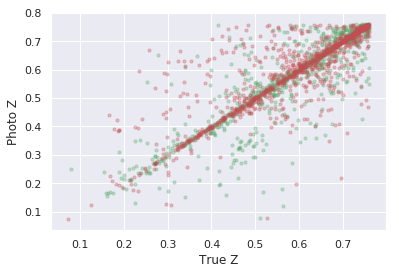

In [313]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if i <= 5000:
        plt.scatter(z_list1e[i],photoz_listiycomb[y],alpha=.3,c='g',s=10) #type Ia
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')
    else:
        plt.scatter(z_list1e[i],photoz_listiycomb[y],alpha=.3,c='r',s=10) #type IIp
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

# RY and Comb

In [333]:
rycomb_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['r','y','comb_filt_mix1'], bandpassRoot = 'total_')

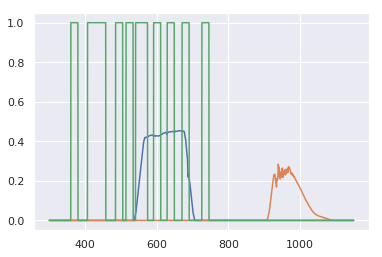

In [334]:
plt.plot(rycomb_dict['r'].wavelen,rycomb_dict['r'].sb)
plt.plot(rycomb_dict['y'].wavelen,rycomb_dict['y'].sb)
plt.plot(rycomb_dict['comb_filt_mix1'].wavelen,rycomb_dict['comb_filt_mix1'].sb)

In [335]:
c5 = calcIG(rycomb_dict, sig_example.shift_seds, sig_example.z_probs,
                   sig_example.z_vals,
                   sky_mag=sig_example.sky_mag,
                   ref_filter=sig_example.calib_filter,
                   phot_params=sig_example.phot_params)

In [336]:
color_listrycomb = []
color_errorrycomb = []
snr_listrycomb = []
for SED in tot_SED_list:
    colors_rycomb, colorerrors_rycomb, snr_rycomb, mags_rycomb, magerrors_rycomb, skymags_rycomb = c5.calc_colors([SED],return_all=True)
    color_listrycomb.append(colors_rycomb)
    color_errorrycomb.append(colorerrors_rycomb)
    snr_listrycomb.append(snr_rycomb)
    
    

In [337]:
len(snr_listrycomb[1])

1

In [338]:
len(colors_rycomb[0])

2

In [339]:
len(color_listrycomb)

10000

In [340]:
color_error_rand_staterycomb = np.random.RandomState(2068)

In [341]:
errors_rycomb = color_error_rand_staterycomb.normal(scale = color_errorrycomb)

In [342]:
len(errors_rycomb)

10000

In [343]:
colors_w_noiserycomb = []
for x,y in zip(color_listrycomb,errors_rycomb):
    colors_w_noiserycomb.append(x+y)

In [344]:
colors_w_noiserycomb[9999]

array([[ 0.32820934, -1.58965392]])

In [345]:
color_listrycomba = color_listrycomb[0:250]
color_listrycombb = color_listrycomb[312:562]
color_listrycombc = color_listrycomb[625:875]
color_listrycombd = color_listrycomb[937:1187]
color_listrycombe = color_listrycomb[1250:1500]
color_listrycombf = color_listrycomb[1562:1812]
color_listrycombg = color_listrycomb[1875:2125]
color_listrycombh = color_listrycomb[2187:2437]
color_listrycombi = color_listrycomb[2500:2750]
color_listrycombj = color_listrycomb[2812:3062]
color_listrycombk = color_listrycomb[3125:3375]
color_listrycombl = color_listrycomb[3437:3687]
color_listrycombm = color_listrycomb[3750:4000]
color_listrycombn = color_listrycomb[4062:4312]
color_listrycombo = color_listrycomb[4375:4625]
color_listrycombp = color_listrycomb[4687:4937]
color_listrycombq = color_listrycomb[5000:5250]
color_listrycombr = color_listrycomb[5312:5562]
color_listrycombs = color_listrycomb[5625:5875]
color_listrycombt = color_listrycomb[5937:6187]
color_listrycombu = color_listrycomb[6250:6500]
color_listrycombv = color_listrycomb[6562:6812]
color_listrycombw = color_listrycomb[6875:7125]
color_listrycombx = color_listrycomb[7187:7437]
color_listrycomby = color_listrycomb[7500:7750]
color_listrycombz = color_listrycomb[7812:8062]
color_listrycombaa = color_listrycomb[8125:8375]
color_listrycombab = color_listrycomb[8437:8687]
color_listrycombac = color_listrycomb[8750:9000]
color_listrycombad = color_listrycomb[9062:9312]
color_listrycombae = color_listrycomb[9375:9625]
color_listrycombaf = color_listrycomb[9687:9937]

color_listrycomb = color_listrycomba + color_listrycombb + color_listrycombc + color_listrycombd + color_listrycombe + color_listrycombf + color_listrycombg + color_listrycombh + color_listrycombi + color_listrycombj + color_listrycombk + color_listrycombl + color_listrycombm + color_listrycombn + color_listrycombo + color_listrycombp + color_listrycombq + color_listrycombr + color_listrycombs + color_listrycombt + color_listrycombu + color_listrycombv + color_listrycombw + color_listrycombx + color_listrycomby + color_listrycombz + color_listrycombaa + color_listrycombab + color_listrycombac + color_listrycombad + color_listrycombae + color_listrycombaf
len(color_listrycomb)

8000

In [346]:
num_colors = len(colors_rycomb[0])
photoz_listrycomb = []
photoz_error_listrycomb = []
Ncm_listrycomb = []
for i in rang1:
    photoz,photoz_error,Ncm = return_photoz(np.array(colors_w_noiserycomb[i]), np.array(errors_rycomb[i]), np.array(color_listrycomb).reshape((8000,num_colors)),
        np.array(z_list1), .68, cmnn_thresh_table, 0, num_colors, 1)
    photoz_listrycomb.append(photoz)
    photoz_error_listrycomb.append(photoz_error)
    Ncm_listrycomb.append(Ncm)

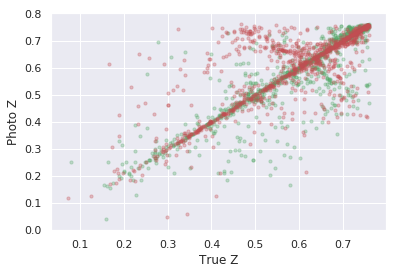

In [347]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if i <= 5000:
        plt.scatter(z_list1e[i],photoz_listrycomb[y],alpha=.3,c='g',s=10) #type Ia
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')
    else:
        plt.scatter(z_list1e[i],photoz_listrycomb[y],alpha=.3,c='r',s=10) #type IIp
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

# RY

In [425]:
ry_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['r','y'], bandpassRoot = 'total_')

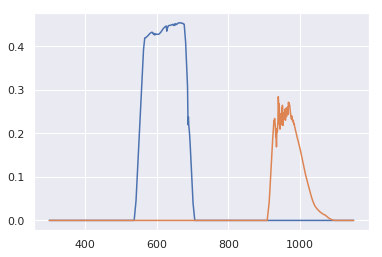

In [426]:
plt.plot(ry_dict['r'].wavelen,ry_dict['r'].sb)
plt.plot(ry_dict['y'].wavelen,ry_dict['y'].sb)

In [427]:
c5 = calcIG(ry_dict, sig_example.shift_seds, sig_example.z_probs,
                   sig_example.z_vals,
                   sky_mag=sig_example.sky_mag,
                   ref_filter=sig_example.calib_filter,
                   phot_params=sig_example.phot_params)

In [428]:
color_listry = []
color_errorry = []
snr_listry = []
for SED in tot_SED_list:
    colors_ry, colorerrors_ry, snr_ry, mags_ry, magerrors_ry, skymags_ry = c5.calc_colors([SED],return_all=True)
    color_listry.append(colors_ry)
    color_errorry.append(colorerrors_ry)
    snr_listry.append(snr_ry)
    
    

In [429]:
len(snr_listry[1])

1

In [430]:
len(colors_ry[0])

1

In [431]:
len(color_listry)

10000

In [432]:
color_error_rand_statery = np.random.RandomState(2068)

In [433]:
errors_ry = color_error_rand_statery.normal(scale = color_errorry)

In [434]:
len(errors_ry)

10000

In [435]:
colors_w_noisery = []
for x,y in zip(color_listry,errors_ry):
    colors_w_noisery.append(x+y)

In [436]:
colors_w_noisery[9999]

array([[0.57130158]])

In [437]:
color_listrya = color_listry[0:250]
color_listryb = color_listry[312:562]
color_listryc = color_listry[625:875]
color_listryd = color_listry[937:1187]
color_listrye = color_listry[1250:1500]
color_listryf = color_listry[1562:1812]
color_listryg = color_listry[1875:2125]
color_listryh = color_listry[2187:2437]
color_listryi = color_listry[2500:2750]
color_listryj = color_listry[2812:3062]
color_listryk = color_listry[3125:3375]
color_listryl = color_listry[3437:3687]
color_listrym = color_listry[3750:4000]
color_listryn = color_listry[4062:4312]
color_listryo = color_listry[4375:4625]
color_listryp = color_listry[4687:4937]
color_listryq = color_listry[5000:5250]
color_listryr = color_listry[5312:5562]
color_listrys = color_listry[5625:5875]
color_listryt = color_listry[5937:6187]
color_listryu = color_listry[6250:6500]
color_listryv = color_listry[6562:6812]
color_listryw = color_listry[6875:7125]
color_listryx = color_listry[7187:7437]
color_listryy = color_listry[7500:7750]
color_listryz = color_listry[7812:8062]
color_listryaa = color_listry[8125:8375]
color_listryab = color_listry[8437:8687]
color_listryac = color_listry[8750:9000]
color_listryad = color_listry[9062:9312]
color_listryae = color_listry[9375:9625]
color_listryaf = color_listry[9687:9937]

color_listry = color_listrya + color_listryb + color_listryc + color_listryd + color_listrye + color_listryf + color_listryg + color_listryh + color_listryi + color_listryj + color_listryk + color_listryl + color_listrym + color_listryn + color_listryo + color_listryp + color_listryq + color_listryr + color_listrys + color_listryt + color_listryu + color_listryv + color_listryw + color_listryx + color_listryy + color_listryz + color_listryaa + color_listryab + color_listryac + color_listryad + color_listryae + color_listryaf
len(color_listry)

8000

In [438]:
num_colors = len(colors_ry[0])
photoz_listry = []
photoz_error_listry = []
Ncm_listry = []
for i in rang1:
    photoz,photoz_error,Ncm = return_photoz(np.array(colors_w_noisery[i]), np.array(errors_ry[i]), np.array(color_listry).reshape((8000,num_colors)),
        np.array(z_list1), .68, cmnn_thresh_table, 0, num_colors, 1)
    photoz_listry.append(photoz)
    photoz_error_listry.append(photoz_error)
    Ncm_listry.append(Ncm)

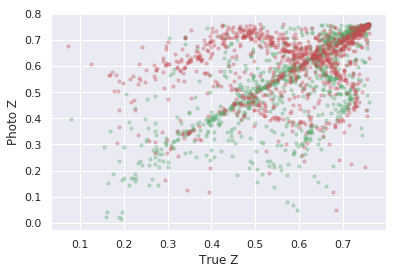

In [439]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if i <= 5000:
        plt.scatter(z_list1e[i],photoz_listry[y],alpha=.3,c='g',s=10) #type Ia
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')
    else:
        plt.scatter(z_list1e[i],photoz_listry[y],alpha=.3,c='r',s=10) #type IIp
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

# GIY and Comb

In [365]:
giycomb_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['g','i','y','comb_filt_mix1'], bandpassRoot = 'total_')

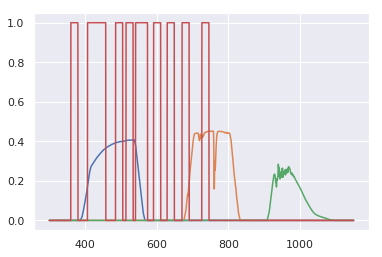

In [366]:
plt.plot(giycomb_dict['g'].wavelen,giycomb_dict['g'].sb)
plt.plot(giycomb_dict['i'].wavelen,giycomb_dict['i'].sb)
plt.plot(giycomb_dict['y'].wavelen,giycomb_dict['y'].sb)
plt.plot(giycomb_dict['comb_filt_mix1'].wavelen,giycomb_dict['comb_filt_mix1'].sb)

In [367]:
c5 = calcIG(giycomb_dict, sig_example.shift_seds, sig_example.z_probs,
                   sig_example.z_vals,
                   sky_mag=sig_example.sky_mag,
                   ref_filter=sig_example.calib_filter,
                   phot_params=sig_example.phot_params)

In [368]:
color_listgiycomb = []
color_errorgiycomb = []
snr_listgiycomb = []
for SED in tot_SED_list:
    colors_giycomb, colorerrors_giycomb, snr_giycomb, mags_giycomb, magerrors_giycomb, skymags_giycomb = c5.calc_colors([SED],return_all=True)
    color_listgiycomb.append(colors_giycomb)
    color_errorgiycomb.append(colorerrors_giycomb)
    snr_listgiycomb.append(snr_giycomb)
    
    

In [369]:
len(snr_listgiycomb[1])

1

In [370]:
len(colors_giycomb[0])

3

In [371]:
len(color_listgiycomb)

10000

In [372]:
color_error_rand_stategiycomb = np.random.RandomState(2068)

In [373]:
errors_giycomb = color_error_rand_stategiycomb.normal(scale = color_errorgiycomb)

In [374]:
len(errors_giycomb)

10000

In [375]:
colors_w_noisegiycomb = []
for x,y in zip(color_listgiycomb,errors_giycomb):
    colors_w_noisegiycomb.append(x+y)

In [376]:
colors_w_noisegiycomb[9999]

array([[ 1.32723804,  0.25154116, -1.31539755]])

In [377]:
color_listgiycomba = color_listgiycomb[0:250]
color_listgiycombb = color_listgiycomb[312:562]
color_listgiycombc = color_listgiycomb[625:875]
color_listgiycombd = color_listgiycomb[937:1187]
color_listgiycombe = color_listgiycomb[1250:1500]
color_listgiycombf = color_listgiycomb[1562:1812]
color_listgiycombg = color_listgiycomb[1875:2125]
color_listgiycombh = color_listgiycomb[2187:2437]
color_listgiycombi = color_listgiycomb[2500:2750]
color_listgiycombj = color_listgiycomb[2812:3062]
color_listgiycombk = color_listgiycomb[3125:3375]
color_listgiycombl = color_listgiycomb[3437:3687]
color_listgiycombm = color_listgiycomb[3750:4000]
color_listgiycombn = color_listgiycomb[4062:4312]
color_listgiycombo = color_listgiycomb[4375:4625]
color_listgiycombp = color_listgiycomb[4687:4937]
color_listgiycombq = color_listgiycomb[5000:5250]
color_listgiycombr = color_listgiycomb[5312:5562]
color_listgiycombs = color_listgiycomb[5625:5875]
color_listgiycombt = color_listgiycomb[5937:6187]
color_listgiycombu = color_listgiycomb[6250:6500]
color_listgiycombv = color_listgiycomb[6562:6812]
color_listgiycombw = color_listgiycomb[6875:7125]
color_listgiycombx = color_listgiycomb[7187:7437]
color_listgiycomby = color_listgiycomb[7500:7750]
color_listgiycombz = color_listgiycomb[7812:8062]
color_listgiycombaa = color_listgiycomb[8125:8375]
color_listgiycombab = color_listgiycomb[8437:8687]
color_listgiycombac = color_listgiycomb[8750:9000]
color_listgiycombad = color_listgiycomb[9062:9312]
color_listgiycombae = color_listgiycomb[9375:9625]
color_listgiycombaf = color_listgiycomb[9687:9937]

color_listgiycomb = color_listgiycomba + color_listgiycombb + color_listgiycombc + color_listgiycombd + color_listgiycombe + color_listgiycombf + color_listgiycombg + color_listgiycombh + color_listgiycombi + color_listgiycombj + color_listgiycombk + color_listgiycombl + color_listgiycombm + color_listgiycombn + color_listgiycombo + color_listgiycombp + color_listgiycombq + color_listgiycombr + color_listgiycombs + color_listgiycombt + color_listgiycombu + color_listgiycombv + color_listgiycombw + color_listgiycombx + color_listgiycomby + color_listgiycombz + color_listgiycombaa + color_listgiycombab + color_listgiycombac + color_listgiycombad + color_listgiycombae + color_listgiycombaf
len(color_listgiycomb)

8000

In [378]:
num_colors = len(colors_giycomb[0])
photoz_listgiycomb = []
photoz_error_listgiycomb = []
Ncm_listgiycomb = []
for i in rang1:
    photoz,photoz_error,Ncm = return_photoz(np.array(colors_w_noisegiycomb[i]), np.array(errors_giycomb[i]), np.array(color_listgiycomb).reshape((8000,num_colors)),
        np.array(z_list1), .68, cmnn_thresh_table, 0, num_colors, 1)
    photoz_listgiycomb.append(photoz)
    photoz_error_listgiycomb.append(photoz_error)
    Ncm_listgiycomb.append(Ncm)

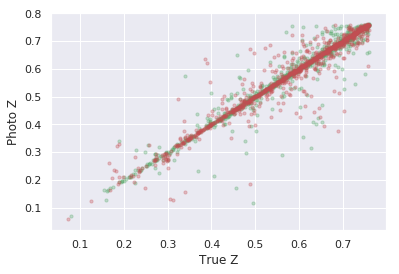

In [379]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if i <= 5000:
        plt.scatter(z_list1e[i],photoz_listgiycomb[y],alpha=.3,c='g',s=10) #type Ia
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')
    else:
        plt.scatter(z_list1e[i],photoz_listgiycomb[y],alpha=.3,c='r',s=10) #type IIp
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

# GIY

In [440]:
giy_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['g','i','y'], bandpassRoot = 'total_')

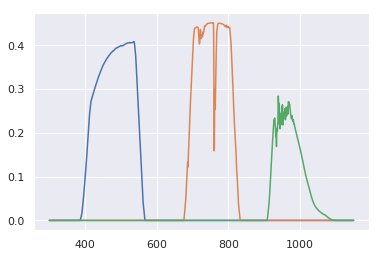

In [441]:
plt.plot(giy_dict['g'].wavelen,giy_dict['g'].sb)
plt.plot(giy_dict['i'].wavelen,giy_dict['i'].sb)
plt.plot(giy_dict['y'].wavelen,giy_dict['y'].sb)

In [442]:
c5 = calcIG(giy_dict, sig_example.shift_seds, sig_example.z_probs,
                   sig_example.z_vals,
                   sky_mag=sig_example.sky_mag,
                   ref_filter=sig_example.calib_filter,
                   phot_params=sig_example.phot_params)

In [443]:
color_listgiy = []
color_errorgiy = []
snr_listgiy = []
for SED in tot_SED_list:
    colors_giy, colorerrors_giy, snr_giy, mags_giy, magerrors_giy, skymags_giy = c5.calc_colors([SED],return_all=True)
    color_listgiy.append(colors_giy)
    color_errorgiy.append(colorerrors_giy)
    snr_listgiy.append(snr_giy)
    
    

In [444]:
len(snr_listgiy[1])

1

In [445]:
len(colors_giy[0])

2

In [446]:
len(color_listgiy)

10000

In [447]:
color_error_rand_stategiy = np.random.RandomState(2068)

In [448]:
errors_giy = color_error_rand_stategiy.normal(scale = color_errorgiy)

In [449]:
len(errors_giy)

10000

In [450]:
colors_w_noisegiy = []
for x,y in zip(color_listgiy,errors_giy):
    colors_w_noisegiy.append(x+y)

In [451]:
colors_w_noisegiy[9999]

array([[1.04685645, 0.18719628]])

In [452]:
color_listgiya = color_listgiy[0:250]
color_listgiyb = color_listgiy[312:562]
color_listgiyc = color_listgiy[625:875]
color_listgiyd = color_listgiy[937:1187]
color_listgiye = color_listgiy[1250:1500]
color_listgiyf = color_listgiy[1562:1812]
color_listgiyg = color_listgiy[1875:2125]
color_listgiyh = color_listgiy[2187:2437]
color_listgiyi = color_listgiy[2500:2750]
color_listgiyj = color_listgiy[2812:3062]
color_listgiyk = color_listgiy[3125:3375]
color_listgiyl = color_listgiy[3437:3687]
color_listgiym = color_listgiy[3750:4000]
color_listgiyn = color_listgiy[4062:4312]
color_listgiyo = color_listgiy[4375:4625]
color_listgiyp = color_listgiy[4687:4937]
color_listgiyq = color_listgiy[5000:5250]
color_listgiyr = color_listgiy[5312:5562]
color_listgiys = color_listgiy[5625:5875]
color_listgiyt = color_listgiy[5937:6187]
color_listgiyu = color_listgiy[6250:6500]
color_listgiyv = color_listgiy[6562:6812]
color_listgiyw = color_listgiy[6875:7125]
color_listgiyx = color_listgiy[7187:7437]
color_listgiyy = color_listgiy[7500:7750]
color_listgiyz = color_listgiy[7812:8062]
color_listgiyaa = color_listgiy[8125:8375]
color_listgiyab = color_listgiy[8437:8687]
color_listgiyac = color_listgiy[8750:9000]
color_listgiyad = color_listgiy[9062:9312]
color_listgiyae = color_listgiy[9375:9625]
color_listgiyaf = color_listgiy[9687:9937]

color_listgiy = color_listgiya + color_listgiyb + color_listgiyc + color_listgiyd + color_listgiye + color_listgiyf + color_listgiyg + color_listgiyh + color_listgiyi + color_listgiyj + color_listgiyk + color_listgiyl + color_listgiym + color_listgiyn + color_listgiyo + color_listgiyp + color_listgiyq + color_listgiyr + color_listgiys + color_listgiyt + color_listgiyu + color_listgiyv + color_listgiyw + color_listgiyx + color_listgiyy + color_listgiyz + color_listgiyaa + color_listgiyab + color_listgiyac + color_listgiyad + color_listgiyae + color_listgiyaf
len(color_listgiy)

8000

In [453]:
num_colors = len(colors_giy[0])
photoz_listgiy = []
photoz_error_listgiy = []
Ncm_listgiy = []
for i in rang1:
    photoz,photoz_error,Ncm = return_photoz(np.array(colors_w_noisegiy[i]), np.array(errors_giy[i]), np.array(color_listgiy).reshape((8000,num_colors)),
        np.array(z_list1), .68, cmnn_thresh_table, 0, num_colors, 1)
    photoz_listgiy.append(photoz)
    photoz_error_listgiy.append(photoz_error)
    Ncm_listgiy.append(Ncm)

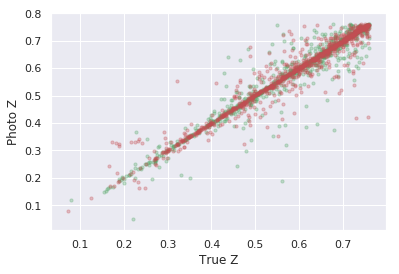

In [454]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if i <= 5000:
        plt.scatter(z_list1e[i],photoz_listgiy[y],alpha=.3,c='g',s=10) #type Ia
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')
    else:
        plt.scatter(z_list1e[i],photoz_listgiy[y],alpha=.3,c='r',s=10) #type IIp
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

# GRI and Comb

In [380]:
gricomb_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['g','r','i','comb_filt_mix1'], bandpassRoot = 'total_')

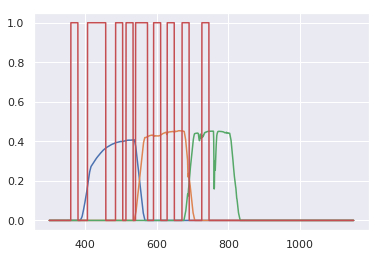

In [381]:
plt.plot(gricomb_dict['g'].wavelen,gricomb_dict['g'].sb)
plt.plot(gricomb_dict['r'].wavelen,gricomb_dict['r'].sb)
plt.plot(gricomb_dict['i'].wavelen,gricomb_dict['i'].sb)
plt.plot(gricomb_dict['comb_filt_mix1'].wavelen,gricomb_dict['comb_filt_mix1'].sb)

In [382]:
c5 = calcIG(gricomb_dict, sig_example.shift_seds, sig_example.z_probs,
                   sig_example.z_vals,
                   sky_mag=sig_example.sky_mag,
                   ref_filter=sig_example.calib_filter,
                   phot_params=sig_example.phot_params)

In [383]:
color_listgricomb = []
color_errorgricomb = []
snr_listgricomb = []
for SED in tot_SED_list:
    colors_gricomb, colorerrors_gricomb, snr_gricomb, mags_gricomb, magerrors_gricomb, skymags_gricomb = c5.calc_colors([SED],return_all=True)
    color_listgricomb.append(colors_gricomb)
    color_errorgricomb.append(colorerrors_gricomb)
    snr_listgricomb.append(snr_gricomb)
    
    

In [384]:
len(snr_listgricomb[1])

1

In [385]:
len(colors_gricomb[0])

3

In [386]:
len(color_listgricomb)

10000

In [387]:
color_error_rand_stategricomb = np.random.RandomState(2068)

In [388]:
errors_gricomb = color_error_rand_stategricomb.normal(scale = color_errorgricomb)

In [389]:
len(errors_gricomb)

10000

In [390]:
colors_w_noisegricomb = []
for x,y in zip(color_listgricomb,errors_gricomb):
    colors_w_noisegricomb.append(x+y)

In [391]:
colors_w_noisegricomb[9999]

array([[ 1.25300668, -0.06488997, -0.64785214]])

In [392]:
color_listgricomba = color_listgricomb[0:250]
color_listgricombb = color_listgricomb[312:562]
color_listgricombc = color_listgricomb[625:875]
color_listgricombd = color_listgricomb[937:1187]
color_listgricombe = color_listgricomb[1250:1500]
color_listgricombf = color_listgricomb[1562:1812]
color_listgricombg = color_listgricomb[1875:2125]
color_listgricombh = color_listgricomb[2187:2437]
color_listgricombi = color_listgricomb[2500:2750]
color_listgricombj = color_listgricomb[2812:3062]
color_listgricombk = color_listgricomb[3125:3375]
color_listgricombl = color_listgricomb[3437:3687]
color_listgricombm = color_listgricomb[3750:4000]
color_listgricombn = color_listgricomb[4062:4312]
color_listgricombo = color_listgricomb[4375:4625]
color_listgricombp = color_listgricomb[4687:4937]
color_listgricombq = color_listgricomb[5000:5250]
color_listgricombr = color_listgricomb[5312:5562]
color_listgricombs = color_listgricomb[5625:5875]
color_listgricombt = color_listgricomb[5937:6187]
color_listgricombu = color_listgricomb[6250:6500]
color_listgricombv = color_listgricomb[6562:6812]
color_listgricombw = color_listgricomb[6875:7125]
color_listgricombx = color_listgricomb[7187:7437]
color_listgricomby = color_listgricomb[7500:7750]
color_listgricombz = color_listgricomb[7812:8062]
color_listgricombaa = color_listgricomb[8125:8375]
color_listgricombab = color_listgricomb[8437:8687]
color_listgricombac = color_listgricomb[8750:9000]
color_listgricombad = color_listgricomb[9062:9312]
color_listgricombae = color_listgricomb[9375:9625]
color_listgricombaf = color_listgricomb[9687:9937]

color_listgricomb = color_listgricomba + color_listgricombb + color_listgricombc + color_listgricombd + color_listgricombe + color_listgricombf + color_listgricombg + color_listgricombh + color_listgricombi + color_listgricombj + color_listgricombk + color_listgricombl + color_listgricombm + color_listgricombn + color_listgricombo + color_listgricombp + color_listgricombq + color_listgricombr + color_listgricombs + color_listgricombt + color_listgricombu + color_listgricombv + color_listgricombw + color_listgricombx + color_listgricomby + color_listgricombz + color_listgricombaa + color_listgricombab + color_listgricombac + color_listgricombad + color_listgricombae + color_listgricombaf
len(color_listgricomb)

8000

In [393]:
num_colors = len(colors_gricomb[0])
photoz_listgricomb = []
photoz_error_listgricomb = []
Ncm_listgricomb = []
for i in rang1:
    photoz,photoz_error,Ncm = return_photoz(np.array(colors_w_noisegricomb[i]), np.array(errors_gricomb[i]), np.array(color_listgricomb).reshape((8000,num_colors)),
        np.array(z_list1), .68, cmnn_thresh_table, 0, num_colors, 1)
    photoz_listgricomb.append(photoz)
    photoz_error_listgricomb.append(photoz_error)
    Ncm_listgricomb.append(Ncm)

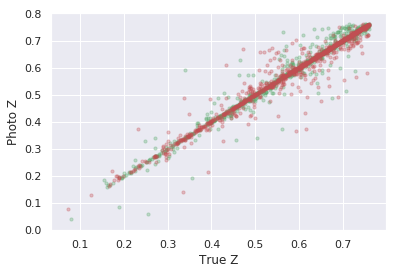

In [394]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if i <= 5000:
        plt.scatter(z_list1e[i],photoz_listgricomb[y],alpha=.3,c='g',s=10) #type Ia
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')
    else:
        plt.scatter(z_list1e[i],photoz_listgricomb[y],alpha=.3,c='r',s=10) #type IIp
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

# GRI

In [1]:
gri_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['g','r','i'], bandpassRoot = 'total_')

NameError: name 'BandpassDict' is not defined

In [ ]:
plt.plot(gri_dict['g'].wavelen,gri_dict['g'].sb)
plt.plot(gri_dict['r'].wavelen,gri_dict['r'].sb)
plt.plot(gri_dict['i'].wavelen,gri_dict['i'].sb)

In [ ]:
c5 = calcIG(gri_dict, sig_example.shift_seds, sig_example.z_probs,
                   sig_example.z_vals,
                   sky_mag=sig_example.sky_mag,
                   ref_filter=sig_example.calib_filter,
                   phot_params=sig_example.phot_params)

In [ ]:
color_listgri = []
color_errorgri = []
snr_listgri = []
for SED in tot_SED_list:
    colors_gri, colorerrors_gri, snr_gri, mags_gri, magerrors_gri, skymags_gri = c5.calc_colors([SED],return_all=True)
    color_listgri.append(colors_gri)
    color_errorgri.append(colorerrors_gri)
    snr_listgri.append(snr_gri)
    
    

In [ ]:
len(snr_listgri[1])

In [ ]:
len(colors_gri[0])

In [ ]:
len(color_listgri)

In [ ]:
color_error_rand_stategri = np.random.RandomState(2068)

In [ ]:
errors_gri = color_error_rand_stategri.normal(scale = color_errorgri)

In [ ]:
len(errors_gri)

In [ ]:
colors_w_noisegri = []
for x,y in zip(color_listgri,errors_gri):
    colors_w_noisegri.append(x+y)

In [ ]:
colors_w_noisegri[9999]

In [ ]:
color_listgria = color_listgri[0:250]
color_listgrib = color_listgri[312:562]
color_listgric = color_listgri[625:875]
color_listgrid = color_listgri[937:1187]
color_listgrie = color_listgri[1250:1500]
color_listgrif = color_listgri[1562:1812]
color_listgrig = color_listgri[1875:2125]
color_listgrih = color_listgri[2187:2437]
color_listgrii = color_listgri[2500:2750]
color_listgrij = color_listgri[2812:3062]
color_listgrik = color_listgri[3125:3375]
color_listgril = color_listgri[3437:3687]
color_listgrim = color_listgri[3750:4000]
color_listgrin = color_listgri[4062:4312]
color_listgrio = color_listgri[4375:4625]
color_listgrip = color_listgri[4687:4937]
color_listgriq = color_listgri[5000:5250]
color_listgrir = color_listgri[5312:5562]
color_listgris = color_listgri[5625:5875]
color_listgrit = color_listgri[5937:6187]
color_listgriu = color_listgri[6250:6500]
color_listgriv = color_listgri[6562:6812]
color_listgriw = color_listgri[6875:7125]
color_listgrix = color_listgri[7187:7437]
color_listgriy = color_listgri[7500:7750]
color_listgriz = color_listgri[7812:8062]
color_listgriaa = color_listgri[8125:8375]
color_listgriab = color_listgri[8437:8687]
color_listgriac = color_listgri[8750:9000]
color_listgriad = color_listgri[9062:9312]
color_listgriae = color_listgri[9375:9625]
color_listgriaf = color_listgri[9687:9937]

color_listgri = color_listgria + color_listgrib + color_listgric + color_listgrid + color_listgrie + color_listgrif + color_listgrig + color_listgrih + color_listgrii + color_listgrij + color_listgrik + color_listgril + color_listgrim + color_listgrin + color_listgrio + color_listgrip + color_listgriq + color_listgrir + color_listgris + color_listgrit + color_listgriu + color_listgriv + color_listgriw + color_listgrix + color_listgriy + color_listgriz + color_listgriaa + color_listgriab + color_listgriac + color_listgriad + color_listgriae + color_listgriaf
len(color_listgri)

In [ ]:
num_colors = len(colors_gri[0])
photoz_listgri = []
photoz_error_listgri = []
Ncm_listgri = []
for i in rang1:
    photoz,photoz_error,Ncm = return_photoz(np.array(colors_w_noisegri[i]), np.array(errors_gri[i]), np.array(color_listgri).reshape((8000,num_colors)),
        np.array(z_list1), .68, cmnn_thresh_table, 0, num_colors, 1)
    photoz_listgri.append(photoz)
    photoz_error_listgri.append(photoz_error)
    Ncm_listgri.append(Ncm)

In [ ]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if i <= 5000:
        plt.scatter(z_list1e[i],photoz_listgri[y],alpha=.3,c='g',s=10) #type Ia
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')
    else:
        plt.scatter(z_list1e[i],photoz_listgri[y],alpha=.3,c='r',s=10) #type IIp
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

# Test Analysis

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">Test</th>
    <th class="tg-0pky">All LSST &amp; Comb</th>
    <th class="tg-0pky">All LSST</th>
    <th class="tg-0pky">GR &amp; Comb</th>
    <th class="tg-0pky">GR</th>
    <th class="tg-0pky">GZ &amp; Comb</th>
    <th class="tg-0pky">GZ</th>
    <th class="tg-0pky">RY &amp; Comb</th>
    <th class="tg-0pky">RY</th>
    <th class="tg-0pky">GIY &amp; Comb</th>
    <th class="tg-0pky">GIY</th>
    <th class="tg-0pky">GRI &amp; Comb</th>
    <th class="tg-0pky">GRI</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">Robust Bias (e-5) </td>
    <td class="tg-0pky">1.0704</td>
    <td class="tg-0pky">3.5759</td>
    <td class="tg-0pky">30.707</td>
    <td class="tg-0pky">104.03</td>
    <td class="tg-0pky">-0.0254</td>
    <td class="tg-0pky">-14.125</td>
    <td class="tg-0pky">-5.2717</td>
    <td class="tg-0pky">175.10</td>
    <td class="tg-0pky">8.5531</td>
    <td class="tg-0pky">2.7731</td>
    <td class="tg-0pky">-1.7093</td>
    <td class="tg-0pky">-5.5728</td>
  </tr>
  <tr>
    <td class="tg-0pky">Robust Standard Deviation <br>(e-3)</td>
    <td class="tg-0pky">2.1869</td>
    <td class="tg-0pky">2.2113</td>
    <td class="tg-0pky">5.9178</td>
    <td class="tg-0pky">18.139</td>
    <td class="tg-0pky">4.8487</td>
    <td class="tg-0pky">18.173</td>
    <td class="tg-0pky">11.957</td>
    <td class="tg-0pky">44.375</td>
    <td class="tg-0pky">3.0702</td>
    <td class="tg-0pky">4.5488</td>
    <td class="tg-0pky">2.0815</td>
    <td class="tg-0pky">3.0196</td>
  </tr>
  <tr>
    <td class="tg-0pky">Outlier Fraction (e-2)</td>
    <td class="tg-0pky">1.80</td>
    <td class="tg-0pky">2.45</td>
    <td class="tg-0pky">6.20</td>
    <td class="tg-0pky">9.15</td>
    <td class="tg-0pky">4.00</td>
    <td class="tg-0pky">11.6</td>
    <td class="tg-0pky">17.9</td>
    <td class="tg-0pky">20.5</td>
    <td class="tg-0pky">3.75</td>
    <td class="tg-0pky">4.55</td>
    <td class="tg-0pky">2.40</td>
    <td class="tg-0pky">3.95</td>
  </tr>
</tbody>
</table>

In [472]:
photoz_listgrcomb_array = np.asarray(photoz_listgrcomb)
photoz_listgr_array = np.asarray(photoz_listgr)
len(photoz_listgr_array)

2000

In [473]:
photoz_listgzcomb_array = np.asarray(photoz_listgzcomb)
photoz_listgz_array = np.asarray(photoz_listgz)
len(photoz_listgz_array)

2000

In [474]:
photoz_listrycomb_array = np.asarray(photoz_listrycomb)
photoz_listry_array = np.asarray(photoz_listry)
len(photoz_listry_array)

2000

In [475]:
photoz_listgiycomb_array = np.asarray(photoz_listgiycomb)
photoz_listgiy_array = np.asarray(photoz_listgiy)
len(photoz_listgiy_array)

2000

In [476]:
photoz_listgricomb_array = np.asarray(photoz_listgricomb)
photoz_listgri_array = np.asarray(photoz_listgri)
len(photoz_listgri_array)

2000

In [479]:
print(pm.photo_z_robust_bias(photoz_list1e_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_bias(photoz_listLSST_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_bias(photoz_listgrcomb_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_bias(photoz_listgr_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_bias(photoz_listgzcomb_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_bias(photoz_listgz_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_bias(photoz_listrycomb_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_bias(photoz_listry_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_bias(photoz_listgiycomb_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_bias(photoz_listgiy_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_bias(photoz_listgricomb_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_bias(photoz_listgri_array, z_list1e_test_array, .76, 1))

[1.07040923e-05]
[3.5748618e-05]
[0.00030707]
[0.00104026]
[-2.53651175e-07]
[-0.00014125]
[-5.27172428e-05]
[0.00175095]
[8.55305915e-05]
[2.77306166e-05]
[-1.70931811e-05]
[-5.57280587e-05]


In [480]:
print(pm.photo_z_robust_stdev(photoz_list1e_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_stdev(photoz_listLSST_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_stdev(photoz_listgrcomb_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_stdev(photoz_listgr_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_stdev(photoz_listgzcomb_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_stdev(photoz_listgz_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_stdev(photoz_listrycomb_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_stdev(photoz_listry_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_stdev(photoz_listgiycomb_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_stdev(photoz_listgiy_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_stdev(photoz_listgricomb_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_robust_stdev(photoz_listgri_array, z_list1e_test_array, .76, 1))

[0.00218691]
[0.00221132]
[0.00591784]
[0.01813851]
[0.00484865]
[0.01817297]
[0.01195741]
[0.04437494]
[0.00307016]
[0.00454876]
[0.00208146]
[0.00301961]


In [481]:
print(pm.photo_z_outlier_frac(photoz_list1e_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_outlier_frac(photoz_listLSST_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_outlier_frac(photoz_listgrcomb_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_outlier_frac(photoz_listgr_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_outlier_frac(photoz_listgzcomb_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_outlier_frac(photoz_listgz_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_outlier_frac(photoz_listrycomb_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_outlier_frac(photoz_listry_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_outlier_frac(photoz_listgiycomb_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_outlier_frac(photoz_listgiy_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_outlier_frac(photoz_listgricomb_array, z_list1e_test_array, .76, 1))
print(pm.photo_z_outlier_frac(photoz_listgri_array, z_list1e_test_array, .76, 1))

[0.018]
[0.0245]
[0.062]
[0.0915]
[0.04]
[0.116]
[0.1785]
[0.2045]
[0.0375]
[0.0455]
[0.024]
[0.0395]


In [327]:
print(pm.photo_z_robust_bias(photoz_listLSST_array, z_list1e_test_array, .76, 1))

[3.5748618e-05]


In [328]:
print(pm.photo_z_robust_stdev(photoz_list1e_array, z_list1e_test_array, .76, 1))

[0.00218691]


In [329]:
print(pm.photo_z_robust_stdev(photoz_listLSST_array, z_list1e_test_array, .76, 1))

[0.00221132]


In [331]:
print(pm.photo_z_outlier_frac(photoz_list1e_array, z_list1e_test_array, .76, 1))

[0.018]


In [332]:
print(pm.photo_z_outlier_frac(photoz_listLSST_array, z_list1e_test_array, .76, 1))

[0.0245]
